In [588]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as math
from matplotlib.ticker import FuncFormatter

%matplotlib inline

In [447]:
covid_data = pd.read_csv('us-counties-covid19-20200504.csv')

In [448]:
covid_data.head()

date     county       state     fips  cases  deaths
0  2020-01-21  Snohomish  Washington  53061.0      1       0
1  2020-01-22  Snohomish  Washington  53061.0      1       0
2  2020-01-23  Snohomish  Washington  53061.0      1       0
3  2020-01-24       Cook    Illinois  17031.0      1       0
4  2020-01-24  Snohomish  Washington  53061.0      1       0

In [449]:
len(covid_data[covid_data['date'] == '2020-05-04'])

2885

In [450]:
covid_data.rename(columns={'fips':'FIPS'},inplace=True)

In [451]:
# replace NaNs in 'FIPS' column with 100 (arbitrary, dummy value) so left join will work properly, ...
# otherwise these rows (mostly 'Unknown' counties will be duplicated 3x after join)
covid_data['FIPS'].fillna(100,inplace=True)

In [452]:
covid_data.head()

date     county       state     FIPS  cases  deaths
0  2020-01-21  Snohomish  Washington  53061.0      1       0
1  2020-01-22  Snohomish  Washington  53061.0      1       0
2  2020-01-23  Snohomish  Washington  53061.0      1       0
3  2020-01-24       Cook    Illinois  17031.0      1       0
4  2020-01-24  Snohomish  Washington  53061.0      1       0

In [453]:
USA_pop_county = pd.read_csv('USA_state_county_population_data_2010-2019.csv',encoding = "ISO-8859-1")

In [454]:
HH_income = pd.read_csv('MedianHHIncome_2018.csv')

In [455]:
HH_income.head()

FIPS State           Area_name  MedianHHInc_2018
0  1001.0    AL  Autauga County, AL           59338.0
1  1003.0    AL  Baldwin County, AL           57588.0
2  1005.0    AL  Barbour County, AL           34382.0
3  1007.0    AL     Bibb County, AL           46064.0
4  1009.0    AL   Blount County, AL           50412.0

In [456]:
covid_data.shape

(115457, 6)

In [457]:
covid_IL_latest = covid_data[covid_data.date == covid_data.date.max()][covid_data.state == 'Illinois']

C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [458]:
covid_data = pd.merge(covid_data, HH_income, on='FIPS', how='left')

In [459]:
covid_data.shape

(115457, 9)

In [460]:
covid_data.head()

date     county       state     FIPS  cases  deaths State  \
0  2020-01-21  Snohomish  Washington  53061.0      1       0    WA   
1  2020-01-22  Snohomish  Washington  53061.0      1       0    WA   
2  2020-01-23  Snohomish  Washington  53061.0      1       0    WA   
3  2020-01-24       Cook    Illinois  17031.0      1       0    IL   
4  2020-01-24  Snohomish  Washington  53061.0      1       0    WA   

              Area_name  MedianHHInc_2018  
0  Snohomish County, WA           87096.0  
1  Snohomish County, WA           87096.0  
2  Snohomish County, WA           87096.0  
3       Cook County, IL           63347.0  
4  Snohomish County, WA           87096.0

In [461]:
covid_data.drop(columns = ['State', 'Area_name'],inplace=True)

In [462]:
covid_data.head()

date     county       state     FIPS  cases  deaths  MedianHHInc_2018
0  2020-01-21  Snohomish  Washington  53061.0      1       0           87096.0
1  2020-01-22  Snohomish  Washington  53061.0      1       0           87096.0
2  2020-01-23  Snohomish  Washington  53061.0      1       0           87096.0
3  2020-01-24       Cook    Illinois  17031.0      1       0           63347.0
4  2020-01-24  Snohomish  Washington  53061.0      1       0           87096.0

In [463]:
USA_pop_county = USA_pop_county[['STNAME', 'CTYNAME', 'POPESTIMATE2019']]
USA_pop_county.columns = ['State', 'County', '2019EstPop']
USA_pop_county['State_County'] = USA_pop_county['State'] + "_" + USA_pop_county['County']

In [464]:
covid_data['county'] = covid_data['county'] + ' County'
covid_data['State_County'] = covid_data['state'] + "_" + covid_data['county']

In [465]:
covid_data.sort_values(by=['state', 'county'], inplace = True)

In [466]:
covid_data.head()

date          county    state    FIPS  cases  deaths  \
9481   2020-03-24  Autauga County  Alabama  1001.0      1       0   
10839  2020-03-25  Autauga County  Alabama  1001.0      4       0   
12377  2020-03-26  Autauga County  Alabama  1001.0      6       0   
14046  2020-03-27  Autauga County  Alabama  1001.0      6       0   
15836  2020-03-28  Autauga County  Alabama  1001.0      6       0   

       MedianHHInc_2018            State_County  
9481            59338.0  Alabama_Autauga County  
10839           59338.0  Alabama_Autauga County  
12377           59338.0  Alabama_Autauga County  
14046           59338.0  Alabama_Autauga County  
15836           59338.0  Alabama_Autauga County

In [467]:
len(covid_data[covid_data.state == 'District of Columbia'])

59

In [468]:
covid_data.reset_index(drop=True, inplace = True)

In [469]:
# manually change 'Allen County' in Louisiana to 'Allen Parish' BECAUSE there are also 'Allen County' in other states
covid_data.iloc[list(covid_data[covid_data['county'] == 'Allen County'][covid_data['state'] == 'Louisiana'].index),1] = 'Allen Parish'

C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [470]:
# manually change 'Orleans County' in Louisiana to 'Orleans Parish' BECAUSE there are also 'Orleans County' in other states; similar for other counties
covid_data.iloc[list(covid_data[covid_data['county'] == 'Orleans County'][covid_data['state'] == 'Louisiana'].index),1] = 'Orleans Parish'
covid_data.iloc[list(covid_data[covid_data['county'] == 'Jefferson County'][covid_data['state'] == 'Louisiana'].index),1] = 'Jefferson Parish'
covid_data.iloc[list(covid_data[covid_data['county'] == 'Lafayette County'][covid_data['state'] == 'Louisiana'].index),1] = 'Lafayette Parish'
covid_data.iloc[list(covid_data[covid_data['county'] == 'Caddo County'][covid_data['state'] == 'Louisiana'].index),1] = 'Caddo Parish'
covid_data.iloc[list(covid_data[covid_data['county'] == 'St. Charles County'][covid_data['state'] == 'Louisiana'].index),1] = 'St. Charles Parish'
covid_data.iloc[list(covid_data[covid_data['county'] == 'Ouachita County'][covid_data['state'] == 'Louisiana'].index),1] = 'Ouachita Parish'
covid_data.iloc[list(covid_data[covid_data['county'] == 'District of Columbia County'][covid_data['state'] == 'District of Columbia'].index),1] = 'District of Columbia'
covid_data.iloc[list(covid_data[covid_data['county'] == 'New York City County'].index),1] = 'New York City'

C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  

In [471]:
# note the left join when merging COVID-19 dataset with US population dataset
covid_data = pd.merge(covid_data, USA_pop_county, on='State_County', how='left')

In [472]:
list3 = ['Kings County', 'Queens County', 'Bronx County', 'Richmond County', 'New York County']

In [473]:
covid_data[covid_data.county.isin(list3)][covid_data.state == 'New York']

C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Empty DataFrame
Columns: [date, county, state, FIPS, cases, deaths, MedianHHInc_2018, State_County, State, County, 2019EstPop]
Index: []

In [474]:
# list4 = ['New York_' + i for i in list3]

In [475]:
covid_data.shape

(115457, 11)

In [476]:
# exclude rows where 'State_County' is in list4 (see above)
covid_data = covid_data[~covid_data.State_County.isin(list4)]      

NameError: name 'list4' is not defined

In [477]:
covid_data.shape

(115457, 11)

In [478]:
covid_data.drop(columns = ['State', 'County'], inplace = True)

#### List of County Names to be Re-Named (to be properly joined with USA population file)

In [479]:
county_list1 = ['Acadia County', 
                'Alexandria city County', 
                'Anchorage County', 
                'Ascension County', 
                'Assumption County',
                'Avoyelles County', 
                'Fairbanks North Star Borough County', 
                'Juneau City and Borough County',
                'St. Tammany County', 
                'East Baton Rouge County', 
                'Baltimore city County', 
                'St. Louis city County',
                'St. John the Baptist County',
                'District of Columbia County',
                'Kansas City County',
                'St. Bernard County',
                'Lafourche County',
                'Virginia Beach city County',
                'St. James County',
                'Bossier County']
county_list2 = ['Acadia Parish',
                'Alexandria city',
                'Anchorage Municipality',
                'Ascension Parish',
                'Assumption Parish',
                'Avoyelles Parish',
                'Fairbanks North Star Borough',
                'Juneau City and Borough',
                'St. Tammany Parish',
                'East Baton Rouge Parish',
                'Baltimore city',
                'St. Louis city',
                'St. John the Baptist Parish',
                'District of Columbia',
                'Kansas City',
                'St. Bernard Parish',
                'Lafourche Parish',
                'Virginia Beach city', 
                'St. James Parish',
                'Bossier Parish']

In [480]:
covid_data.replace(to_replace = county_list1, value = county_list2, inplace = True)

In [481]:
covid_data.drop(columns = 'State_County', inplace = True)

In [482]:
covid_data['State_County'] = covid_data['state'] + "_" + covid_data['county']

In [483]:
len(covid_data[covid_data.state == 'District of Columbia'])

59

In [484]:
covid_data = pd.merge(covid_data, USA_pop_county, on='State_County', how='left')

In [485]:
covid_data.drop(columns = ['State', 'County', '2019EstPop_x'], inplace = True)

In [486]:
covid_data.rename(columns={'2019EstPop_y':'2019EstPop'}, inplace = True)

In [487]:
covid_data.head()

date          county    state    FIPS  cases  deaths  \
0  2020-03-24  Autauga County  Alabama  1001.0      1       0   
1  2020-03-25  Autauga County  Alabama  1001.0      4       0   
2  2020-03-26  Autauga County  Alabama  1001.0      6       0   
3  2020-03-27  Autauga County  Alabama  1001.0      6       0   
4  2020-03-28  Autauga County  Alabama  1001.0      6       0   

   MedianHHInc_2018            State_County  2019EstPop  
0           59338.0  Alabama_Autauga County     55869.0  
1           59338.0  Alabama_Autauga County     55869.0  
2           59338.0  Alabama_Autauga County     55869.0  
3           59338.0  Alabama_Autauga County     55869.0  
4           59338.0  Alabama_Autauga County     55869.0

In [488]:
# verify that this has not changed (ie no duplicates) after merging covid_data and USA_pop_county
len(covid_data[covid_data.state == 'District of Columbia'])

59

In [489]:
null_HHInc = covid_data[covid_data['MedianHHInc_2018'].isnull()]
null_HHInc = null_HHInc[null_HHInc.county != 'Unknown County']
null_HHInc.head()

date       county     state   FIPS  cases  deaths  \
59120  2020-03-20  Kansas City  Missouri  100.0     12       0   
59121  2020-03-21  Kansas City  Missouri  100.0     13       0   
59122  2020-03-22  Kansas City  Missouri  100.0     13       0   
59123  2020-03-23  Kansas City  Missouri  100.0     18       0   
59124  2020-03-24  Kansas City  Missouri  100.0     30       0   

       MedianHHInc_2018          State_County  2019EstPop  
59120               NaN  Missouri_Kansas City    491918.0  
59121               NaN  Missouri_Kansas City    491918.0  
59122               NaN  Missouri_Kansas City    491918.0  
59123               NaN  Missouri_Kansas City    491918.0  
59124               NaN  Missouri_Kansas City    491918.0

### <span style="color:red"> Next steps: manually add median HH income for two 'State_County" combinations below

In [490]:
set(null_HHInc.State_County)

{'Missouri_Kansas City', 'New York_New York City'}

In [491]:
covid_data['date'] = pd.to_datetime(covid_data['date'])

In [492]:
covid_data.dtypes

date                datetime64[ns]
county                      object
state                       object
FIPS                       float64
cases                        int64
deaths                       int64
MedianHHInc_2018           float64
State_County                object
2019EstPop                 float64
dtype: object

In [493]:
covid_data_US = covid_data.groupby('date')['cases', 'deaths'].sum()
covid_data_US = covid_data_US[covid_data_US.index > '2020-03-02']

In [494]:
covid_data_latest_states = covid_data[covid_data.date == covid_data.date.max()].groupby('state')['cases', 'deaths'].sum()
covid_data_latest_states.sort_values(by='deaths', ascending=False).head(10)

cases  deaths
state                        
New York       318984   19415
New Jersey     128269    7910
Michigan        43928    4135
Massachusetts   69087    4090
Pennsylvania    52992    2880
Illinois        63840    2673
Connecticut     29973    2556
California      56333    2297
Louisiana       29673    1991
Florida         36889    1398

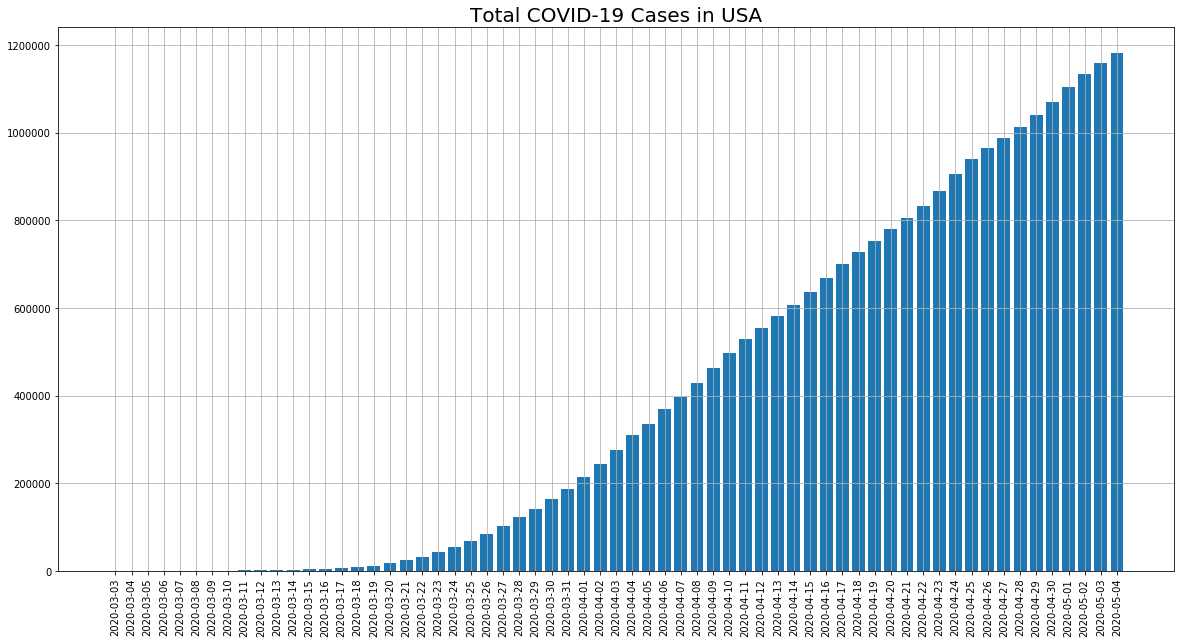

In [495]:
plt.figure(figsize=[20,10])
plt.grid()
plt.title('Total COVID-19 Cases in USA', fontsize = '20')
plt.bar(covid_data_US.index, covid_data_US.cases)

plt.xticks(covid_data_US.index, fontsize = '10', rotation = 90);

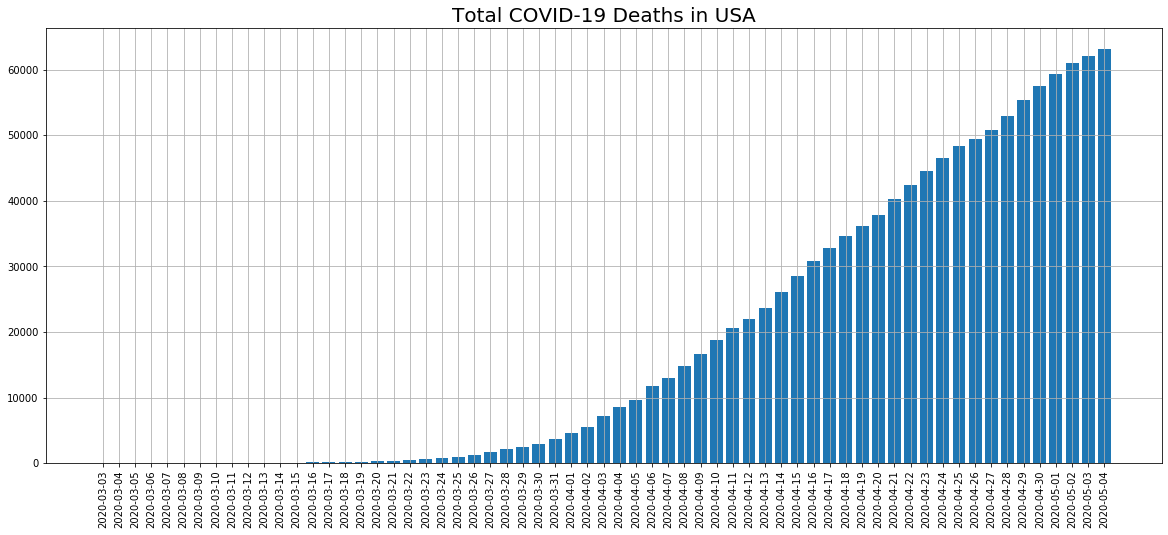

In [496]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total COVID-19 Deaths in USA', fontsize = '20')
plt.bar(covid_data_US.index, covid_data_US.deaths)

plt.xticks(covid_data_US.index, fontsize = '10', rotation = 90);

In [497]:
covid_data_US_daily = covid_data_US.diff()
covid_data_US_daily.columns = ['cases_newdaily', 'deaths_newdaily']

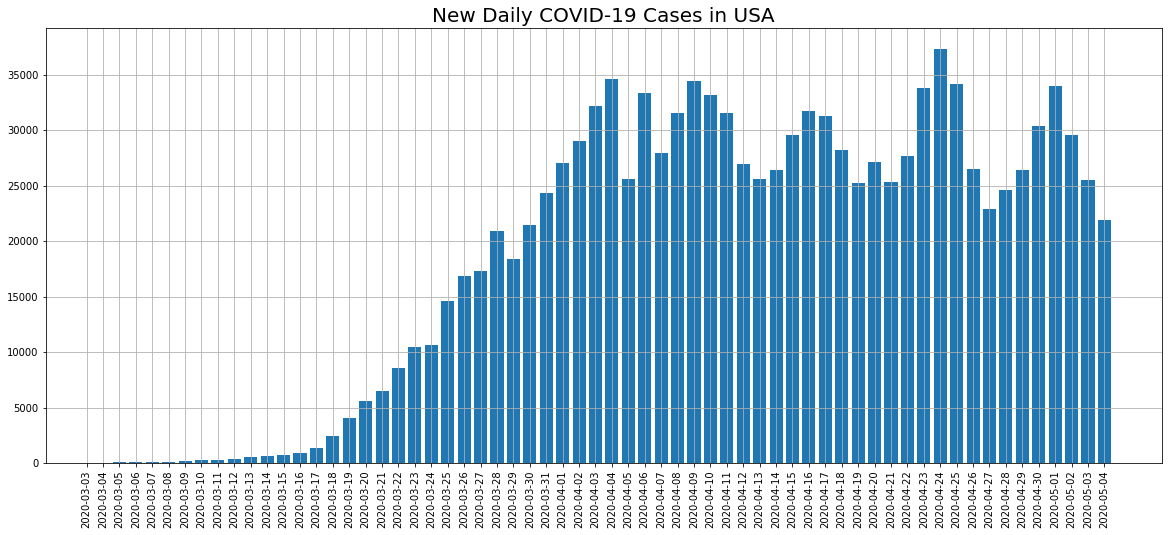

In [498]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('New Daily COVID-19 Cases in USA', fontsize = '20')
plt.bar(covid_data_US_daily.index, covid_data_US_daily.cases_newdaily)

plt.xticks(covid_data_US_daily.index, fontsize = '10', rotation = 90);

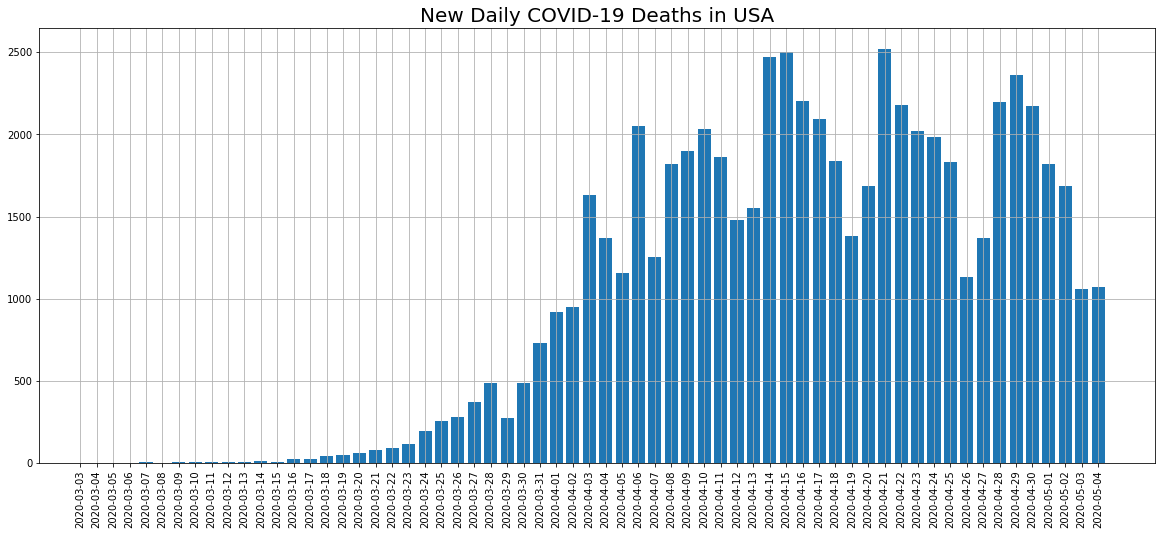

In [499]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('New Daily COVID-19 Deaths in USA', fontsize = '20')
plt.bar(covid_data_US_daily.index, covid_data_US_daily.deaths_newdaily)

plt.xticks(covid_data_US_daily.index, fontsize = '10', rotation = 90);

## <span style="color:red">  __Next Steps__

Step 1: See list of counties below where population is null, look up appropriate county in US county population file, replace incorrect values with correct values (__BEWARE__ of counties with same name in multiple states, these need to be changed manually, e.g. Allen County vs Allen Parish)
<br> Step 2: Delete 'State_County' column
<br> Step 3: Re-create 'State_County' column again with 'State' and _ + 'County' (now correct names) columns
<br> Step 4: Merge again with population file
<br> Step 5: Drop extra columns, until there are no errors in population column

In [500]:
covid_data_pop_null = covid_data[covid_data['2019EstPop'].isnull()].groupby(['state','county'])[['cases', 'deaths', '2019EstPop']].sum()

In [501]:
covid_data_pop_null.reset_index(inplace=True)

In [502]:
covid_data_pop_null = covid_data_pop_null[~covid_data_pop_null.county.isin(['Unknown County'])]
covid_data_pop_null.sort_values(by = 'cases', ascending=False)

state                                    county  cases  deaths  \
62   Louisiana                         Tangipahoa County  13367     464   
64   Louisiana                         Terrebonne County  10286     662   
30   Louisiana                          Calcasieu County  10130     566   
43   Louisiana                          Iberville County   9763     632   
127   Virginia                      Richmond city County   7483     276   
114   Virginia                  Harrisonburg city County   7372     141   
54   Louisiana                            Rapides County   6743     237   
69   Louisiana                         Washington County   6203     375   
42   Louisiana                             Iberia County   5952     342   
60   Louisiana                         St. Martin County   5857     371   
103   Virginia                    Chesapeake city County   5346     124   
52   Louisiana                        Plaquemines County   5008     406   
36   Louisiana                            De Soto County   4892     276   
48   Louisiana                         Livingston County   4869     237   
61   Louisiana                           St. Mary County   4619     346   
59   Louisiana                         St. Landry County   4305     717   
121   Virginia                       Norfolk city County   4238      64   
119   Virginia                      Manassas city County   3395      20   
120   Virginia                  Newport News city County   3127     130   
131   Virginia                       Suffolk city County   3043     113   
38   Louisiana                     East Feliciana County   2813     227   
125   Virginia                    Portsmouth city County   2790     116   
113   Virginia                       Hampton city County   2712      28   
71   Louisiana                   West Baton Rouge County   2655     386   
40   Louisiana                           Franklin County   2504      53   
65   Louisiana                              Union County   2442     135   
70   Louisiana                            Webster County   2378     116   
73   Louisiana                     West Feliciana County   2374      34   
53   Louisiana                      Pointe Coupee County   2106     227   
47   Louisiana                            Lincoln County   1751      86   
..         ...                                       ...    ...     ...   
108   Virginia                       Fairfax city County    434      26   
109   Virginia                  Falls Church city County    415      29   
107   Virginia                       Emporia city County    395      25   
41   Louisiana                              Grant County    389       0   
57   Louisiana                             Sabine County    380       7   
110   Virginia                      Franklin city County    379       4   
129   Virginia                         Salem city County    263       0   
133   Virginia                    Waynesboro city County    245       0   
130   Virginia                      Staunton city County    196       0   
124   Virginia                      Poquoson city County    191       0   
101   Virginia                   Buena Vista city County    145       0   
49   Louisiana                            Madison County    140       0   
37   Louisiana                       East Carroll County    119       0   
112   Virginia                         Galax city County    105       0   
116   Virginia                     Lexington city County    104       0   
72   Louisiana                       West Carroll County    103       0   
32   Louisiana                            Cameron County     68       0   
126   Virginia                       Radford city County     63       0   
6       Alaska                 Petersburg Borough County     52       0   
7       Alaska  Prince of Wales-Hyder Census Area County     45       0   
100   Virginia                       Bristol city County     41       0   
11      Alaska          Yukon-Koyu

In [503]:
covid_data_pop_null.state.value_counts()

Louisiana    46
Virginia     35
Alaska       11
Nevada        1
Name: state, dtype: int64

###  <span style="color:red"> Challenge - transpose the dataset, columns are dates, rows are counties/states, values are total cases 

In [504]:
covid_data.columns

Index(['date', 'county', 'state', 'FIPS', 'cases', 'deaths',
       'MedianHHInc_2018', 'State_County', '2019EstPop'],
      dtype='object')

In [505]:
state_list = list(set(covid_data.state))
state_list = sorted(state_list)
state_list.remove('Guam')
state_list.remove('Northern Mariana Islands')
state_list.remove('Virgin Islands')
state_list.remove('Puerto Rico')
len(state_list)

51

In [506]:
# change date filter below to only include last 4 days of data
covid_dbl = covid_data[covid_data['date'] > '2020-04-30'][covid_data.state.isin(state_list)][['date', 'State_County', 'cases']]
covid_dbl.reset_index(drop=True, inplace=True)

C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [507]:
# PIVOT function, SOOOO COOOLLLLLL!!!!! =DDD
COVID_dbl_dailycol = covid_dbl.pivot(index='State_County', columns = 'date', values = 'cases')
COVID_dbl_dailycol.head(20)

date                      2020-05-01  2020-05-02  2020-05-03  2020-05-04
State_County                                                            
Alabama_Autauga County          42.0        45.0        48.0        53.0
Alabama_Baldwin County         175.0       181.0       187.0       188.0
Alabama_Barbour County          42.0        43.0        45.0        45.0
Alabama_Bibb County             42.0        42.0        43.0        42.0
Alabama_Blount County           39.0        40.0        40.0        40.0
Alabama_Bullock County          14.0        14.0        14.0        16.0
Alabama_Butler County           65.0        92.0       105.0       114.0
Alabama_Calhoun County          93.0        98.0       105.0       105.0
Alabama_Chambers County        290.0       294.0       300.0       302.0
Alabama_Cherokee County         15.0        15.0        16.0        16.0
Alabama_Chilton County          52.0        54.0        57.0        58.0
Alabama_Choctaw County          49.0        49.0        49.0        51.0
Alabama_Clarke County           34.0        38.0        42.0        43.0
Alabama_Clay County             21.0        21.0        22.0        22.0
Alabama_Cleburne County         12.0        12.0        12.0        12.0
Alabama_Coffee County          117.0       118.0       130.0       134.0
Alabama_Colbert County          33.0        37.0        41.0        41.0
Alabama_Conecuh County           9.0         9.0         9.0         9.0
Alabama_Coosa County            29.0        30.0        30.0        30.0
Alabama_Covington County        38.0        43.0        45.0        45.0

In [508]:
COVID_dbl_dailycol.columns = [('cases_' + date.strftime('%Y%m%d')) for date in list(COVID_dbl_dailycol.columns)]

In [509]:
COVID_dbl_dailycol.reset_index(inplace=True)

In [510]:
COVID_dbl_dailycol.head()

State_County  cases_20200501  cases_20200502  cases_20200503  \
0  Alabama_Autauga County            42.0            45.0            48.0   
1  Alabama_Baldwin County           175.0           181.0           187.0   
2  Alabama_Barbour County            42.0            43.0            45.0   
3     Alabama_Bibb County            42.0            42.0            43.0   
4   Alabama_Blount County            39.0            40.0            40.0   

   cases_20200504  
0            53.0  
1           188.0  
2            45.0  
3            42.0  
4            40.0

In [511]:
COVID_dbl_dailycol.columns[4]

'cases_20200504'

In [512]:
COVID_dbl_dailycol['Pct_change'] = COVID_dbl_dailycol[COVID_dbl_dailycol.columns[4]] / COVID_dbl_dailycol[COVID_dbl_dailycol.columns[1]] - 1

In [513]:
COVID_dbl_dailycol['Dailygrowthrate'] = (1+COVID_dbl_dailycol['Pct_change'])**(1/3)

In [514]:
# NY_COVID_by_county_dailycol.drop(columns=['Doublingtime_days', 'Implied_dailygrowthrate'], inplace=True)

In [515]:
COVID_dbl_dailycol['Doublingtime_days'] = 0.0

In [516]:
# ADVANCED FLOW CONTROL statement in Python (error handling, try [block of code] otherwise [block of code])
for i in range(0, len(COVID_dbl_dailycol.index)):
    try:
        COVID_dbl_dailycol.iloc[i,len(list(COVID_dbl_dailycol.columns))-1] = math.log(2) / math.log(COVID_dbl_dailycol.iloc[i,len(list(COVID_dbl_dailycol.columns))-2])
    except:
        pass

In [517]:
COVID_dbl_dailycol = COVID_dbl_dailycol[COVID_dbl_dailycol.Doublingtime_days > 0.0]
COVID_dbl_dailycol = COVID_dbl_dailycol.sort_values(by='Doublingtime_days')
COVID_dbl_dailycol.reset_index(drop=True, inplace=True)
COVID_dbl_dailycol.head(20)

State_County  cases_20200501  cases_20200502  \
0            Florida_Liberty County             6.0             8.0   
1           Oklahoma_Tillman County             2.0             2.0   
2               Iowa_Wapello County            17.0            27.0   
3           Kentucky_Hickman County             1.0             1.0   
4         Minnesota_Marshall County             2.0             3.0   
5          Minnesota_Douglas County             2.0             3.0   
6              Iowa_Crawford County            24.0            31.0   
7                Texas_Garza County             1.0             3.0   
8           Nebraska_Morrill County             1.0             1.0   
9        West Virginia_Grant County             1.0             1.0   
10       Virginia_Galax city County             9.0            10.0   
11     North Carolina_Wilkes County            42.0            59.0   
12          Minnesota_Becker County             5.0            10.0   
13              Iowa_Carroll County             2.0             3.0   
14              Iowa_Audubon County             2.0             2.0   
15             Utah_San Juan County            47.0            78.0   
16         Missouri_Buchanan County           141.0           185.0   
17           Indiana_Carroll County            24.0            25.0   
18  West Virginia_Greenbrier County             3.0             5.0   
19              Iowa_Guthrie County            13.0            19.0   

    cases_20200503  cases_20200504  Pct_change  Dailygrowthrate  \
0             60.0            60.0    9.000000         2.154435   
1             14.0            14.0    6.000000         1.912931   
2             61.0            94.0    4.529412         1.768315   
3              1.0             4.0    3.000000         1.587401   
4              5.0             7.0    2.500000         1.518294   
5              3.0             7.0    2.500000         1.518294   
6             51.0            78.0    2.250000         1.481248   
7              3.0             3.0    2.000000         1.442250   
8              1.0             3.0    2.000000         1.442250   
9              1.0             3.0    2.000000         1.442250   
10            12.0            25.0    1.777778         1.405721   
11            92.0           115.0    1.738095         1.398995   
12            10.0            13.0    1.600000         1.375069   
13             5.0             5.0    1.500000         1.357209   
14             5.0             5.0    1.500000         1.357209   
15           100.0           116.0    1.468085         1.351409   
16           229.0           341.0    1.418440         1.342286   
17            41.0            56.0    1.333333         1.326352   
18             6.0             7.0    1.333333         1.326352   
19            22.0            29.0    1.230769         1.306627   

    Doublingtime_days  
0            0.903090  
1            1.068622  
2            1.215990  
3            1.500000  
4            1.659884  
5            1.659884  
6            1.764250  
7            1.892789  
8            1.892789  
9            1.892789  
10           2.035373  
11           2.064448  
12           2.176260  
13           2.269412  
14           2.269412  
15           2.301686  
16           2.354647  
17           2.454204  
18           2.454204  
19           2.591700

In [518]:
COVID_dbl_dailycol.tail(20)

State_County  cases_20200501  cases_20200502  \
1799                     Utah_Summit County           373.0           375.0   
1800                Michigan_Oakland County          7423.0          7475.0   
1801                Vermont_Franklin County            98.0            98.0   
1802               New York_Chenango County            99.0            99.0   
1803                 Indiana_Decatur County           200.0           201.0   
1804         North Carolina_Franklin County           104.0           104.0   
1805                  Maine_Kennebec County           104.0           104.0   
1806               Louisiana_Orleans Parish          6495.0          6524.0   
1807                    Florida_Lake County           233.0           234.0   
1808                Michigan_Clinton County           118.0           118.0   
1809               Georgia_Dougherty County          1531.0          1534.0   
1810               New York_Tompkins County           128.0           128.0   
1811  Louisiana_St. John the Baptist Parish           771.0           772.0   
1812                Louisiana_Acadia Parish           133.0           133.0   
1813                Texas_Washington County           144.0           145.0   
1814               Mississippi_Adams County           148.0           149.0   
1815                   Texas_Hidalgo County           339.0           340.0   
1816               Tennessee_Bledsoe County           595.0           596.0   
1817               Florida_St. Johns County           210.0           212.0   
1818                    Idaho_Blaine County           487.0           487.0   

      cases_20200503  cases_20200504  Pct_change  Dailygrowthrate  \
1799           376.0           377.0    0.010724         1.003562   
1800          7518.0          7499.0    0.010238         1.003401   
1801            99.0            99.0    0.010204         1.003390   
1802            99.0           100.0    0.010101         1.003356   
1803           202.0           202.0    0.010000         1.003322   
1804           105.0           105.0    0.009615         1.003195   
1805           105.0           105.0    0.009615         1.003195   
1806          6538.0          6557.0    0.009546         1.003172   
1807           234.0           235.0    0.008584         1.002853   
1808           118.0           119.0    0.008475         1.002817   
1809          1536.0          1543.0    0.007838         1.002606   
1810           129.0           129.0    0.007812         1.002597   
1811           772.0           777.0    0.007782         1.002587   
1812           134.0           134.0    0.007519         1.002500   
1813           145.0           145.0    0.006944         1.002309   
1814           148.0           149.0    0.006757         1.002247   
1815           341.0           341.0    0.005900         1.001963   
1816           598.0           598.0    0.005042         1.001678   
1817           211.0           211.0    0.004762         1.001585   
1818           487.0           488.0    0.002053         1.000684   

      Doublingtime_days  
1799         194.945796  
1800         204.139200  
1801         204.823233  
1802         206.902692  
1803         208.982151  
1804         217.299983  
1805         217.299983  
1806         218.876346  
1807         243.293179  
1808         246.412360  
1809         266.340451  
1810         267.206890  
1811         268.246616  
1812         277.604148  
1813         300.478104  
1814         308.795902  
1815         353.504043  
1816         413.461422  
1817         437.721621  
1818        1013.727396

In [519]:
COVID_dbl_dailycol[COVID_dbl_dailycol[COVID_dbl_dailycol.columns[1]] >= 50].head(20)

State_County  cases_20200501  cases_20200502  \
16       Missouri_Buchanan County           141.0           185.0   
24         Nebraska_Colfax County           116.0           153.0   
64           Indiana_White County            51.0            57.0   
66     Kentucky_Muhlenberg County           125.0           125.0   
71          Nebraska_Dodge County            66.0            73.0   
74          Alabama_Butler County            65.0            92.0   
77        Alabama_Franklin County            78.0           100.0   
80          Oklahoma_Texas County           138.0           172.0   
81    Virginia_Northampton County            82.0            94.0   
83         Nebraska_Platte County           110.0           138.0   
84       Minnesota_Stearns County           435.0           531.0   
105     Indiana_Tippecanoe County           115.0           120.0   
109       New York_Madison County           139.0           149.0   
110  Massachusetts_Unknown County           425.0           377.0   
118          Kansas_Finney County           386.0           503.0   
119       Tennessee_Tipton County            98.0            99.0   
120           Iowa_Unknown County            63.0            95.0   
146       Florida_Columbia County            64.0            68.0   
161    Virginia_Buckingham County            94.0           137.0   
172     Kansas_Leavenworth County           372.0           386.0   

     cases_20200503  cases_20200504  Pct_change  Dailygrowthrate  \
16            229.0           341.0    1.418440         1.342286   
24            161.0           241.0    1.077586         1.276007   
64             82.0            99.0    0.941176         1.247446   
66            241.0           241.0    0.928000         1.244617   
71            111.0           119.0    0.803030         1.217123   
74            105.0           114.0    0.753846         1.205953   
77            132.0           136.0    0.743590         1.203598   
80            201.0           236.0    0.710145         1.195853   
81            134.0           139.0    0.695122         1.192341   
83            157.0           185.0    0.681818         1.189213   
84            589.0           728.0    0.673563         1.187264   
105           156.0           181.0    0.573913         1.163216   
109           151.0           217.0    0.561151         1.160063   
110           981.0           662.0    0.557647         1.159195   
118           550.0           586.0    0.518135         1.149309   
119           146.0           148.0    0.510204         1.147304   
120           124.0            95.0    0.507937         1.146730   
146            92.0            96.0    0.500000         1.144714   
161           137.0           137.0    0.457447         1.133786   
172           498.0           529.0    0.422043         1.124530   

     Doublingtime_days  
16            2.354647  
24            2.843849  
64            3.135021  
66            3.167547  
71            3.527654  
74            3.701317  
77            3.740366  
80            3.875375  
81            3.940167  
83            3.999884  
84            4.038103  
105           4.584661  
109           4.668460  
110           4.692131  
118           4.980908  
119           5.044191  
120           5.062644  
146           5.128534  
161           5.520356  
172           5.905918

In [520]:
COVID_dbl_dailycol[COVID_dbl_dailycol.State_County.str.contains('Michigan')]

State_County  cases_20200501  cases_20200502  \
78            Michigan_Oceana County            11.0            14.0   
305       Michigan_St. Joseph County            33.0            38.0   
313            Michigan_Huron County            19.0            21.0   
340          Michigan_Gogebic County             4.0             4.0   
361        Michigan_Van Buren County            54.0            59.0   
444        Michigan_Menominee County             5.0             5.0   
445            Michigan_Mason County            10.0            12.0   
465          Michigan_Gratiot County            21.0            23.0   
477          Michigan_Unknown County          1666.0          1934.0   
479        Michigan_Kalamazoo County           405.0           442.0   
536          Michigan_Newaygo County            24.0            26.0   
568             Michigan_Kent County          1600.0          1697.0   
575          Michigan_Berrien County           263.0           294.0   
712            Michigan_Ionia County            80.0            87.0   
714         Michigan_Montcalm County            40.0            45.0   
716        Michigan_Roscommon County            16.0            17.0   
733          Michigan_Lenawee County            98.0           105.0   
770          Michigan_Allegan County           104.0           108.0   
835           Michigan_Ottawa County           254.0           261.0   
866             Michigan_Cass County            30.0            33.0   
998         Michigan_Muskegon County           288.0           301.0   
1068          Michigan_Monroe County           296.0           303.0   
1105          Michigan_Arenac County            26.0            29.0   
1149             Michigan_Bay County           150.0           158.0   
1169          Michigan_Ogemaw County            14.0            15.0   
1238         Michigan_Tuscola County           106.0           113.0   
1256         Michigan_Saginaw County           684.0           700.0   
1341        Michigan_Crawford County            53.0            57.0   
1345         Michigan_Calhoun County           231.0           235.0   
1388  Michigan_Grand Traverse County            19.0            19.0   
1435          Michigan_Ingham County           483.0           497.0   
1544      Michigan_Livingston County           343.0           352.0   
1591         Michigan_Midland County            60.0            62.0   
1608       Michigan_Hillsdale County           127.0           132.0   
1613          Michigan_Branch County            64.0            66.0   
1629           Michigan_Eaton County           133.0           136.0   
1639         Michigan_Genesee County          1600.0          1620.0   
1653           Michigan_Barry County            36.0            39.0   
1689       Michigan_Washtenaw County          1091.0          1101.0   
1698       Michigan_St. Clair County           331.0           336.0   
1734           Michigan_Wayne County         16970.0         17106.0   
1736          Michigan_Macomb County          5623.0          5666.0   
1738           Michigan_Iosco County            51.0            52.0   
1759        Michigan_Isabella County            60.0            61.0   
1790          Michigan_Alpena County            82.0            82.0   
1796      Michigan_Shiawassee County           183.0           184.0   
1797          Michigan_Otsego County            92.0            93.0   
1800         Michigan_Oakland County          7423.0          7475.0   
1808         Michigan_Clinton County           118.0           118.0   

      cases_20200503  cases_20200504  Pct_change  Dailygrowthrate  \
78              16.0            19.0    0.727273         1.199832   
305             36.0            42.0    0.272727         1.083707   
313             22.0            24.0    0.263158         1.080984   
340              4.0             5.0    0.250000         1.077217   
361             61.0            67.0    0.240741         1.074551   
444      

In [521]:
COVID_dbl_dailycol[COVID_dbl_dailycol.State_County.str.contains('Illinois')]

State_County  cases_20200501  cases_20200502  \
48      Illinois_McDonough County            18.0            26.0   
52          Illinois_Brown County             1.0             1.0   
103         Illinois_Union County            19.0            21.0   
104    Illinois_Stephenson County            45.0            53.0   
111        Illinois_Menard County             9.0            12.0   
149       Illinois_Hancock County             6.0             8.0   
173         Illinois_Perry County            24.0            31.0   
207      Illinois_Iroquois County            31.0            37.0   
229     Illinois_Alexander County             3.0             4.0   
230    Illinois_Cumberland County             3.0             3.0   
231        Illinois_Fulton County             3.0             3.0   
237      Illinois_Lawrence County             3.0             3.0   
247        Illinois_Saline County             3.0             3.0   
258     Illinois_Winnebago County           485.0           521.0   
272    Illinois_Washington County            10.0            13.0   
276       Illinois_LaSalle County            54.0            65.0   
301         Illinois_Boone County           113.0           129.0   
303     Illinois_Champaign County           143.0           156.0   
316          Illinois_Kane County          1677.0          1803.0   
337       Illinois_Douglas County            16.0            19.0   
344        Illinois_Mercer County             8.0             8.0   
357        Illinois_Grundy County            37.0            41.0   
365        Illinois_DeKalb County           105.0           114.0   
368     Illinois_Vermilion County            17.0            18.0   
402        Illinois_Warren County            70.0            75.0   
434        Illinois_Bureau County            10.0            11.0   
459          Illinois_Knox County            47.0            51.0   
476       Illinois_McHenry County           666.0           693.0   
503          Illinois_Cass County            34.0            40.0   
517          Illinois_Will County          2617.0          2796.0   
...                           ...             ...             ...   
541         Illinois_Mason County            12.0            12.0   
557   Illinois_Rock Island County           389.0           412.0   
560       Illinois_Kendall County           281.0           291.0   
593        Illinois_Peoria County            93.0           101.0   
597    Illinois_Livingston County            20.0            21.0   
655         Illinois_Macon County           109.0           119.0   
675          Illinois_Cook County         38668.0         40227.0   
685          Illinois_Lake County          3766.0          3975.0   
705      Illinois_Franklin County             8.0             9.0   
749     Illinois_St. Clair County           492.0           507.0   
771    Illinois_Montgomery County            26.0            27.0   
790       Illinois_Carroll County             9.0             9.0   
808      Illinois_Randolph County           164.0           166.0   
898      Illinois_Tazewell County            41.0            43.0   
903      Illinois_Macoupin County            31.0            32.0   
921      Illinois_Kankakee County           350.0           358.0   
925    Illinois_Williamson County            32.0            32.0   
948        Illinois_Jasper County            44.0            45.0   
971       Illinois_Madison County           335.0           337.0   
986      Illinois_Sangamon County           195.0           207.0   
991           Illinois_Lee County            23.0            23.0   
1058         Illinois_Ogle County           122.0           122.0   
1061        Illinois_Henry County            49.0            50.0   
1118   Illinois_Jo Daviess County            13.0            13.0   
1285       Illinois_McLean County            97.0            99.0   
1331    Illinois_Whiteside County            87.0            92.0   
1555      Illinois_

In [522]:
COVID_dbl_dailycol[COVID_dbl_dailycol.State_County.str.contains('California')]

State_County  cases_20200501  cases_20200502  \
42             California_Alpine County             1.0             2.0   
193             California_Kings County           123.0           158.0   
452            California_Solano County           271.0           271.0   
509            California_Madera County            46.0            51.0   
693         California_El Dorado County            47.0            47.0   
699        California_Stanislaus County           380.0           400.0   
781            California_Tulare County           680.0           720.0   
815     California_San Francisco County          1526.0          1552.0   
853            California_Orange County          2591.0          2660.0   
936            California_Fresno County           615.0           633.0   
970            California_Merced County           134.0           140.0   
975              California_Kern County           941.0           972.0   
994              California_Napa County            69.0            71.0   
1019          California_Alameda County          1657.0          1726.0   
1051      California_Los Angeles County         24215.0         24894.0   
1059        California_San Diego County          3774.0          3905.0   
1076           California_Placer County           150.0           159.0   
1101         California_Mariposa County            13.0            13.0   
1139  California_San Luis Obispo County           188.0           196.0   
1184        California_San Mateo County          1197.0          1233.0   
1216        California_Riverside County          4079.0          4164.0   
1241          California_Ventura County           547.0           559.0   
1273            California_Butte County            16.0            17.0   
1319         California_Imperial County           358.0           358.0   
1322         California_Monterey County           222.0           222.0   
1394           California_Sonoma County           248.0           252.0   
1472     California_Contra Costa County           907.0           934.0   
1527    California_Santa Barbara County           506.0           508.0   
1545       California_Santa Cruz County           132.0           134.0   
1595       California_Sacramento County          1090.0          1106.0   
1598   California_San Bernardino County          2113.0          2182.0   
1625      California_San Joaquin County           557.0           560.0   
1631      California_Santa Clara County          2179.0          2204.0   
1739       California_San Benito County            51.0            51.0   
1786            California_Marin County           240.0           242.0   
1791             California_Yolo County           169.0           171.0   

      cases_20200503  cases_20200504  Pct_change  Dailygrowthrate  \
42               2.0             2.0    1.000000         1.259921   
193            172.0           172.0    0.398374         1.118256   
452            271.0           325.0    0.199262         1.062441   
509             51.0            54.0    0.173913         1.054902   
693             47.0            53.0    0.127660         1.040861   
699            411.0           428.0    0.126316         1.040447   
781            743.0           757.0    0.113235         1.036404   
815           1632.0          1692.0    0.108781         1.035020   
853           2774.0          2859.0    0.103435         1.033353   
936            633.0           672.0    0.092683         1.029986   
970            142.0           146.0    0.089552         1.029002   
975           1007.0          1025.0    0.089267         1.028912   
994             71.0            75.0    0.086957         1.028184   
1019          1770.0          1797.0    0.084490         1.027405   
1051         25662.0         26217.0    0.082676         1.026832   
1059          3990.0          4083.0    0.081876         1.026579   
1076           159.0           162.0    0.080000         1.025986   
1101     

In [523]:
COVID_dbl_dailycol[COVID_dbl_dailycol.State_County.str.contains('Arkansas')]

State_County  cases_20200501  cases_20200502  \
34          Arkansas_Nevada County             1.0             1.0   
41            Arkansas_Yell County             3.0             4.0   
132       Arkansas_Arkansas County             2.0             2.0   
150          Arkansas_Izard County             6.0             6.0   
185      Arkansas_Hempstead County             5.0             6.0   
435        Arkansas_Carroll County             5.0             6.0   
440       Arkansas_Phillips County             5.0             5.0   
466          Arkansas_Cross County            21.0            21.0   
475         Arkansas_Greene County            16.0            16.0   
594    Arkansas_Mississippi County            20.0            20.0   
602          Arkansas_Union County            54.0            54.0   
635           Arkansas_Polk County             7.0             7.0   
641          Arkansas_Stone County             7.0             8.0   
661       Arkansas_Lawrence County            59.0            60.0   
673    Arkansas_St. Francis County            84.0            87.0   
822      Arkansas_Jefferson County           176.0           178.0   
885   Arkansas_Independence County            10.0            10.0   
1031        Arkansas_Sevier County            12.0            12.0   
1112        Arkansas_Howard County            13.0            13.0   
1150        Arkansas_Lonoke County            41.0            41.0   
1193        Arkansas_Benton County           101.0           112.0   
1219         Arkansas_Clark County            30.0            31.0   
1222          Arkansas_Drew County            15.0            15.0   
1351      Arkansas_Randolph County            18.0            18.0   
1389    Arkansas_Hot Spring County            19.0            19.0   
1419     Arkansas_Craighead County            80.0            81.0   
1452    Arkansas_Washington County            87.0            87.0   
1457       Arkansas_Pulaski County           527.0           539.0   
1488    Arkansas_Crittenden County           188.0           193.0   
1594       Arkansas_Lincoln County           815.0           817.0   
1634        Arkansas_Miller County            34.0            34.0   
1638         Arkansas_White County            34.0            34.0   
1711          Arkansas_Pope County            43.0            44.0   
1745       Arkansas_Unknown County           160.0           178.0   
1781      Arkansas_Faulkner County            76.0            76.0   

      cases_20200503  cases_20200504  Pct_change  Dailygrowthrate  \
34               1.0             2.0    1.000000         1.259921   
41               5.0             6.0    1.000000         1.259921   
132              3.0             3.0    0.500000         1.144714   
150              9.0             9.0    0.500000         1.144714   
185              6.0             7.0    0.400000         1.118689   
435              6.0             6.0    0.200000         1.062659   
440              6.0             6.0    0.200000         1.062659   
466             24.0            25.0    0.190476         1.059840   
475             19.0            19.0    0.187500         1.058956   
594             20.0            23.0    0.150000         1.047690   
602             60.0            62.0    0.148148         1.047127   
635              8.0             8.0    0.142857         1.045516   
641              8.0             8.0    0.142857         1.045516   
661             66.0            67.0    0.135593         1.043296   
673             93.0            95.0    0.130952         1.041873   
822            184.0           195.0    0.107955         1.034762   
885             10.0            11.0    0.100000         1.032280   
1031            12.0            13.0    0.083333         1.027040   
1112            13.0            14.0    0.076923         1.025010   
1150            43.0            44.0    0.073171         1.023818   
1193           106.0           108.0    0.069307    

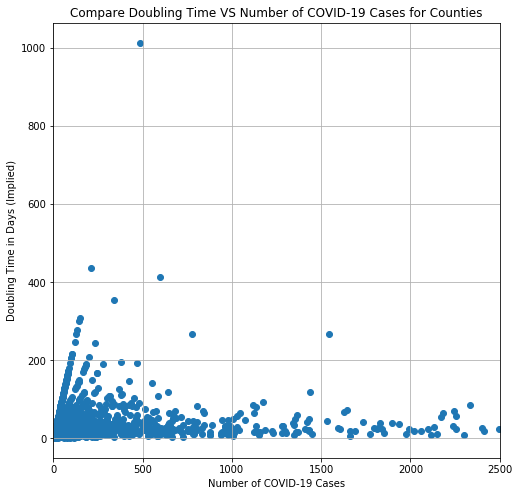

In [524]:
plt.figure(figsize=[8,8])
plt.grid()
plt.title('Compare Doubling Time VS Number of COVID-19 Cases for Counties')
plt.scatter(COVID_dbl_dailycol[COVID_dbl_dailycol.columns[4]],COVID_dbl_dailycol.Doublingtime_days)
plt.xlim(0,2500)
# plt.ylim(0,1.05)
plt.xlabel('Number of COVID-19 Cases')
plt.ylabel('Doubling Time in Days (Implied)');

In [525]:
covid_data['CasesPer100000'] = covid_data['cases'] / (covid_data['2019EstPop'] / 100000)
covid_data['DeathsPer100000'] = covid_data['deaths'] / (covid_data['2019EstPop'] / 100000)

In [526]:
states = ['Illinois', 'Michigan', 'New York', 'Washington', 'California', 'Louisiana', 'Florida', 'Massachusetts']
date_recent = '2020-03-20'

In [527]:
covid_st = covid_data[covid_data.state.isin(states)]

In [528]:
states = list(set(covid_data['state']))
states.sort()

In [110]:
covid_st.loc[:,'date'] = pd.to_datetime(covid_st.loc[:,'date'])

In [111]:
covid_st = covid_st[covid_st['date'] > date_recent]

In [112]:
covid_st_IL = covid_st[covid_st['state'] == 'Illinois']
covid_st_MI = covid_st[covid_st['state'] == 'Michigan']
covid_st_CA = covid_st[covid_st['state'] == 'California']
covid_st_NY = covid_st[covid_st['state'] == 'New York']
covid_st_FL = covid_st[covid_st['state'] == 'Florida']
covid_st_LA = covid_st[covid_st['state'] == 'Louisiana']
covid_st_WA = covid_st[covid_st['state'] == 'Washington']
covid_st_MA = covid_st[covid_st['state'] == 'Massachusetts']

In [113]:
covid_st_IL_summ = covid_st_IL.groupby('date')['cases','deaths'].sum()
covid_st_MI_summ = covid_st_MI.groupby('date')['cases','deaths'].sum()
covid_st_CA_summ = covid_st_CA.groupby('date')['cases','deaths'].sum()
covid_st_NY_summ = covid_st_NY.groupby('date')['cases','deaths'].sum()
covid_st_FL_summ = covid_st_FL.groupby('date')['cases','deaths'].sum()
covid_st_LA_summ = covid_st_LA.groupby('date')['cases','deaths'].sum()
covid_st_WA_summ = covid_st_WA.groupby('date')['cases','deaths'].sum()
covid_st_MA_summ = covid_st_MA.groupby('date')['cases','deaths'].sum()

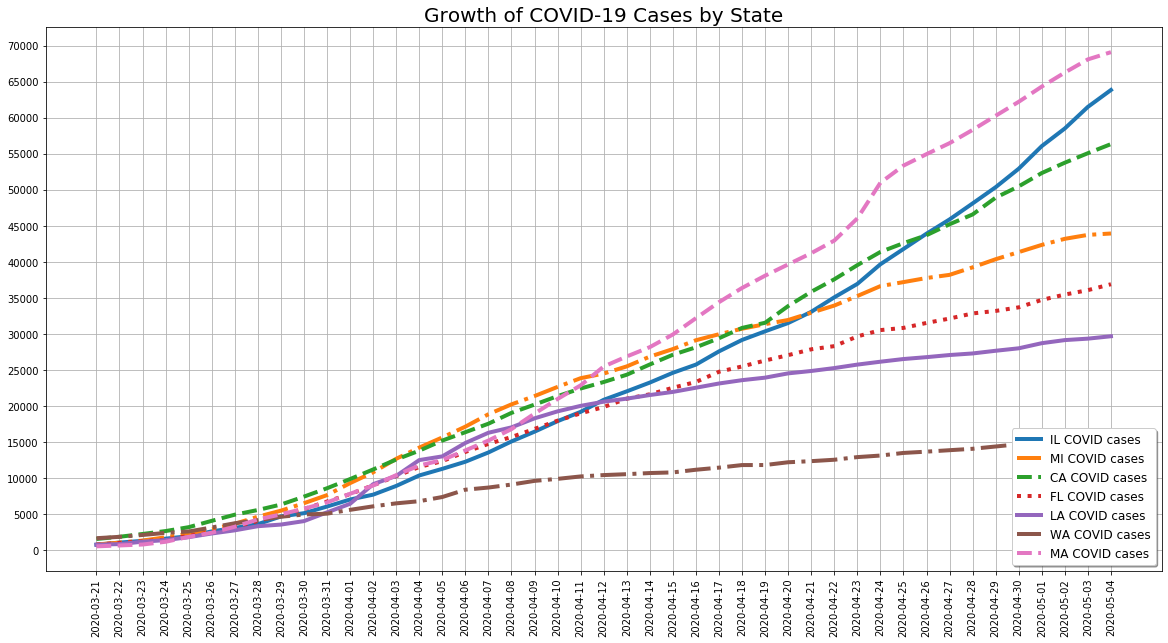

In [117]:
plt.figure(figsize=[20,10])
plt.grid()
plt.title('Growth of COVID-19 Cases by State', fontsize = '20')

plt.plot(covid_st_IL_summ.index, covid_st_IL_summ.cases, linewidth = 4, linestyle = '-')
plt.plot(covid_st_MI_summ.index, covid_st_MI_summ.cases, linewidth = 4, linestyle = '-.')
plt.plot(covid_st_CA_summ.index, covid_st_CA_summ.cases, linewidth = 4, linestyle = '--')
plt.plot(covid_st_FL_summ.index, covid_st_FL_summ.cases, linewidth = 4, linestyle = ':')
plt.plot(covid_st_LA_summ.index, covid_st_LA_summ.cases, linewidth = 4, linestyle = '-')
plt.plot(covid_st_WA_summ.index, covid_st_WA_summ.cases, linewidth = 4, linestyle = '-.')
plt.plot(covid_st_MA_summ.index, covid_st_MA_summ.cases, linewidth = 4, linestyle = '--')

y_ticks = np.linspace(0,70000,15)
plt.xticks(covid_st_IL_summ.index, fontsize = '10', rotation = 90)
plt.legend(['IL COVID cases','MI COVID cases','CA COVID cases', 'FL COVID cases', 'LA COVID cases', 
            'WA COVID cases', 'MA COVID cases'], shadow = True, loc = 4, fontsize = '12')
plt.yticks(y_ticks);

In [123]:
covid_SD = covid_data[covid_data['state'] == 'South Dakota']
covid_SD_summ = covid_SD.groupby('date')['cases', 'deaths'].sum()

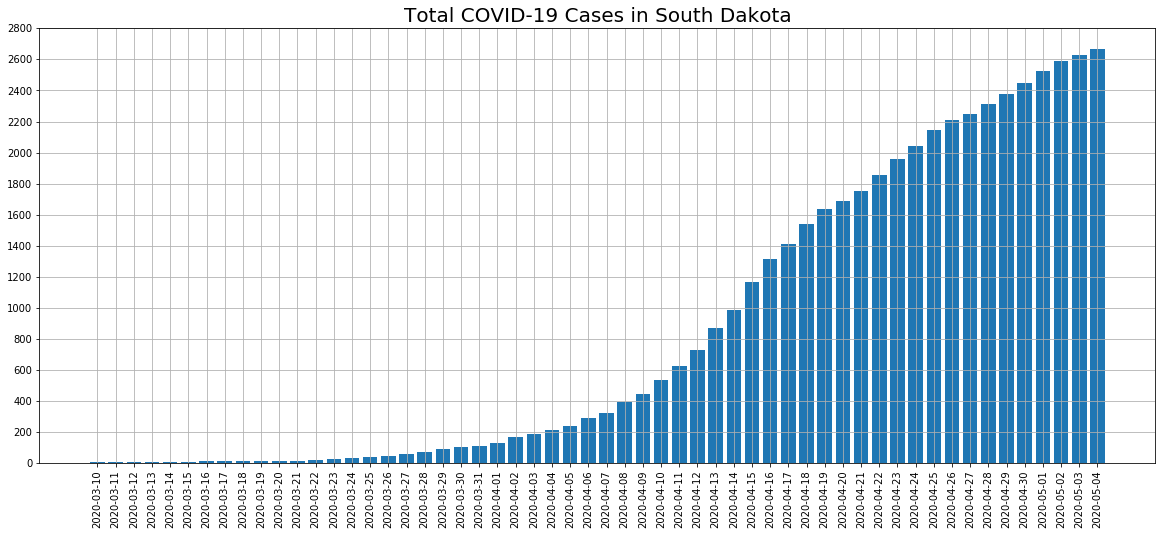

In [125]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total COVID-19 Cases in South Dakota', fontsize = '20')
plt.bar(covid_SD_summ.index, covid_SD_summ.cases)

y_ticks = np.linspace(0,2800,15)
plt.xticks(covid_SD_summ.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [126]:
covid_SD[covid_SD['date'] == covid_SD.date.max()].sort_values(by='cases', ascending=False)

date                county         state     FIPS  cases  deaths  \
89632 2020-05-04      Minnehaha County  South Dakota  46099.0   2170      16   
89368 2020-05-04        Lincoln County  South Dakota  46083.0    163       0   
88675 2020-05-04          Brown County  South Dakota  46013.0     65       0   
89964 2020-05-04          Union County  South Dakota  46127.0     32       0   
90028 2020-05-04        Yankton County  South Dakota  46135.0     28       0   
88534 2020-05-04         Beadle County  South Dakota  46005.0     21       2   
89925 2020-05-04         Turner County  South Dakota  46125.0     17       0   
88862 2020-05-04      Codington County  South Dakota  46029.0     15       0   
89721 2020-05-04     Pennington County  South Dakota  46103.0     14       0   
89167 2020-05-04         Hughes County  South Dakota  46065.0     13       0   
88631 2020-05-04      Brookings County  South Dakota  46011.0     13       0   
89758 2020-05-04        Roberts County  South Dakota  46109.0     10       0   
89327 2020-05-04       Lawrence County  South Dakota  46081.0      9       0   
89826 2020-05-04        Stanley County  South Dakota  46117.0      8       0   
88951 2020-05-04            Day County  South Dakota  46037.0      8       0   
88819 2020-05-04           Clay County  South Dakota  46027.0      7       0   
89651 2020-05-04          Moody County  South Dakota  46101.0      6       0   
89253 2020-05-04        Jerauld County  South Dakota  46073.0      6       1   
88944 2020-05-04        Davison County  South Dakota  46035.0      6       1   
89990 2020-05-04       Walworth County  South Dakota  46129.0      5       0   
88745 2020-05-04    Charles Mix County  South Dakota  46023.0      5       0   
88589 2020-05-04      Bon Homme County  South Dakota  46009.0      4       0   
89288 2020-05-04           Lake County  South Dakota  46079.0      4       0   
89500 2020-05-04         McCook County  South Dakota  46087.0      4       1   
89411 2020-05-04          Lyman County  South Dakota  46085.0      3       0   
89782 2020-05-04        Sanborn County  South Dakota  46111.0      3       0   
89815 2020-05-04          Spink County  South Dakota  46115.0      3       0   
89888 2020-05-04           Todd County  South Dakota  46121.0      3       0   
89205 2020-05-04     Hutchinson County  South Dakota  46067.0      3       0   
89038 2020-05-04     Fall River County  South Dakota  46047.0      2       0   
89115 2020-05-04         Hamlin County  South Dakota  46057.0      2       0   
89849 2020-05-04          Sully County  South Dakota  46119.0      1       0   
88888 2020-05-04         Corson County  South Dakota  46031.0      1       0   
88688 2020-05-04        Buffalo County  South Dakota  46017.0      1       0   
88782 2020-05-04          Clark County  South Dakota  46025.0      1       0   
89576 2020-05-04          Miner County  South Dakota  46097.0      1       0   
89678 2020-05-04  Oglala Lakota County  South Dakota  46102.0      1       0   
88989 2020-05-04          Deuel County  South Dakota  46039.0      1       0   
89124 2020-05-04           Hand County  South Dakota  46059.0      1       0   
89551 2020-05-04          Meade County  South Dakota  46093.0      1       0   
89510 2020-05-04      McPherson County  South Dakota  46089.0      1       0   
89447 2020-05-04       Marshall County  South Dakota  46091.0      1       0   
88993 2020-05-04          Dewey County  South Dakota  46041.0      1       0   
89001 2020-05-04        Douglas County  South Dakota  46043.0      1       0   
89227 2020-05-04           Hyde County  South Dakota  46069.0      1       0   
89077 2020-05-04          Faulk County  South Dakota  46049.0      1       0   
88478 2020-05-04         Aurora County  South Dakota  46003.0      1       0   

       MedianHHInc_2018                       State_County  2019EstPop  \
89632           60033.0      South Dakota_Minnehaha County    193134.0   
89368           84889.0

In [128]:
covid_SD_Minnehaha = covid_SD[covid_SD.county == 'Minnehaha County'][['date', 'cases', 'deaths']]
covid_SD_Minnehaha.set_index('date', inplace=True)
covid_SD_Minnehaha.head()

cases  deaths
date                     
2020-03-10      1       0
2020-03-11      3       0
2020-03-12      3       0
2020-03-13      3       0
2020-03-14      3       0

In [130]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total COVID-19 Cases in Minnehaha County in South Dakota', fontsize = '20')
plt.bar(covid_SD_Minnehaha.index, covid_SD_Minnehaha.cases)

# y_ticks = np.linspace(0,1200,7)
plt.xticks(covid_SD_Minnehaha.index, fontsize = '10', rotation = 90);
# plt.yticks(y_ticks);

In [131]:
covid_SD_Minnehaha_daily = covid_SD_Minnehaha.diff()
covid_SD_Minnehaha_daily.columns = ['newcases_daily', 'newdeaths_daily']

In [133]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total Daily New COVID-19 Cases in Minnehaha County in SD', fontsize = '20')
plt.bar(covid_SD_Minnehaha_daily.index, covid_SD_Minnehaha_daily.newcases_daily)

# y_ticks = np.linspace(0,180,10)
plt.xticks(covid_SD_Minnehaha_daily.index, fontsize = '10', rotation = 90);
# plt.yticks(y_ticks);

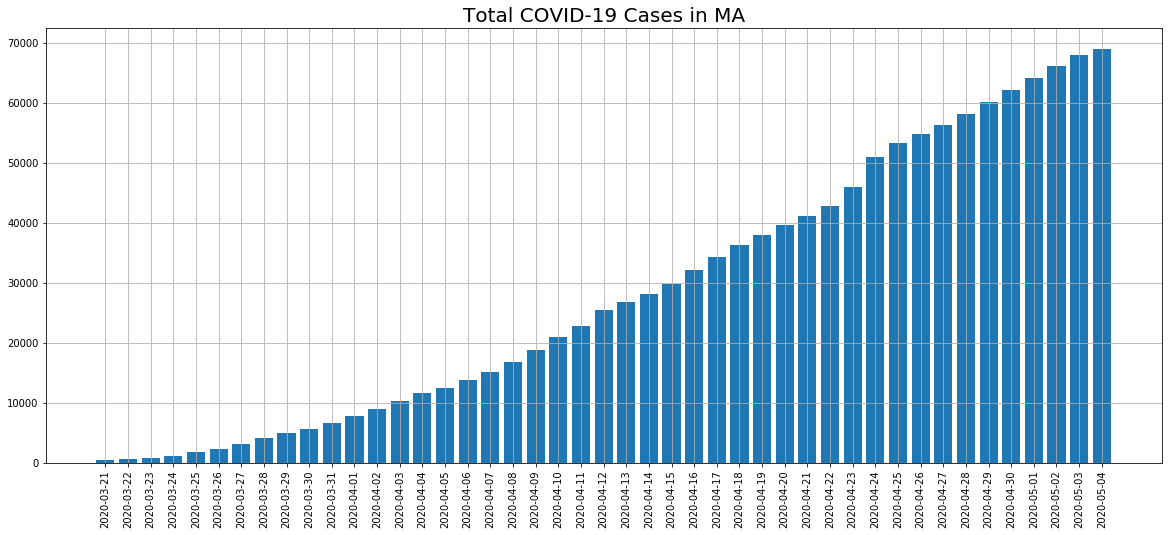

In [135]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total COVID-19 Cases in MA', fontsize = '20')
plt.bar(covid_st_MA_summ.index, covid_st_MA_summ.cases)

# y_ticks = np.linspace(0,55000,12)
plt.xticks(covid_st_MA_summ.index, fontsize = '10', rotation = 90);
# plt.yticks(y_ticks);

In [136]:
covid_MA_daily = covid_st_MA_summ.diff()
covid_MA_daily.columns = ['newcases_daily', 'newdeaths_daily']

In [138]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total Daily New COVID-19 Cases in MA', fontsize = '20')
plt.bar(covid_MA_daily.index, covid_MA_daily.newcases_daily)

y_ticks = np.linspace(0,5000,11)
plt.xticks(covid_MA_daily.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [139]:
covid_MA_pct = covid_st_MA_summ.pct_change()
covid_MA_pct.columns = ['cases_dailypctchange', 'deaths_dailypctchange']

In [140]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily Percent Change in Total COVID-19 Cases in MA', fontsize = '20')
plt.plot(covid_MA_pct.index, covid_MA_pct.cases_dailypctchange)

y_ticks = np.linspace(0,0.6,7)
plt.xticks(covid_MA_pct.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [141]:
covid_data[covid_data['date'] == covid_data.date.max()][covid_data['state'] == 
                                                        'Massachusetts'].sort_values(by = 'cases', ascending=False)

C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


date             county          state     FIPS  cases  deaths  \
47207 2020-05-04   Middlesex County  Massachusetts  25017.0  15757     997   
47461 2020-05-04     Suffolk County  Massachusetts  25025.0  13941     596   
47000 2020-05-04       Essex County  Massachusetts  25009.0   9773     512   
47569 2020-05-04   Worcester County  Massachusetts  25027.0   6471     320   
47316 2020-05-04     Norfolk County  Massachusetts  25021.0   6382     555   
47367 2020-05-04    Plymouth County  Massachusetts  25023.0   5602     333   
47099 2020-05-04     Hampden County  Massachusetts  25013.0   4114     408   
46903 2020-05-04     Bristol County  Massachusetts  25005.0   4103     205   
46792 2020-05-04  Barnstable County  Massachusetts  25001.0    961      47   
47511 2020-05-04     Unknown County  Massachusetts    100.0    662       7   
47146 2020-05-04   Hampshire County  Massachusetts  25015.0    563      36   
46851 2020-05-04   Berkshire County  Massachusetts  25003.0    453      36   
47048 2020-05-04    Franklin County  Massachusetts  25011.0    273      37   
46944 2020-05-04       Dukes County  Massachusetts  25007.0     21       1   
47252 2020-05-04   Nantucket County  Massachusetts  25019.0     11       0   

       MedianHHInc_2018                     State_County  2019EstPop  \
47207          100374.0   Massachusetts_Middlesex County   1611699.0   
47461           68743.0     Massachusetts_Suffolk County    803907.0   
47000           76373.0       Massachusetts_Essex County    789034.0   
47569           71767.0   Massachusetts_Worcester County    830622.0   
47316          100184.0     Massachusetts_Norfolk County    706775.0   
47367           89678.0    Massachusetts_Plymouth County    521202.0   
47099           52682.0     Massachusetts_Hampden County    466372.0   
46903           66005.0     Massachusetts_Bristol County    565217.0   
46792           69001.0  Massachusetts_Barnstable County    212990.0   
47511               NaN     Massachusetts_Unknown County         NaN   
47146           74456.0   Massachusetts_Hampshire County    160830.0   
46851           58375.0   Massachusetts_Berkshire County    124944.0   
47048           58992.0    Massachusetts_Franklin County     70180.0   
46944           70224.0       Massachusetts_Dukes County     17332.0   
47252           97525.0   Massachusetts_Nantucket County     11399.0   

       CasesPer100000  DeathsPer100000  
47207      977.663943        61.860186  
47461     1734.155817        74.137929  
47000     1238.603153        64.889472  
47569      779.054732        38.525346  
47316      902.974780        78.525698  
47367     1074.823197        63.890776  
47099      882.128430        87.483811  
46903      725.915887        36.269256  
46792      451.194892        22.066764  
47511             NaN              NaN  
47146      350.059069        22.383884  
46851      362.562428        28.812908  
47048      388.999715        52.721573  
46944      121.163166         5.769675  
47252       96.499693         0.000000

In [142]:
covid_IL_daily = covid_st_IL_summ.diff()
covid_IL_daily.columns = ['newcases_daily', 'newdeaths_daily']

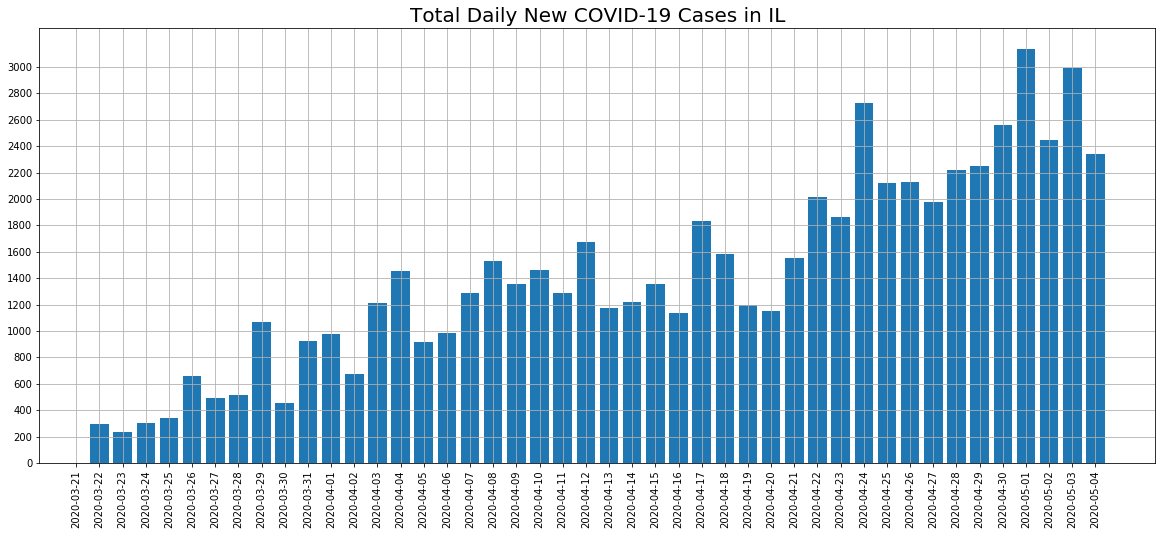

In [143]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total Daily New COVID-19 Cases in IL', fontsize = '20')
plt.bar(covid_IL_daily.index, covid_IL_daily.newcases_daily)

y_ticks = np.linspace(0,3000,16)
plt.xticks(covid_IL_daily.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [144]:
covid_st_IL_summ_pct = covid_st_IL_summ.pct_change()
covid_st_IL_summ_pct.columns = ['cases_dailypctchange', 'deaths_dailypctchange']

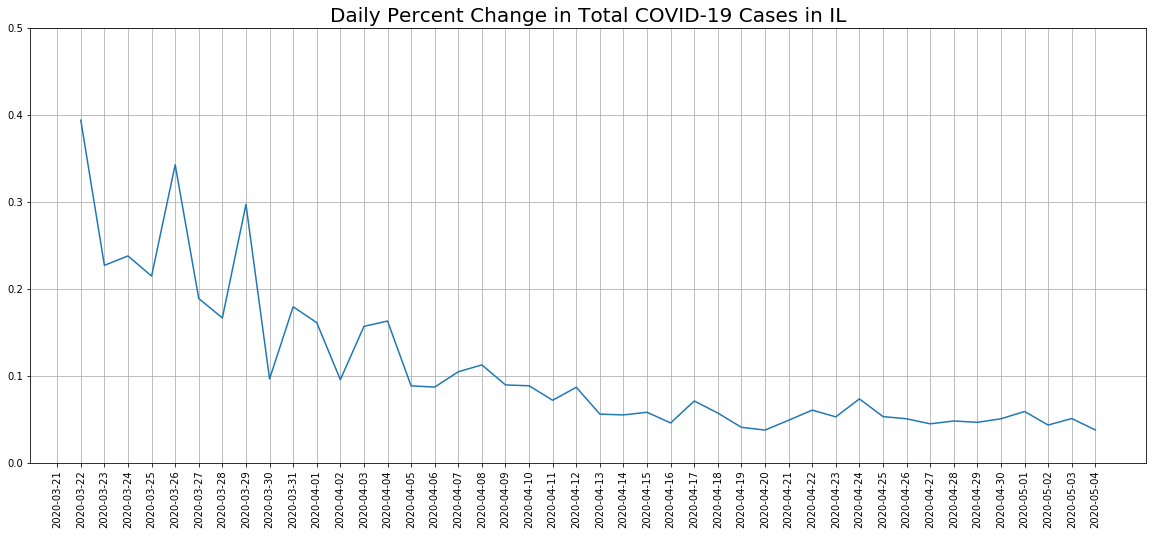

In [145]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily Percent Change in Total COVID-19 Cases in IL', fontsize = '20')
plt.plot(covid_st_IL_summ_pct.index, covid_st_IL_summ_pct.cases_dailypctchange)

y_ticks = np.linspace(0,0.5,6)
plt.xticks(covid_st_IL_summ_pct.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [146]:
# Cook County passed 100+ cases on 2020-03-17, look at data past that date
covid_data_IL_Cook = covid_data[covid_data['State_County'] == 
           'Illinois_Cook County'][covid_data['date'] > '2020-03-16'][['date', 'cases', 'deaths']]
covid_data_IL_Cook.set_index('date', inplace=True)
covid_data_IL_Cook

C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


cases  deaths
date                     
2020-03-17    107       1
2020-03-18    179       1
2020-03-19    279       2
2020-03-20    412       3
2020-03-21    548       4
2020-03-22    805       6
2020-03-23    922       9
2020-03-24   1194      12
2020-03-25   1418      13
2020-03-26   1904      18
2020-03-27   2239      20
2020-03-28   2613      28
2020-03-29   3445      40
2020-03-30   3727      44
2020-03-31   4496      61
2020-04-01   5152      95
2020-04-02   5575     107
2020-04-03   6473     141
2020-04-04   7439     167
2020-04-05   8043     186
2020-04-06   8728     209
2020-04-07   9509     249
2020-04-08  10520     312
2020-04-09  11415     351
2020-04-10  12472     398
2020-04-11  13417     453
2020-04-12  14585     485
2020-04-13  15474     543
2020-04-14  16323     577
2020-04-15  17306     630
2020-04-16  18087     722
2020-04-17  19391     760
2020-04-18  20395     860
2020-04-19  21272     877
2020-04-20  22101     915
2020-04-21  23181    1002
2020-04-22  24546    1072
2020-04-23  25811    1142
2020-04-24  27616    1220
2020-04-25  29058    1267
2020-04-26  30574    1313
2020-04-27  31953    1347
2020-04-28  33449    1457
2020-04-29  34880    1516
2020-04-30  36513    1607
2020-05-01  38668    1673
2020-05-02  40227    1743
2020-05-03  42324    1786
2020-05-04  43715    1802

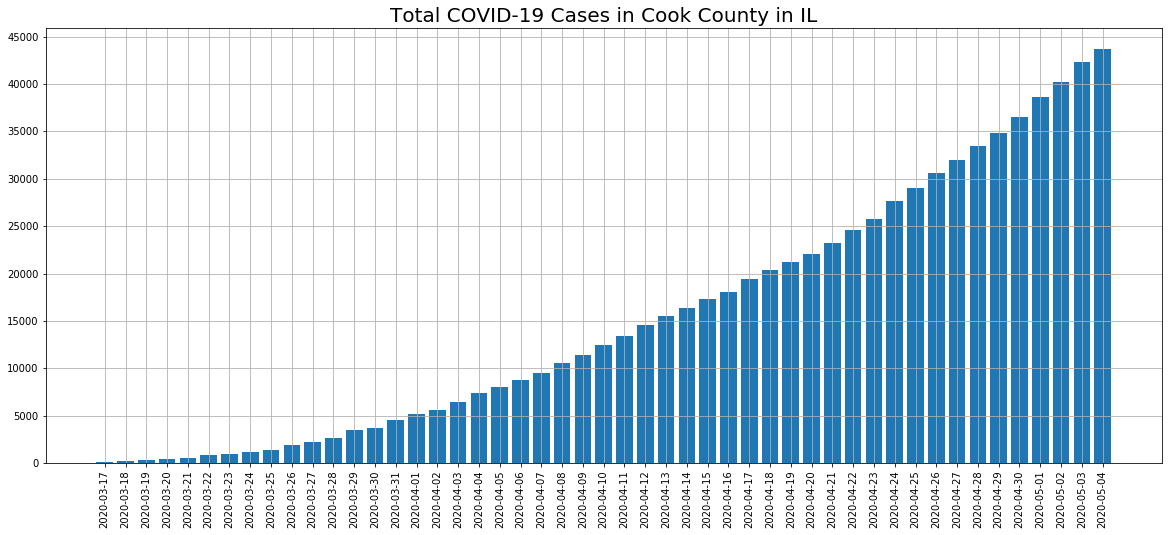

In [149]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total COVID-19 Cases in Cook County in IL', fontsize = '20')
plt.bar(covid_data_IL_Cook.index, covid_data_IL_Cook.cases)

y_ticks = np.linspace(0,45000,10)
plt.xticks(covid_data_IL_Cook.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [150]:
covid_data_IL_Cook_daily = covid_data_IL_Cook.diff()
covid_data_IL_Cook_daily.columns = ['newcases_daily', 'newdeaths_daily']

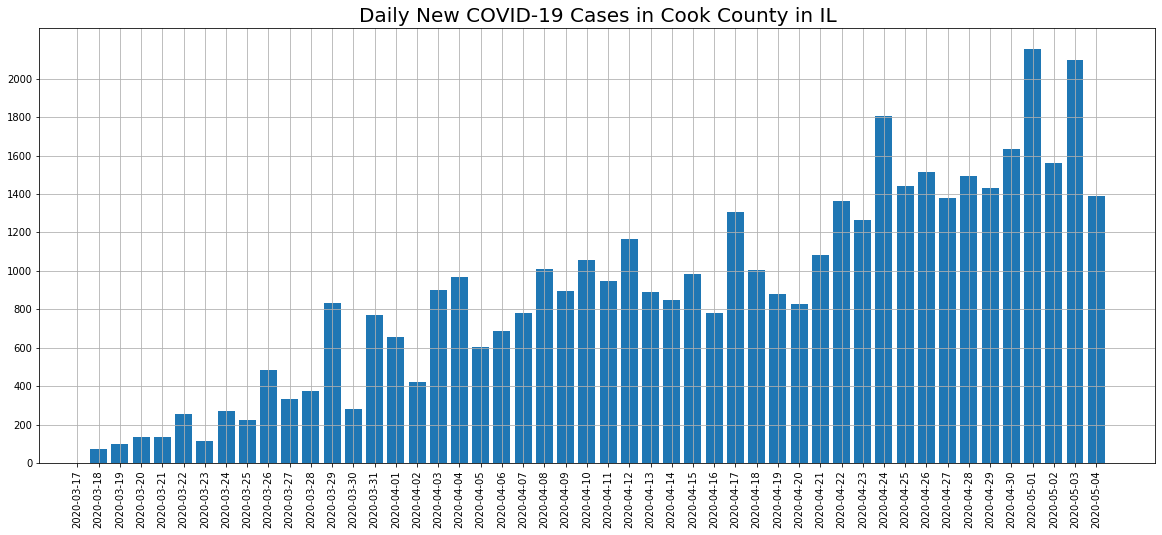

In [151]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily New COVID-19 Cases in Cook County in IL', fontsize = '20')
plt.bar(covid_data_IL_Cook_daily.index, covid_data_IL_Cook_daily.newcases_daily)

y_ticks = np.linspace(0,2000,11)
plt.xticks(covid_data_IL_Cook_daily.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [152]:
covid_data_IL_Cook_daily.tail()

newcases_daily  newdeaths_daily
date                                       
2020-04-30          1633.0             91.0
2020-05-01          2155.0             66.0
2020-05-02          1559.0             70.0
2020-05-03          2097.0             43.0
2020-05-04          1391.0             16.0

In [153]:
covid_data_IL_Cook_daily.head()

newcases_daily  newdeaths_daily
date                                       
2020-03-17             NaN              NaN
2020-03-18            72.0              0.0
2020-03-19           100.0              1.0
2020-03-20           133.0              1.0
2020-03-21           136.0              1.0

In [154]:
covid_data_IL_Cook_pct = covid_data_IL_Cook.pct_change()
covid_data_IL_Cook_pct.columns = ['cases_dailypctchange', 'deaths_dailypctchange']

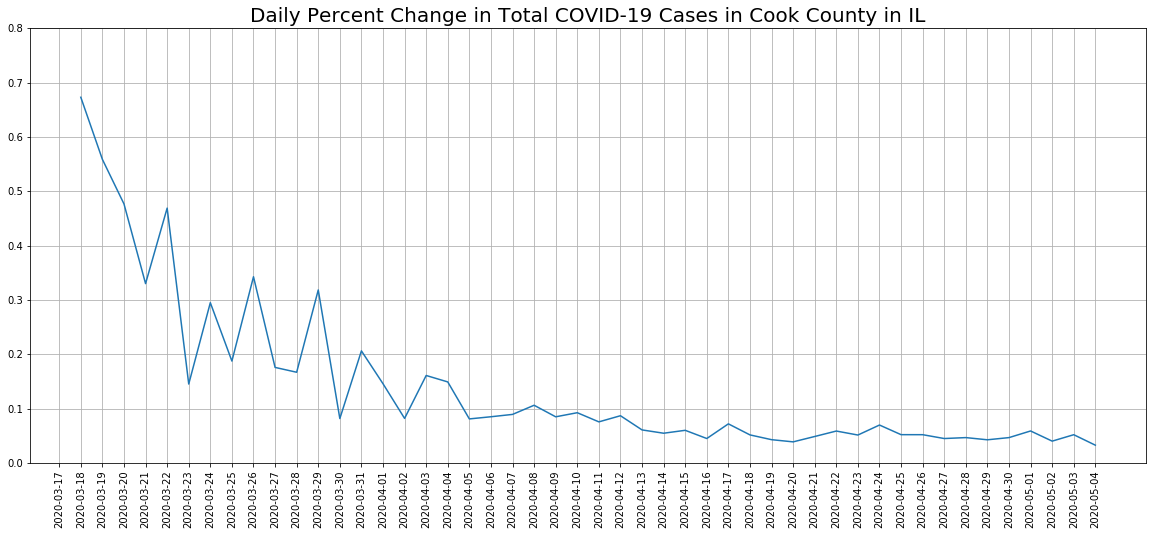

In [155]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily Percent Change in Total COVID-19 Cases in Cook County in IL', fontsize = '20')
plt.plot(covid_data_IL_Cook_pct.index, covid_data_IL_Cook_pct.cases_dailypctchange)

y_ticks = np.linspace(0,0.8,9)
plt.xticks(covid_data_IL_Cook_pct.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

### <span style="color:red"> Challenge - create a line plot that shows Cook County daily new cases as % of IL daily new cases

In [156]:
covid_daily_IL_Cook_pct = covid_IL_daily[covid_IL_daily.index > '2020-03-17']
covid_daily_IL_Cook_pct.columns = ['IL_dailynewcases', 'IL_dailynewdeaths']

In [157]:
covid_daily_IL_Cook_pct['IL_Cook_dailynewcases'] = [covid_data_IL_Cook_daily.loc[z,'newcases_daily'] for z in list(covid_daily_IL_Cook_pct.index)]

In [158]:
covid_daily_IL_Cook_pct['Dailynewcases_Cook_pctofIL'] = covid_daily_IL_Cook_pct['IL_Cook_dailynewcases'] / covid_daily_IL_Cook_pct['IL_dailynewcases']

In [159]:
covid_daily_IL_Cook_pct

IL_dailynewcases  IL_dailynewdeaths  IL_Cook_dailynewcases  \
date                                                                     
2020-03-21               NaN                NaN                  136.0   
2020-03-22             296.0                3.0                  257.0   
2020-03-23             238.0                3.0                  117.0   
2020-03-24             306.0                4.0                  272.0   
2020-03-25             342.0                3.0                  224.0   
2020-03-26             663.0                7.0                  486.0   
2020-03-27             491.0               11.0                  335.0   
2020-03-28             515.0               13.0                  374.0   
2020-03-29            1071.0               21.0                  832.0   
2020-03-30             452.0               13.0                  282.0   
2020-03-31             921.0               23.0                  769.0   
2020-04-01             976.0               39.0                  656.0   
2020-04-02             673.0               19.0                  423.0   
2020-04-03            1209.0               47.0                  898.0   
2020-04-04            1454.0               36.0                  966.0   
2020-04-05             919.0               35.0                  604.0   
2020-04-06             985.0               26.0                  685.0   
2020-04-07            1287.0               75.0                  781.0   
2020-04-08            1529.0               80.0                 1011.0   
2020-04-09            1354.0               71.0                  895.0   
2020-04-10            1460.0               73.0                 1057.0   
2020-04-11            1291.0               74.0                  945.0   
2020-04-12            1672.0               45.0                 1168.0   
2020-04-13            1173.0               73.0                  889.0   
2020-04-14            1219.0               78.0                  849.0   
2020-04-15            1357.0               79.0                  983.0   
2020-04-16            1134.0              123.0                  781.0   
2020-04-17            1837.0               62.0                 1304.0   
2020-04-18            1585.0              130.0                 1004.0   
2020-04-19            1197.0               30.0                  877.0   
2020-04-20            1151.0               57.0                  829.0   
2020-04-21            1551.0              120.0                 1080.0   
2020-04-22            2012.0               97.0                 1365.0   
2020-04-23            1863.0              120.0                 1265.0   
2020-04-24            2724.0              108.0                 1805.0   
2020-04-25            2119.0               80.0                 1442.0   
2020-04-26            2126.0               59.0                 1516.0   
2020-04-27            1980.0               49.0                 1379.0   
2020-04-28            2219.0              140.0                 1496.0   
2020-04-29            2253.0               89.0                 1431.0   
2020-04-30            2563.0              140.0                 1633.0   
2020-05-01            3137.0              103.0                 2155.0   
2020-05-02            2450.0              112.0                 1559.0   
2020-05-03            2994.0               56.0                 2097.0   
2020-05-04            2341.0               41.0                 1391.0   

            Dailynewcases_Cook_pctofIL  
date                                    
2020-03-21                         NaN  
2020-03-22                    0.868243  
2020-03-23                    0.491597  
2020-03-24                    0.888889  
2020-03-25                    0.654971  
2020-03-26                    0.733032  
2020-03-27                    0.682281  
2020-03-28                    0.726214  
2020-03-29                    0.776844  
2020-03-30                    0.623894  
2020-03-31                    0.834962  


In [160]:
covid_st_LA_summ_daily = covid_st_LA_summ.diff()
covid_st_LA_summ_daily.columns = ['newcases_daily', 'newdeaths_daily']

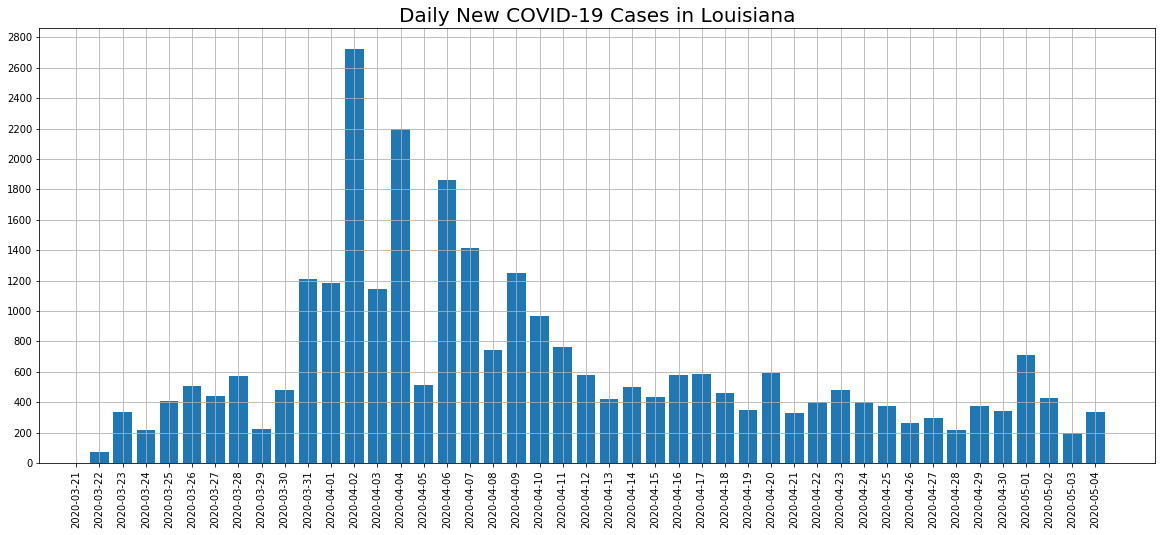

In [161]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily New COVID-19 Cases in Louisiana', fontsize = '20')
plt.bar(covid_st_LA_summ_daily.index, covid_st_LA_summ_daily.newcases_daily)

y_ticks = np.linspace(0,2800,15)
plt.xticks(covid_st_LA_summ_daily.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [162]:
# large spike in cases on 3/13/2020 so look after that date
covid_st_LA_summ_pct = covid_st_LA_summ[covid_st_LA_summ.index > '2020-03-14'].pct_change()
covid_st_LA_summ_pct.columns = ['cases_dailypctchange', 'deaths_dailypctchange']

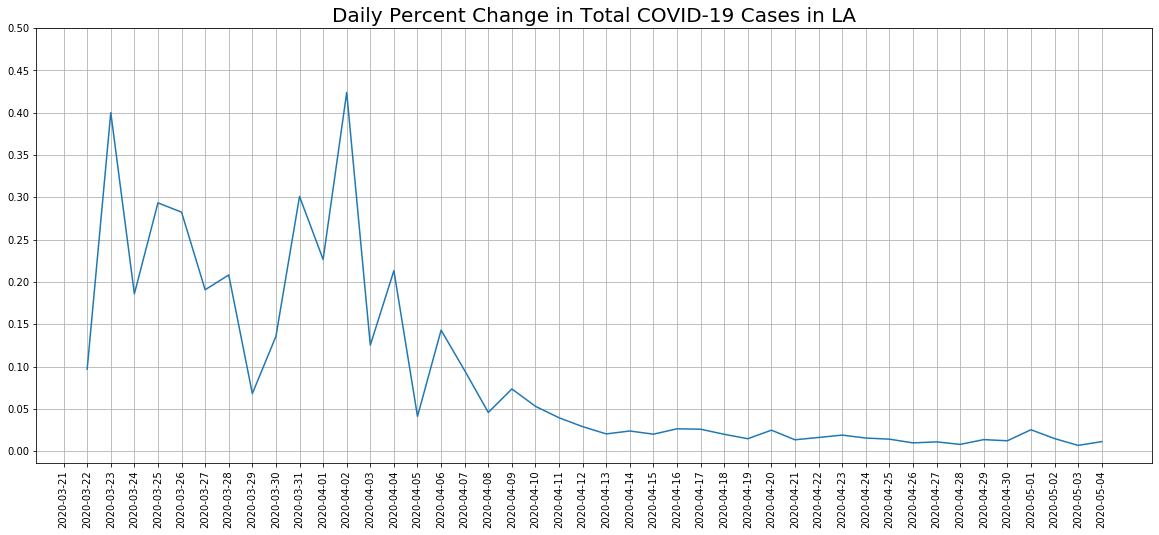

In [164]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily Percent Change in Total COVID-19 Cases in LA', fontsize = '20')
plt.plot(covid_st_LA_summ_pct.index, covid_st_LA_summ_pct.cases_dailypctchange)

y_ticks = np.linspace(0,0.50,11)
plt.xticks(covid_st_LA_summ_pct.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [165]:
covid_st_WA_summ_pct = covid_st_WA_summ.pct_change()
covid_st_WA_summ_pct.columns = ['cases_dailypctchange', 'deaths_dailypctchange']

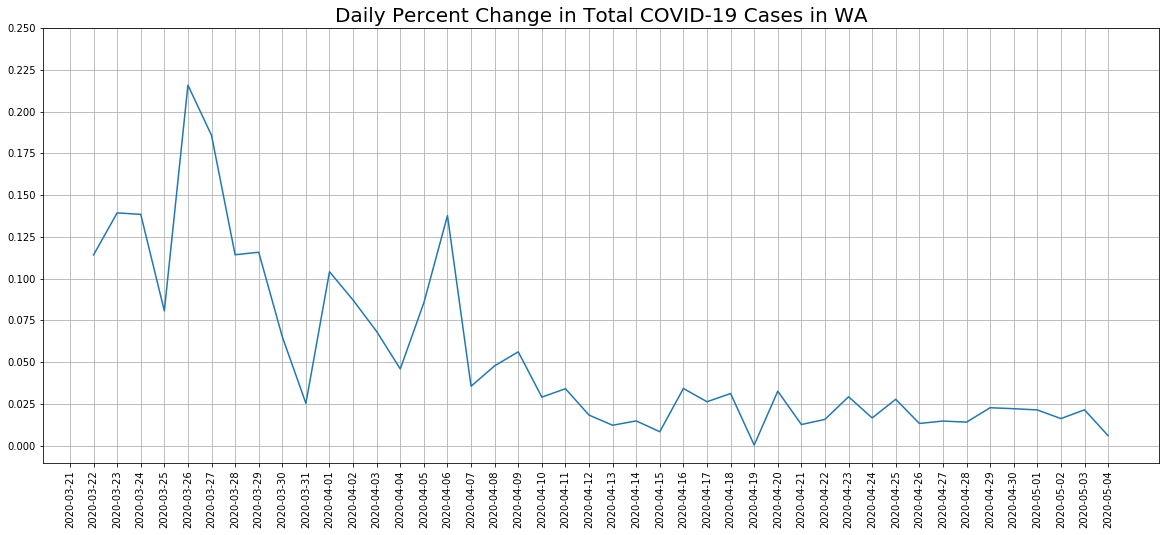

In [167]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily Percent Change in Total COVID-19 Cases in WA', fontsize = '20')
plt.plot(covid_st_WA_summ_pct.index, covid_st_WA_summ_pct.cases_dailypctchange)

y_ticks = np.linspace(0,0.25,11)
plt.xticks(covid_st_WA_summ_pct.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [168]:
covid_MI_OAK = covid_st_MI[covid_st_MI['county'] == 'Oakland County'].groupby('date')['cases','deaths'].sum()

In [169]:
covid_MI_OAK.tail()

cases  deaths
date                     
2020-04-30   7267     696
2020-05-01   7423     705
2020-05-02   7475     745
2020-05-03   7518     757
2020-05-04   7499     762

In [171]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total COVID-19 Cases in Oakland County in MI', fontsize = '20')
plt.bar(covid_MI_OAK.index, covid_MI_OAK.cases)

# y_ticks = np.linspace(0,7000,15)
plt.xticks(covid_MI_OAK.index, fontsize = '10', rotation = 90);
# plt.yticks(y_ticks);

In [172]:
covid_MI_OAK_daily = covid_MI_OAK.diff()
covid_MI_OAK_daily.columns = ['newcases_daily', 'newdeaths_daily']

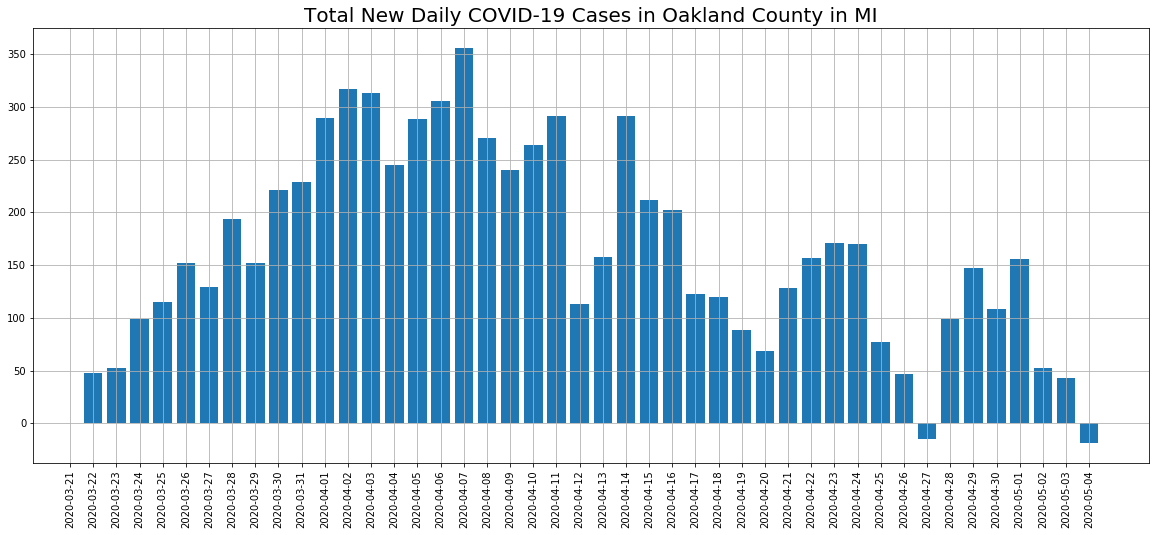

In [173]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total New Daily COVID-19 Cases in Oakland County in MI', fontsize = '20')
plt.bar(covid_MI_OAK_daily.index, covid_MI_OAK_daily.newcases_daily)

plt.xticks(covid_MI_OAK_daily.index, fontsize = '10', rotation = 90);

In [174]:
# there was a large spike on 3/19/2020 so look at the daily % change after that date
covid_MI_OAK_pct = covid_MI_OAK[covid_MI_OAK.index > '2020-03-19'].pct_change()
covid_MI_OAK_pct.columns = ['cases_dailypctchange', 'deaths_dailypctchange']

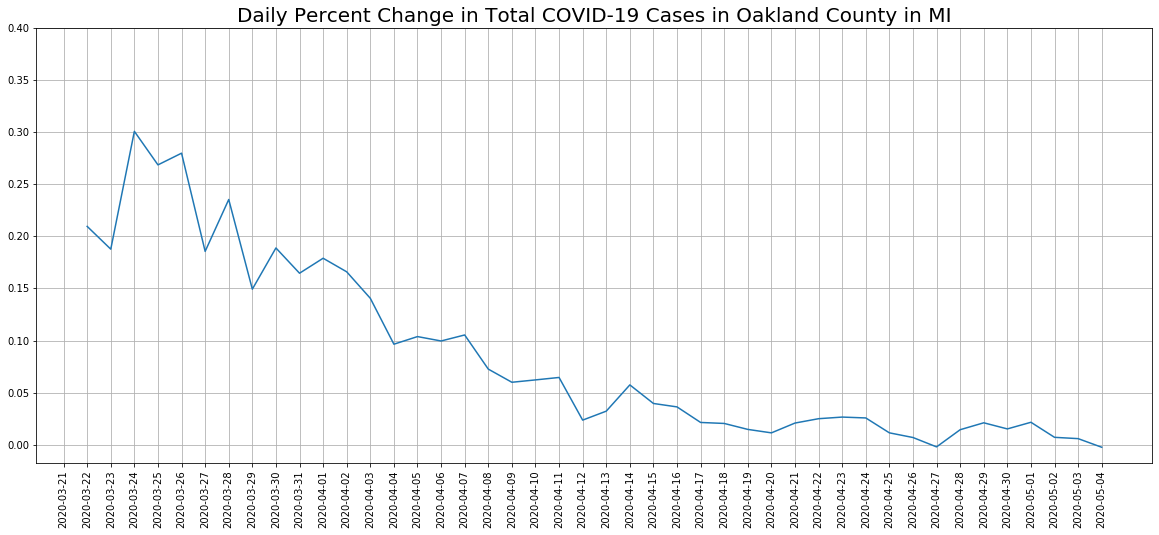

In [175]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily Percent Change in Total COVID-19 Cases in Oakland County in MI', fontsize = '20')
plt.plot(covid_MI_OAK_pct.index, covid_MI_OAK_pct.cases_dailypctchange)

ticks_y = np.linspace(0,0.40,9)
plt.xticks(covid_MI_OAK_pct.index, fontsize = '10', rotation = 90)
plt.yticks(ticks_y, fontsize = '10');

In [176]:
covid_MI_OAK['death_rate'] = covid_MI_OAK['deaths'] / covid_MI_OAK['cases']

In [177]:
covid_MI_OAK_deathrate = covid_MI_OAK[covid_MI_OAK.index > '2020-03-19']

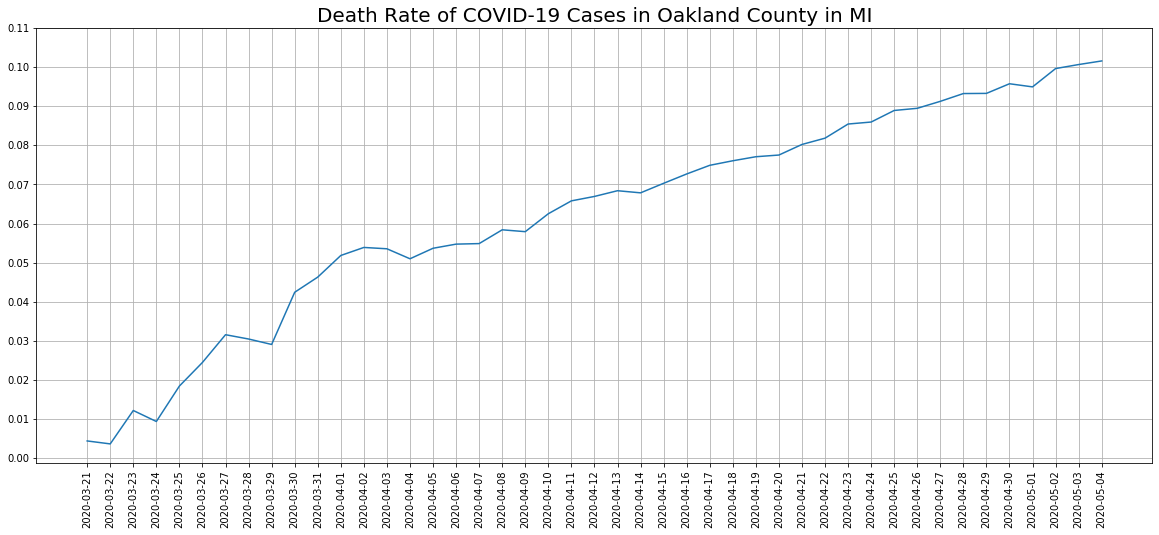

In [179]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Death Rate of COVID-19 Cases in Oakland County in MI', fontsize = '20')
plt.plot(covid_MI_OAK_deathrate.index, covid_MI_OAK_deathrate.death_rate)

ticks_y = np.linspace(0,0.11,12)
plt.xticks(covid_MI_OAK_deathrate.index, fontsize = '10', rotation = 90)
plt.yticks(ticks_y, fontsize = '10');

In [180]:
covid_MI_Wayne = covid_st_MI[covid_st_MI['county'] == 'Wayne County'][['date', 'cases', 'deaths']]
covid_MI_Wayne.set_index('date', inplace=True)

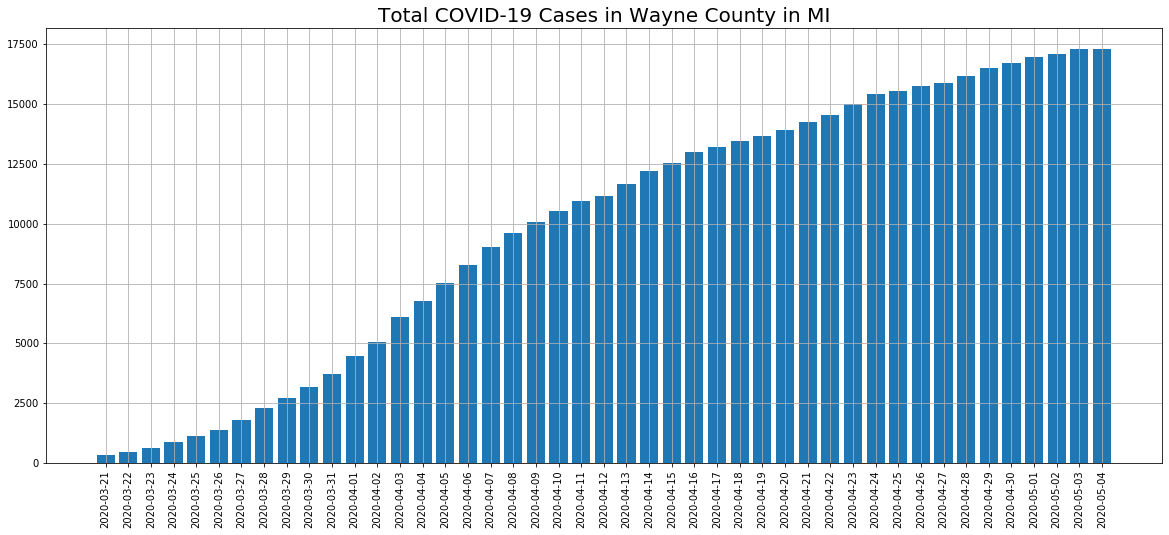

In [182]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total COVID-19 Cases in Wayne County in MI', fontsize = '20')
plt.bar(covid_MI_Wayne.index, covid_MI_Wayne.cases)

# y_ticks = np.linspace(0,16000,9)
plt.xticks(covid_MI_Wayne.index, fontsize = '10', rotation = 90);
# plt.yticks(y_ticks);

In [183]:
covid_MI_Wayne_daily = covid_MI_Wayne.diff()
covid_MI_Wayne_daily.columns = ['newcases_daily', 'newdeaths_daily']

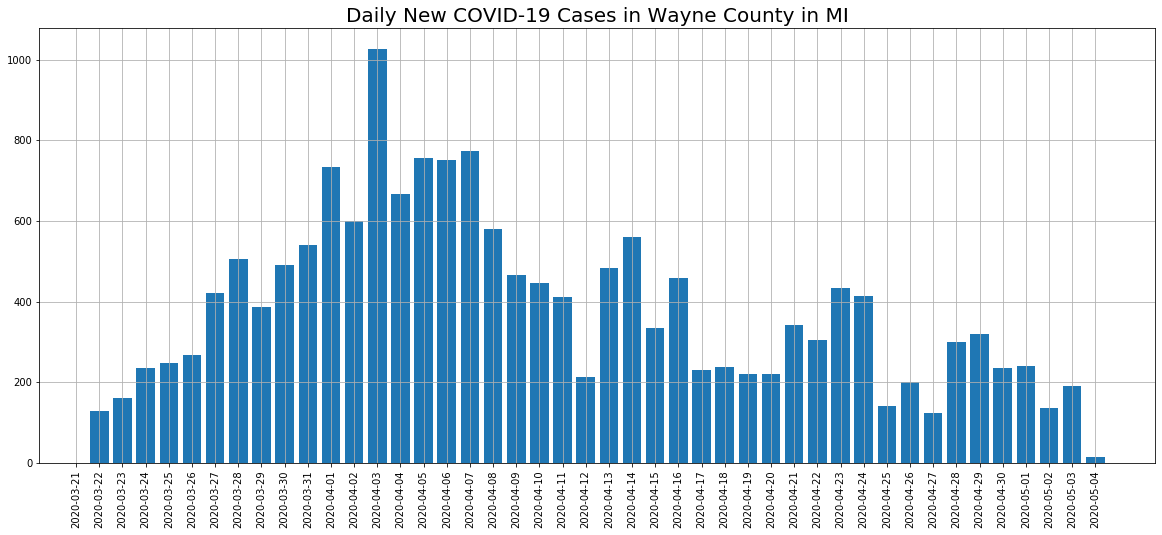

In [186]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily New COVID-19 Cases in Wayne County in MI', fontsize = '20')
plt.bar(covid_MI_Wayne_daily.index, covid_MI_Wayne_daily.newcases_daily)

plt.xticks(covid_MI_Wayne_daily.index, fontsize = '10', rotation = 90);

In [187]:
# large spike on 2020-03-19 so look at data after that date
covid_MI_Wayne_pct = covid_MI_Wayne[covid_MI_Wayne.index > '2020-03-19'].pct_change()
covid_MI_Wayne_pct.columns = ['cases_dailypctchange', 'deaths_dailypctchange']

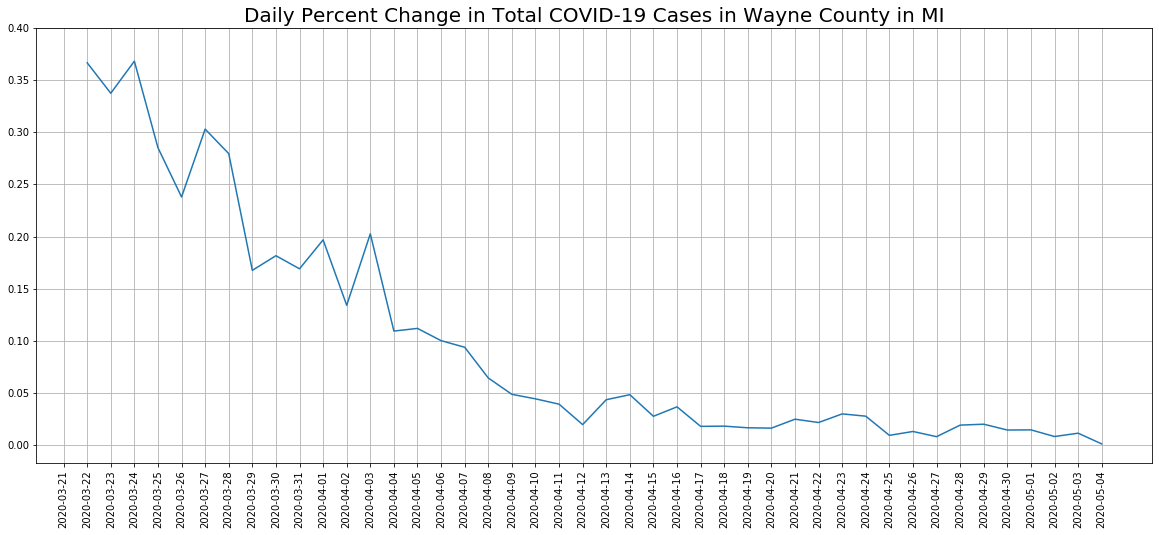

In [189]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily Percent Change in Total COVID-19 Cases in Wayne County in MI', fontsize = '20')
plt.plot(covid_MI_Wayne_pct.index, covid_MI_Wayne_pct.cases_dailypctchange)

ticks_y = np.linspace(0,0.4,9)
plt.xticks(covid_MI_Wayne_pct.index, fontsize = '10', rotation = 90)
plt.yticks(ticks_y, fontsize = '10');

In [190]:
covid_st_MI_daily = covid_st_MI_summ.diff()
covid_st_MI_daily.columns = ['newcases_daily', 'newdeaths_daily']

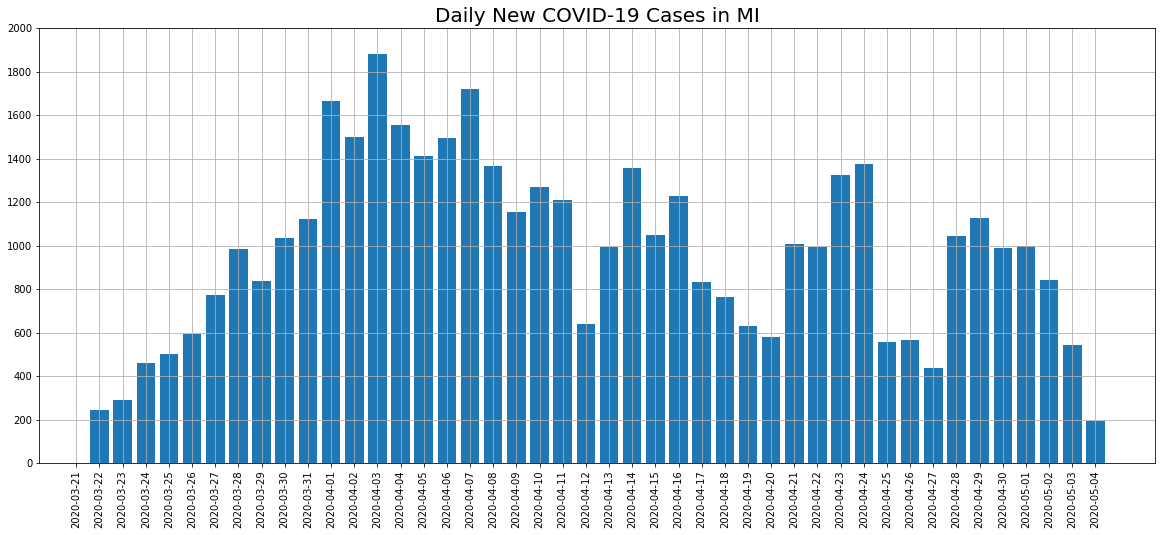

In [191]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily New COVID-19 Cases in MI', fontsize = '20')
plt.bar(covid_st_MI_daily.index, covid_st_MI_daily.newcases_daily)

y_ticks = np.linspace(0,2000,11)
plt.xticks(covid_st_MI_daily.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [192]:
# changed the date range for MI because there was a >300% increase in total # cases on 3/19/2019 (skews y-axis)
covid_st_MI_summ_pct = covid_st_MI_summ[covid_st_MI_summ.index > '2020-03-19'].pct_change()
covid_st_MI_summ_pct.columns = ['cases_dailypctchange', 'deaths_dailypctchange']

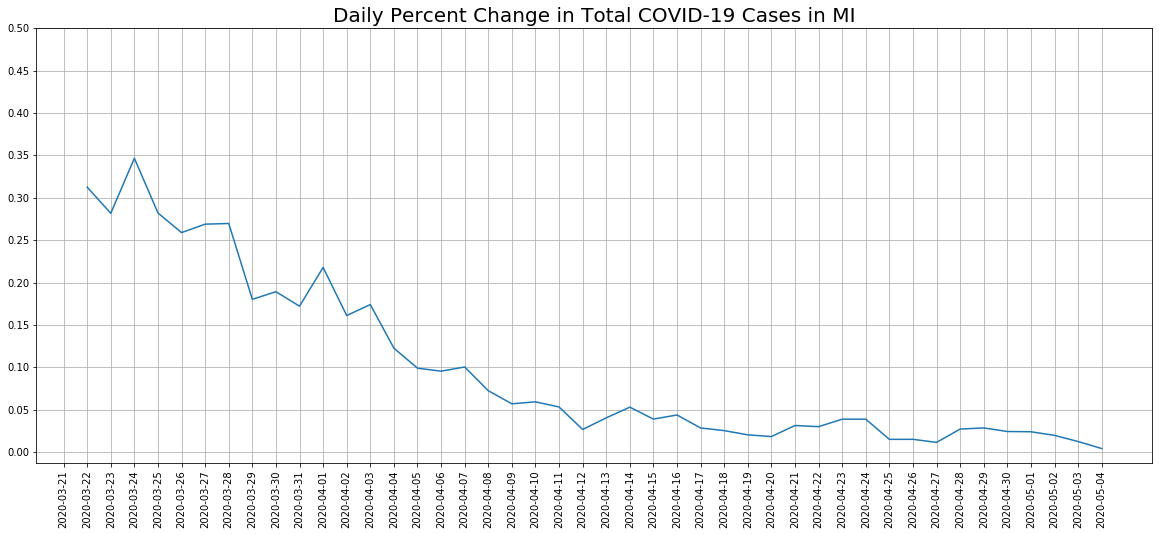

In [193]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily Percent Change in Total COVID-19 Cases in MI', fontsize = '20')
plt.plot(covid_st_MI_summ_pct.index, covid_st_MI_summ_pct.cases_dailypctchange)

ticks_y = np.linspace(0,0.50,11)
plt.xticks(covid_st_MI_summ_pct.index, fontsize = '10', rotation = 90)
plt.yticks(ticks_y, fontsize = '10');

In [194]:
covid_st_FL_summ_pct = covid_st_FL_summ.pct_change()
covid_st_FL_summ_pct.columns = ['cases_dailypctchange', 'deaths_dailypctchange']

In [195]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily Percent Change in Total COVID-19 Cases in FL', fontsize = '20')
plt.plot(covid_st_FL_summ_pct.index, covid_st_FL_summ_pct.cases_dailypctchange)

y_ticks = np.linspace(0,0.4,9)
plt.xticks(covid_st_FL_summ_pct.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [196]:
covid_st_CA[covid_st_CA['date'] == covid_st_CA.date.max()].sort_values(by='cases', ascending=False).head(15)

date                 county       state    FIPS  cases  deaths  \
7876 2020-05-04     Los Angeles County  California  6037.0  26217    1256   
8570 2020-05-04       Riverside County  California  6065.0   4354     181   
8833 2020-05-04       San Diego County  California  6073.0   4083     150   
8412 2020-05-04          Orange County  California  6059.0   2859      57   
9244 2020-05-04     Santa Clara County  California  6085.0   2244     118   
8748 2020-05-04  San Bernardino County  California  6071.0   2182      99   
7051 2020-05-04         Alameda County  California  6001.0   1797      65   
8926 2020-05-04   San Francisco County  California  6075.0   1692      30   
9098 2020-05-04       San Mateo County  California  6081.0   1281      53   
8644 2020-05-04      Sacramento County  California  6067.0   1126      47   
7708 2020-05-04            Kern County  California  6029.0   1025       8   
7322 2020-05-04    Contra Costa County  California  6013.0    947      28   
9727 2020-05-04          Tulare County  California  6107.0    757      40   
7459 2020-05-04          Fresno County  California  6019.0    672       9   
9834 2020-05-04         Ventura County  California  6111.0    583      19   

      MedianHHInc_2018                      State_County  2019EstPop  \
7876           67986.0     California_Los Angeles County  10039107.0   
8570           66793.0       California_Riverside County   2470546.0   
8833           78777.0       California_San Diego County   3338330.0   
8412           89373.0          California_Orange County   3175692.0   
9244          125933.0     California_Santa Clara County   1927852.0   
8748           63310.0  California_San Bernardino County   2180085.0   
7051          101744.0         California_Alameda County   1671329.0   
8926          110601.0   California_San Francisco County    881549.0   
9098          122930.0       California_San Mateo County    766573.0   
8644           69475.0      California_Sacramento County   1552058.0   
7708           51586.0            California_Kern County    900202.0   
7322          101463.0    California_Contra Costa County   1153526.0   
9727           48763.0          California_Tulare County    466195.0   
7459           52318.0          California_Fresno County    999101.0   
9834           84170.0         California_Ventura County    846006.0   

      CasesPer100000  DeathsPer100000  
7876      261.148726        12.511073  
8570      176.236346         7.326316  
8833      122.306662         4.493265  
8412       90.027622         1.794884  
9244      116.398977         6.120802  
8748      100.087841         4.541107  
7051      107.519226         3.889121  
8926      191.934878         3.403101  
9098      167.107373         6.913888  
8644       72.548835         3.028237  
7708      113.863333         0.888689  
7322       82.096112         2.427340  
9727      162.378404         8.580101  
7459       67.260467         0.900810  
9834       68.912041         2.245847

In [201]:
covid_st_CA_SF_summ = covid_st_CA[covid_st_CA['county'] == 'San Francisco County'].groupby('date')['cases','deaths'].sum()

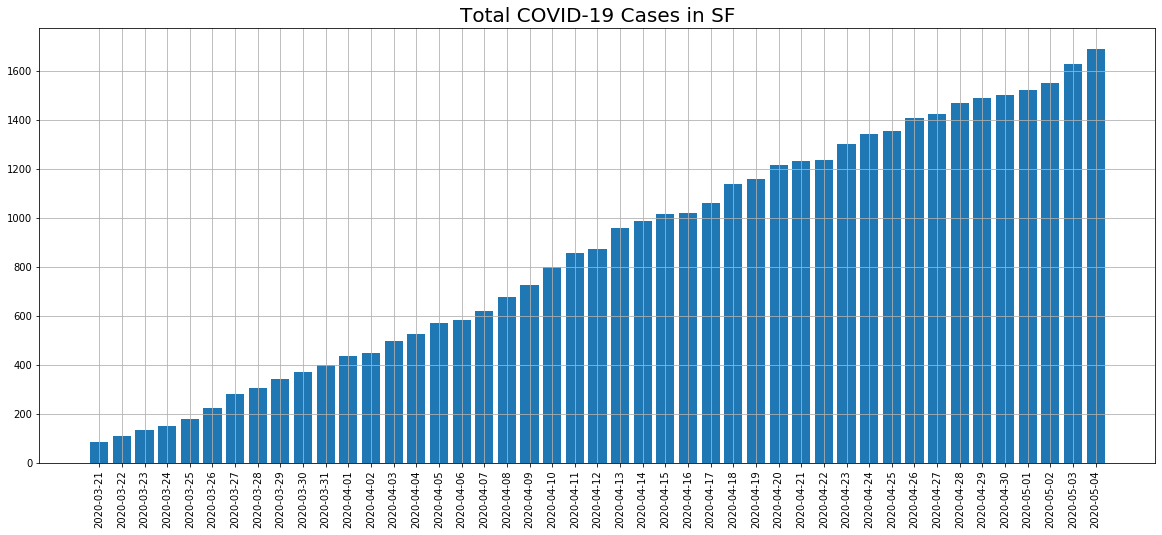

In [202]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total COVID-19 Cases in SF', fontsize = '20')
plt.bar(covid_st_CA_SF_summ.index, covid_st_CA_SF_summ.cases)

# y_ticks = np.linspace(0,1400,15)
plt.xticks(covid_st_CA_SF_summ.index, fontsize = '10', rotation = 90);
# plt.yticks(y_ticks);

In [203]:
covid_CA_SF_pct = covid_st_CA_SF_summ.pct_change()
covid_CA_SF_pct.columns = ['cases_dailypctchange', 'deaths_dailypctchange']

In [204]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily Percent Change in Total COVID-19 Cases in SF', fontsize = '20')
plt.plot(covid_CA_SF_pct.index, covid_CA_SF_pct.cases_dailypctchange)

y_ticks = np.linspace(0,0.40,9)
plt.xticks(covid_CA_SF_pct.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [205]:
covid_st_CA_summ_pct = covid_st_CA_summ.pct_change()
covid_st_CA_summ_pct.columns = ['cases_dailypctchange', 'deaths_dailypctchange']

In [206]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily Percent Change in Total COVID-19 Cases in CA', fontsize = '20')
plt.plot(covid_st_CA_summ_pct.index, covid_st_CA_summ_pct.cases_dailypctchange)

y_ticks = np.linspace(0,0.30,7)
plt.xticks(covid_st_CA_summ_pct.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [207]:
covid_data_CA_LA = covid_data[covid_data['State_County'] == 
                              'California_Los Angeles County'][covid_data['date'] 
                                                               > '2020-03-10'][['date','cases','deaths']]

C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [208]:
covid_data_CA_LA.set_index('date', inplace=True)

In [209]:
covid_data_CA_LA_daily = covid_data_CA_LA.diff()
covid_data_CA_LA_daily.columns = ['newcases_daily', 'newdeaths_daily']

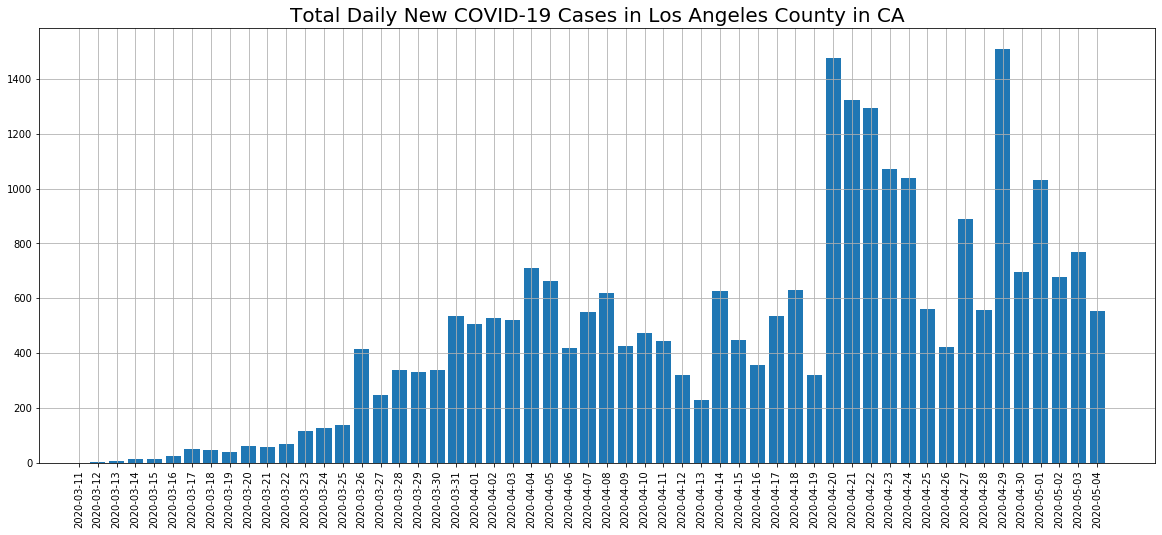

In [210]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total Daily New COVID-19 Cases in Los Angeles County in CA', fontsize = '20')
plt.bar(covid_data_CA_LA_daily.index, covid_data_CA_LA_daily.newcases_daily)

plt.xticks(covid_data_CA_LA_daily.index, fontsize = '10', rotation = 90);

In [211]:
covid_data_CA_LA_pct = covid_data_CA_LA.pct_change()
covid_data_CA_LA_pct.columns = ['cases_dailypctchange', 'deaths_dailypctchange']

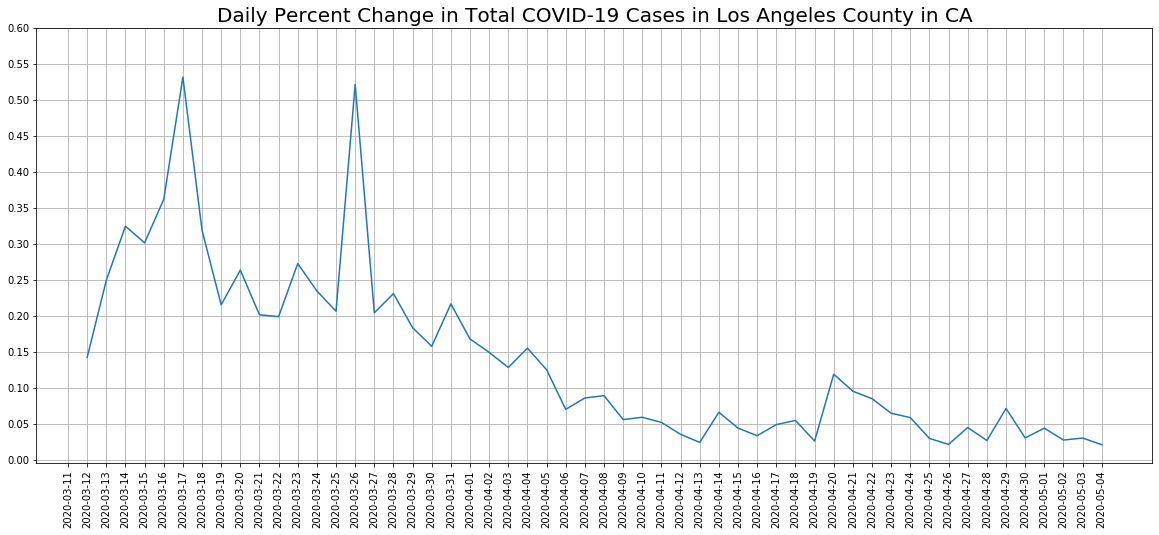

In [212]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily Percent Change in Total COVID-19 Cases in Los Angeles County in CA', fontsize = '20')
plt.plot(covid_data_CA_LA_pct.index, covid_data_CA_LA_pct.cases_dailypctchange)

y_ticks = np.linspace(0,0.60,13)
plt.xticks(covid_data_CA_LA_pct.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [213]:
covid_data_NY_Nassau = covid_data[covid_data['State_County'] 
                                  == 'New York_Nassau County'][covid_data['date'] 
                                                               > '2020-03-10'][['date', 'cases', 'deaths']]
covid_data_NY_Nassau.set_index('date', inplace=True)
covid_data_NY_Nassau.tail(10)

C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


cases  deaths
date                     
2020-04-25  33798    1917
2020-04-26  34522    1962
2020-04-27  34865    2003
2020-04-28  35085    2039
2020-04-29  35505    2077
2020-04-30  35854    2111
2020-05-01  36161    2140
2020-05-02  36519    2167
2020-05-03  36780    2194
2020-05-04  36965    2221

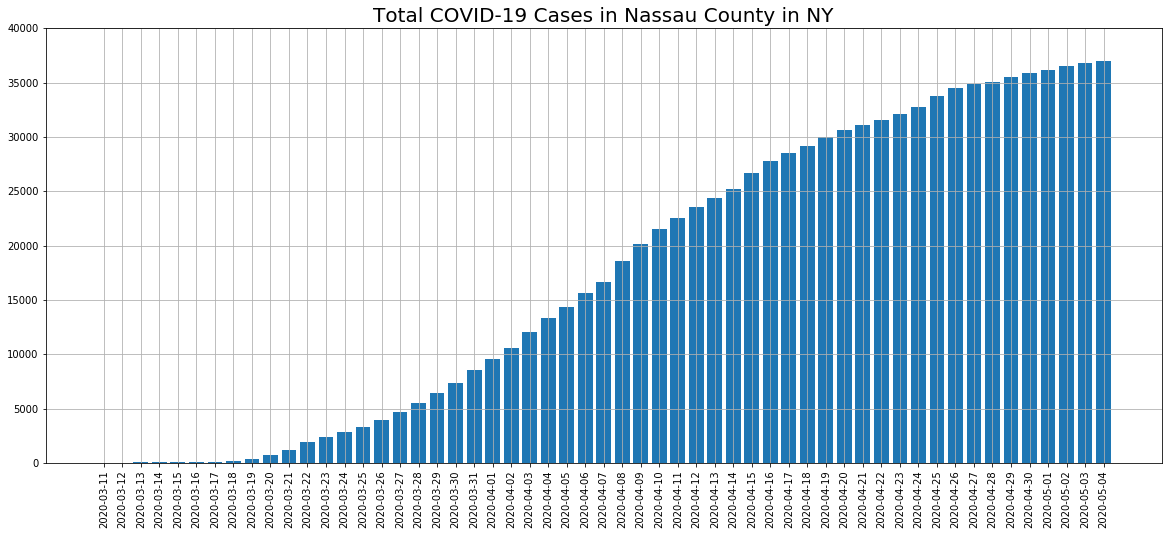

In [214]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total COVID-19 Cases in Nassau County in NY', fontsize = '20')
plt.bar(covid_data_NY_Nassau.index, covid_data_NY_Nassau.cases)

y_ticks = np.linspace(0,40000,9)
plt.xticks(covid_data_NY_Nassau.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

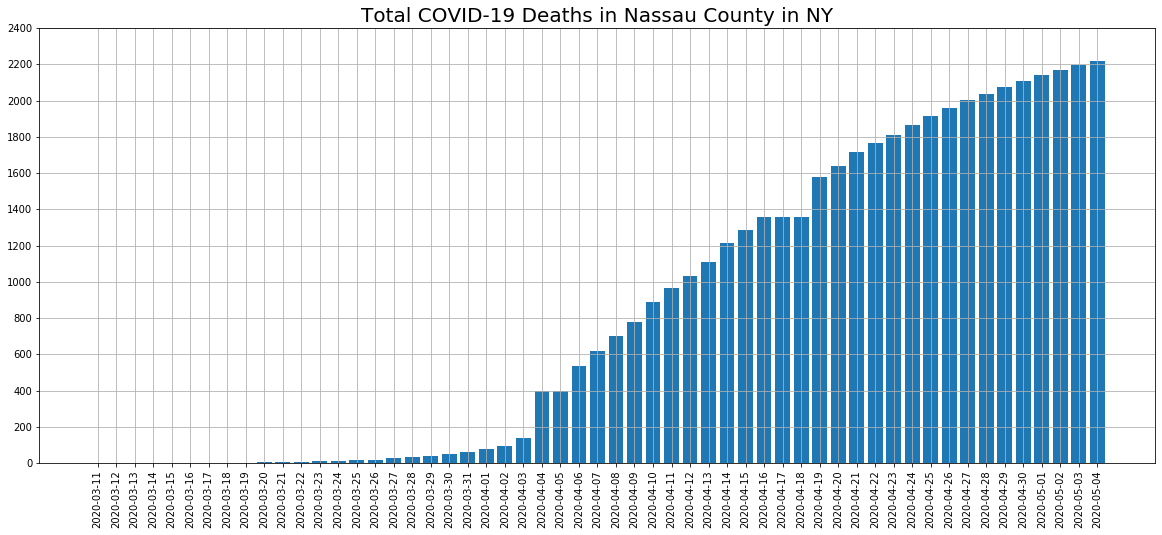

In [217]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total COVID-19 Deaths in Nassau County in NY', fontsize = '20')
plt.bar(covid_data_NY_Nassau.index, covid_data_NY_Nassau.deaths)

y_ticks = np.linspace(0,2400,13)
plt.xticks(covid_data_NY_Nassau.index, fontsize = '10', rotation = 90);
plt.yticks(y_ticks);

In [218]:
covid_data_NY_Nassau_daily = covid_data_NY_Nassau.diff()
covid_data_NY_Nassau_daily.columns = ['newcases_daily', 'newdeaths_daily']

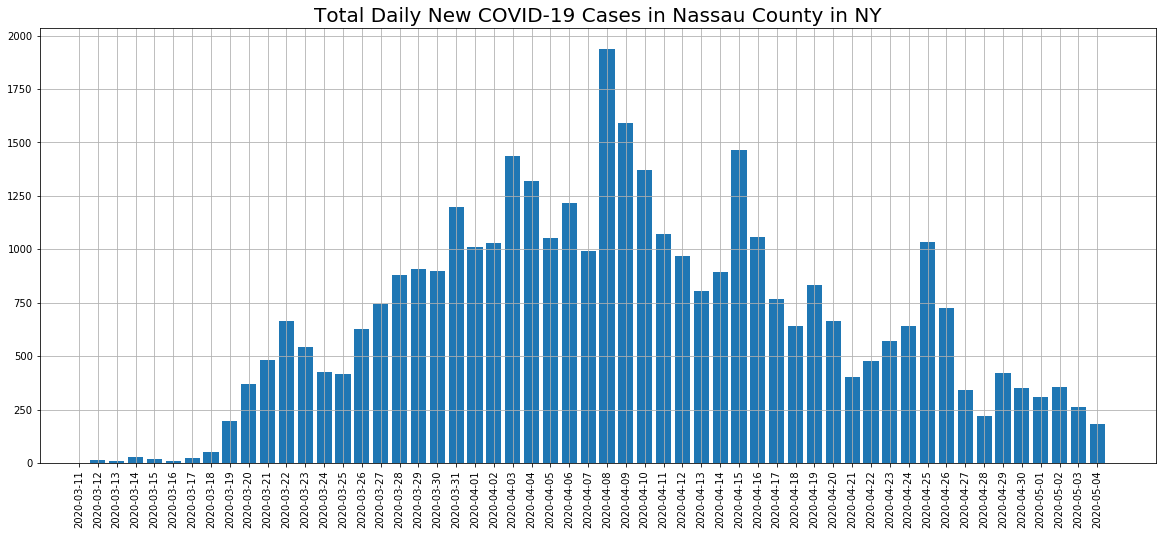

In [219]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total Daily New COVID-19 Cases in Nassau County in NY', fontsize = '20')
plt.bar(covid_data_NY_Nassau_daily.index, covid_data_NY_Nassau_daily.newcases_daily)

plt.xticks(covid_data_NY_Nassau_daily.index, fontsize = '10', rotation = 90);

In [220]:
covid_data_NY_Nassau_pct = covid_data_NY_Nassau.pct_change()
covid_data_NY_Nassau_pct.columns = ['cases_dailypctchange', 'deaths_dailypctchange']

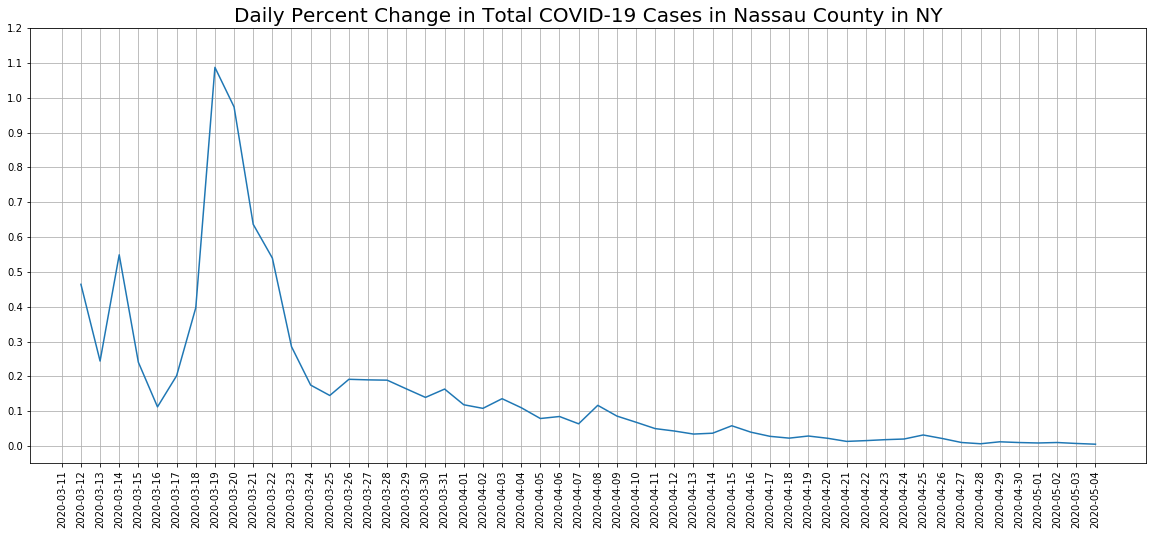

In [221]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily Percent Change in Total COVID-19 Cases in Nassau County in NY', fontsize = '20')
plt.plot(covid_data_NY_Nassau_pct.index, covid_data_NY_Nassau_pct.cases_dailypctchange)

y_ticks = np.linspace(0,1.2,13)
plt.xticks(covid_data_NY_Nassau_pct.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

## Latest COVID-19 Data Compare VS 2 Weeks Ago

In [529]:
covid_data_latest = covid_data[covid_data['date'] == covid_data.date.max()]

In [530]:
covid_data_top20_pop = covid_data_latest.sort_values(by='2019EstPop',ascending=False).head(20)

In [531]:
top_20_pop_counties = list(covid_data_top20_pop.State_County)

In [532]:
weeks = 2
num = 7*weeks
date_2wksago = covid_data_latest.date.max() - pd.DateOffset(num)

In [533]:
covid_data_2wksago = covid_data[covid_data['date'] == date_2wksago][['date','State_County', 'cases', 'deaths']]
covid_data_2wksago.reset_index(drop=True, inplace=True)
covid_data_2wksago.head()

date            State_County  cases  deaths
0 2020-04-20  Alabama_Autauga County     28       1
1 2020-04-20  Alabama_Baldwin County    117       3
2 2020-04-20  Alabama_Barbour County     22       0
3 2020-04-20     Alabama_Bibb County     32       0
4 2020-04-20   Alabama_Blount County     22       0

In [534]:
date_2wksago_str = date_2wksago.strftime('%Y%m%d')
date_2wksago_str

'20200420'

In [535]:
covid_data_2wksago.rename(columns={'cases':'cases_' + date_2wksago_str, 'deaths':'deaths_' + date_2wksago_str},inplace=True)
covid_data_2wksago.head()

date            State_County  cases_20200420  deaths_20200420
0 2020-04-20  Alabama_Autauga County              28                1
1 2020-04-20  Alabama_Baldwin County             117                3
2 2020-04-20  Alabama_Barbour County              22                0
3 2020-04-20     Alabama_Bibb County              32                0
4 2020-04-20   Alabama_Blount County              22                0

In [536]:
today = covid_data_latest.date.max()
today = today.strftime('%Y%m%d')
today

'20200504'

In [537]:
covid_data_today = covid_data_latest[['date', 'State_County', '2019EstPop', 'cases', 'deaths']]
covid_data_today.rename(columns={'cases':'cases_' + today, 'deaths':'deaths_' + today},inplace=True)
covid_data_today.reset_index(drop=True, inplace=True)
covid_data_today.head()

C:\Users\matty\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


date            State_County  2019EstPop  cases_20200504  \
0 2020-05-04  Alabama_Autauga County     55869.0              53   
1 2020-05-04  Alabama_Baldwin County    223234.0             188   
2 2020-05-04  Alabama_Barbour County     24686.0              45   
3 2020-05-04     Alabama_Bibb County     22394.0              42   
4 2020-05-04   Alabama_Blount County     57826.0              40   

   deaths_20200504  
0                3  
1                4  
2                1  
3                0  
4                0

In [538]:
covid_data_2wkcomp = pd.merge(covid_data_today, covid_data_2wksago, on = 'State_County', how = 'left')
covid_data_2wkcomp.drop(columns=['date_y'],inplace=True)
covid_data_2wkcomp.rename(columns = {'date_x':'date'},inplace=True)
covid_data_2wkcomp.replace(np.nan,0,inplace=True)

In [539]:
covid_data_2wkcomp.head()

date            State_County  2019EstPop  cases_20200504  \
0 2020-05-04  Alabama_Autauga County     55869.0              53   
1 2020-05-04  Alabama_Baldwin County    223234.0             188   
2 2020-05-04  Alabama_Barbour County     24686.0              45   
3 2020-05-04     Alabama_Bibb County     22394.0              42   
4 2020-05-04   Alabama_Blount County     57826.0              40   

   deaths_20200504  cases_20200420  deaths_20200420  
0                3            28.0              1.0  
1                4           117.0              3.0  
2                1            22.0              0.0  
3                0            32.0              0.0  
4                0            22.0              0.0

In [540]:
covid_data_2wkcomp['Change_Cases_2wks'] = covid_data_2wkcomp[covid_data_2wkcomp.columns[3]] - covid_data_2wkcomp[covid_data_2wkcomp.columns[5]]
covid_data_2wkcomp['Change_Deaths_2wks'] = covid_data_2wkcomp[covid_data_2wkcomp.columns[4]] - covid_data_2wkcomp[covid_data_2wkcomp.columns[6]]
covid_data_2wkcomp['Pct_Change_Cases_2wks'] = covid_data_2wkcomp[covid_data_2wkcomp.columns[3]] / covid_data_2wkcomp[covid_data_2wkcomp.columns[5]] - 1
covid_data_2wkcomp['Pct_Change_Deaths_2wks'] = covid_data_2wkcomp[covid_data_2wkcomp.columns[4]] / covid_data_2wkcomp[covid_data_2wkcomp.columns[6]] - 1

In [541]:
covid_data_2wkcomp.sort_values(by=list(covid_data_2wkcomp)[3], ascending=False).head(10)

date                      State_County  2019EstPop  cases_20200504  \
1707 2020-05-04            New York_New York City   8336817.0          175661   
575  2020-05-04              Illinois_Cook County   5150233.0           43715   
1706 2020-05-04            New York_Nassau County   1356924.0           36965   
1726 2020-05-04           New York_Suffolk County   1476601.0           35077   
1734 2020-05-04       New York_Westchester County    967506.0           30097   
187  2020-05-04     California_Los Angeles County  10039107.0           26217   
1238 2020-05-04             Michigan_Wayne County   1749343.0           17314   
1626 2020-05-04          New Jersey_Bergen County    932202.0           16282   
2114 2020-05-04  Pennsylvania_Philadelphia County   1584064.0           16040   
1633 2020-05-04          New Jersey_Hudson County    672391.0           15881   

      deaths_20200504  cases_20200420  deaths_20200420  Change_Cases_2wks  \
1707            13207        136816.0          10009.0            38845.0   
575              1802         22101.0            915.0            21614.0   
1706             2221         30677.0           1638.0             6288.0   
1726             1325         27662.0            887.0             7415.0   
1734             1220         24306.0            867.0             5791.0   
187              1256         13816.0            617.0            12401.0   
1238             1924         13912.0           1148.0             3402.0   
1626             1215         13011.0            787.0             3271.0   
2114              726          9553.0            370.0             6487.0   
1633              845         11150.0            492.0             4731.0   

      Change_Deaths_2wks  Pct_Change_Cases_2wks  Pct_Change_Deaths_2wks  
1707              3198.0               0.283921                0.319512  
575                887.0               0.977965                0.969399  
1706               583.0               0.204974                0.355922  
1726               438.0               0.268057                0.493799  
1734               353.0               0.238254                0.407151  
187                639.0               0.897583                1.035656  
1238               776.0               0.244537                0.675958  
1626               428.0               0.251403                0.543837  
2114               356.0               0.679054                0.962162  
1633               353.0               0.424305                0.717480

In [542]:
covid_data_2wkcomp.replace(np.inf, np.nan, inplace=True)

In [543]:
covid_data_2wkcomp = covid_data_2wkcomp[~covid_data_2wkcomp['Pct_Change_Cases_2wks'].isnull()]

In [544]:
covid_data_2wkcomp = covid_data_2wkcomp.sort_values(by='Pct_Change_Cases_2wks', ascending=False)
covid_data_2wkcomp.reset_index(drop=True, inplace=True)

In [545]:
# covid_data_2wkcomp['Pct_Change_Cases_2wks'] = covid_data_2wkcomp['Pct_Change_Cases_2wks'].map("{:.2%}".format)
# covid_data_2wkcomp['Pct_Change_Deaths_2wks'] = covid_data_2wkcomp['Pct_Change_Deaths_2wks'].map("{:.2%}".format)

In [546]:
covid_CT_Hartford = covid_data[covid_data.State_County == 'Connecticut_Hartford County'][['date', 'cases', 'deaths']]
covid_CT_Hartford.set_index('date', inplace=True)

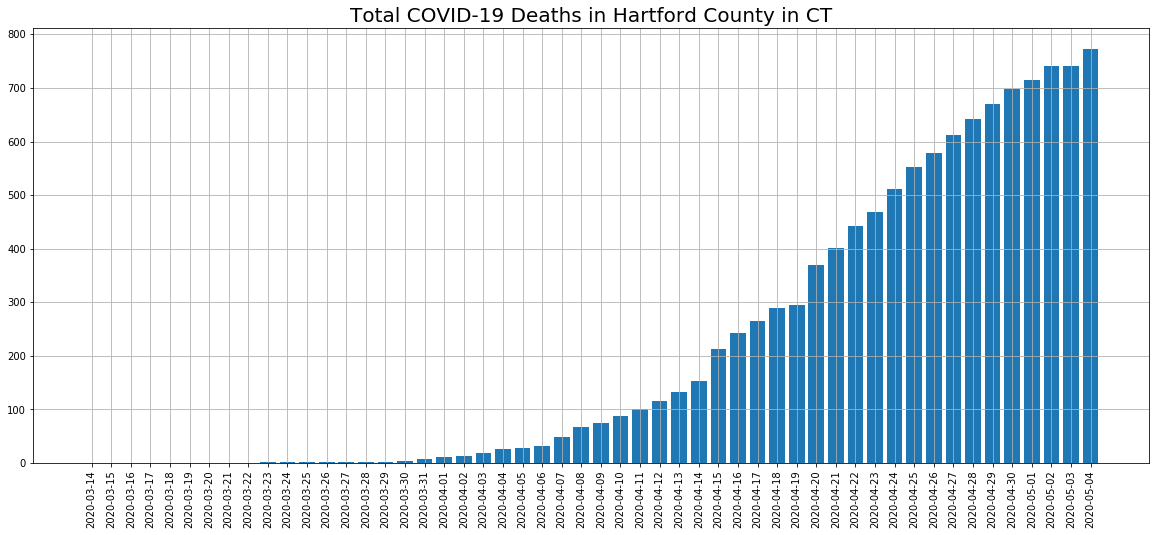

In [547]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total COVID-19 Deaths in Hartford County in CT', fontsize = '20')
plt.bar(covid_CT_Hartford.index, covid_CT_Hartford.deaths)

plt.xticks(covid_CT_Hartford.index, fontsize = '10', rotation = 90);

In [548]:
covid_CT_Hartford_daily = covid_CT_Hartford.diff()
covid_CT_Hartford_daily.columns = ['newcases_daily', 'newdeaths_daily']

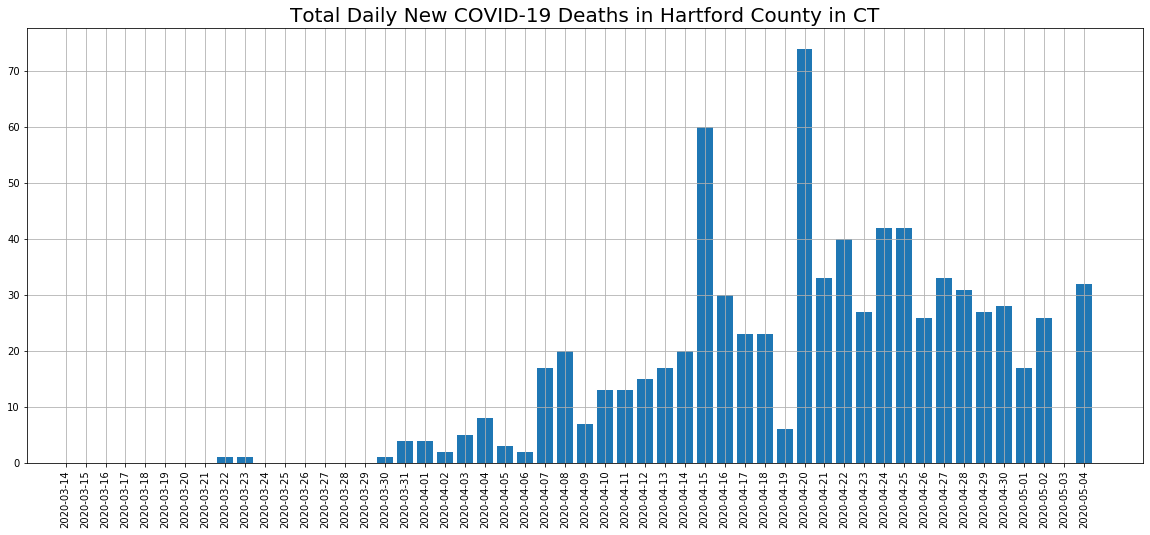

In [549]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total Daily New COVID-19 Deaths in Hartford County in CT', fontsize = '20')
plt.bar(covid_CT_Hartford_daily.index, covid_CT_Hartford_daily.newdeaths_daily)

plt.xticks(covid_CT_Hartford_daily.index, fontsize = '10', rotation = 90);

In [550]:
covid_data_2wkcomp[covid_data_2wkcomp[covid_data_2wkcomp.columns[6]] >= 50].sort_values(by=covid_data_2wkcomp.columns[len(covid_data_2wkcomp.columns)-1], ascending=False)

date                               State_County  2019EstPop  \
491  2020-05-04                  Minnesota_Hennepin County   1265843.0   
475  2020-05-04                    Virginia_Fairfax County   1147532.0   
617  2020-05-04                 Maryland_Montgomery County   1050688.0   
616  2020-05-04             Massachusetts_Worcester County    830622.0   
579  2020-05-04            Maryland_Prince George's County    909327.0   
984  2020-05-04                  Pennsylvania_Bucks County    628270.0   
1050 2020-05-04               Pennsylvania_Delaware County    566747.0   
823  2020-05-04              Massachusetts_Plymouth County    521202.0   
1012 2020-05-04             Massachusetts_Middlesex County   1611699.0   
940  2020-05-04  District of Columbia_District of Columbia    705749.0   
835  2020-05-04               New Jersey_Burlington County    445349.0   
1165 2020-05-04                  New Jersey_Passaic County    501826.0   
513  2020-05-04               Massachusetts_Bristol County    565217.0   
856  2020-05-04                 Massachusetts_Essex County    789034.0   
1045 2020-05-04               Massachusetts_Suffolk County    803907.0   
894  2020-05-04                    Arizona_Maricopa County   4485414.0   
1285 2020-05-04                       Ohio_Cuyahoga County   1235072.0   
995  2020-05-04                   Colorado_Arapahoe County    656590.0   
562  2020-05-04                     Illinois_DuPage County    922921.0   
1391 2020-05-04                  Missouri_St. Louis County    994205.0   
1275 2020-05-04                California_Riverside County   2470546.0   
1132 2020-05-04               Massachusetts_Norfolk County    706775.0   
1591 2020-05-04          Louisiana_East Baton Rouge Parish    440059.0   
937  2020-05-04                   New Jersey_Mercer County    367430.0   
1129 2020-05-04                Connecticut_Hartford County    891720.0   
947  2020-05-04                California_San Diego County   3338330.0   
1277 2020-05-04             Pennsylvania_Montgomery County    830915.0   
810  2020-05-04              California_Los Angeles County  10039107.0   
1491 2020-05-04                    New Jersey_Ocean County    607186.0   
890  2020-05-04                   New Jersey_Camden County    506471.0   
...         ...                                        ...         ...   
1436 2020-05-04                  Florida_Palm Beach County   1496770.0   
1820 2020-05-04                     Michigan_Macomb County    873972.0   
1291 2020-05-04                  Pennsylvania_Berks County    421164.0   
2025 2020-05-04                    Michigan_Oakland County   1257584.0   
1892 2020-05-04               Louisiana_St. Tammany Parish    260419.0   
1878 2020-05-04                     Louisiana_Caddo Parish    240204.0   
1625 2020-05-04                   New York_Dutchess County    294218.0   
1921 2020-05-04                   New Jersey_Bergen County    932202.0   
1495 2020-05-04                        Arizona_Pima County   1047279.0   
1627 2020-05-04                    Colorado_El Paso County    720403.0   
1096 2020-05-04                  Kentucky_Jefferson County    766757.0   
1589 2020-05-04                     New York_Orange County    384940.0   
1028 2020-05-04                       Colorado_Weld County    324492.0   
1893 2020-05-04                    New York_Suffolk County   1476601.0   
1131 2020-05-04                    Virginia_Henrico County    330818.0   
1305 2020-05-04                 Wisconsin_Milwaukee County    945726.0   
1298 2020-05-04                     New York_Monroe County    741770.0   
1978 2020-05-04                New York_Westchester County    967506.0   
2132 2020-05-04              California_Santa Clara County   1927852.0   
2038 2020-05-04                     New York_Nassau County   1356924.0   
2161 2020-05-04      Louisiana_St. John the Baptist Parish     42837.0   
1870 2020-05-04                   New York_Rockland County    325789.0   
1858 2020-05-04

In [551]:
covid_data_2wkcomp[covid_data_2wkcomp.State_County.str.contains('Illinois')].sort_values(by
                                                                =covid_data_2wkcomp.columns[3], ascending=False)

date                 State_County  2019EstPop  cases_20200504  \
745  2020-05-04         Illinois_Cook County   5150233.0           43715   
787  2020-05-04         Illinois_Lake County    696535.0            4252   
562  2020-05-04       Illinois_DuPage County    922921.0            3803   
887  2020-05-04         Illinois_Will County    690743.0            3066   
234  2020-05-04         Illinois_Kane County    532403.0            2115   
528  2020-05-04      Illinois_McHenry County    307774.0             790   
241  2020-05-04    Illinois_Winnebago County    282572.0             638   
739  2020-05-04    Illinois_St. Clair County    259686.0             551   
570  2020-05-04  Illinois_Rock Island County    141879.0             452   
1611 2020-05-04     Illinois_Kankakee County    109862.0             383   
742  2020-05-04      Illinois_Madison County    262966.0             365   
489  2020-05-04      Illinois_Kendall County    128990.0             326   
569  2020-05-04      Illinois_Unknown County         0.0             277   
235  2020-05-04     Illinois_Sangamon County    194672.0             212   
261  2020-05-04     Illinois_Randolph County     31782.0             182   
791  2020-05-04    Illinois_Champaign County    209689.0             182   
150  2020-05-04        Illinois_Boone County     53544.0             144   
255  2020-05-04      Illinois_Jackson County     56750.0             140   
523  2020-05-04         Illinois_Ogle County     50643.0             132   
488  2020-05-04       Illinois_DeKalb County    104897.0             130   
526  2020-05-04        Illinois_Macon County    104009.0             124   
412  2020-05-04      Illinois_Clinton County     37562.0             114   
452  2020-05-04       Illinois_Peoria County    179179.0             107   
2069 2020-05-04       Illinois_McLean County    171517.0             103   
536  2020-05-04    Illinois_Whiteside County     55175.0              92   
360  2020-05-04    Illinois_Jefferson County     37684.0              87   
102  2020-05-04       Illinois_Warren County     16844.0              85   
1660 2020-05-04       Illinois_Monroe County     34637.0              73   
96   2020-05-04   Illinois_Stephenson County     44498.0              71   
493  2020-05-04      Illinois_LaSalle County    108669.0              70   
...         ...                          ...         ...             ...   
1348 2020-05-04         Illinois_Ford County     12961.0               9   
732  2020-05-04     Illinois_Crawford County     18667.0               8   
957  2020-05-04        Illinois_Logan County     28618.0               7   
2656 2020-05-04        Illinois_Piatt County     16344.0               7   
1355 2020-05-04         Illinois_Bond County     16426.0               6   
436  2020-05-04     Illinois_Moultrie County     14501.0               5   
1942 2020-05-04    Illinois_Effingham County     34008.0               5   
1947 2020-05-04        Illinois_Clark County     15441.0               5   
629  2020-05-04    Illinois_Alexander County      5761.0               4   
637  2020-05-04     Illinois_Lawrence County     15678.0               4   
2662 2020-05-04     Illinois_Marshall County     11438.0               4   
181  2020-05-04       Illinois_Fulton County     34340.0               4   
1731 2020-05-04       Illinois_Massac County     13772.0               4   
1734 2020-05-04       Illinois_Saline County     23491.0               4   
718  2020-05-04      Illinois_Johnson County     12417.0               4   
729  2020-05-04   Illinois_Cumberland County     10766.0               4   
709  2020-05-04    Illinois_Henderson County      6646.0               4   
1335 2020-05-04     Illinois_Richland County     15513.0               3   
1389 2020-05-04      Illinois_De Witt County     15638.0               3   
291  2020-05-04       Illinois_Greene County     12969.0               3   
736  2020-05-04         Illinois_Clay County     13184.0   

In [552]:
# filter for counties that had at least 15 cases 2 weeks ago
covid_data_2wkcomp_top10 = covid_data_2wkcomp[covid_data_2wkcomp[covid_data_2wkcomp.columns[5]] >= 15].head(10)
covid_data_2wkcomp_top10

date                State_County  2019EstPop  cases_20200504  \
1  2020-05-04  Tennessee_Trousdale County     11284.0            1348   
4  2020-05-04    Minnesota_Stearns County    161075.0             728   
12 2020-05-04        Iowa_Woodbury County    103107.0            1152   
20 2020-05-04      Nebraska_Dakota County     20026.0            1005   
23 2020-05-04         Indiana_Cass County     37689.0            1371   
28 2020-05-04        Kansas_Finney County     36467.0             586   
35 2020-05-04     Minnesota_Nobles County     21629.0            1011   
36 2020-05-04       Colorado_Logan County     22409.0             290   
43 2020-05-04       Oklahoma_Texas County     19983.0             236   
44 2020-05-04          Iowa_Dallas County     93453.0             578   

    deaths_20200504  cases_20200420  deaths_20200420  Change_Cases_2wks  \
1                 1            22.0              1.0             1326.0   
4                 2            17.0              0.0              711.0   
12                2            44.0              0.0             1108.0   
20                2            51.0              0.0              954.0   
23                2            87.0              1.0             1284.0   
28                3            41.0              1.0              545.0   
35                1            76.0              0.0              935.0   
36                1            22.0              1.0              268.0   
43                2            20.0              1.0              216.0   
44                1            52.0              0.0              526.0   

    Change_Deaths_2wks  Pct_Change_Cases_2wks  Pct_Change_Deaths_2wks  
1                  0.0              60.272727                     0.0  
4                  2.0              41.823529                     NaN  
12                 2.0              25.181818                     NaN  
20                 2.0              18.705882                     NaN  
23                 1.0              14.758621                     1.0  
28                 2.0              13.292683                     2.0  
35                 1.0              12.302632                     NaN  
36                 0.0              12.181818                     0.0  
43                 1.0              10.800000                     1.0  
44                 1.0              10.115385                     NaN

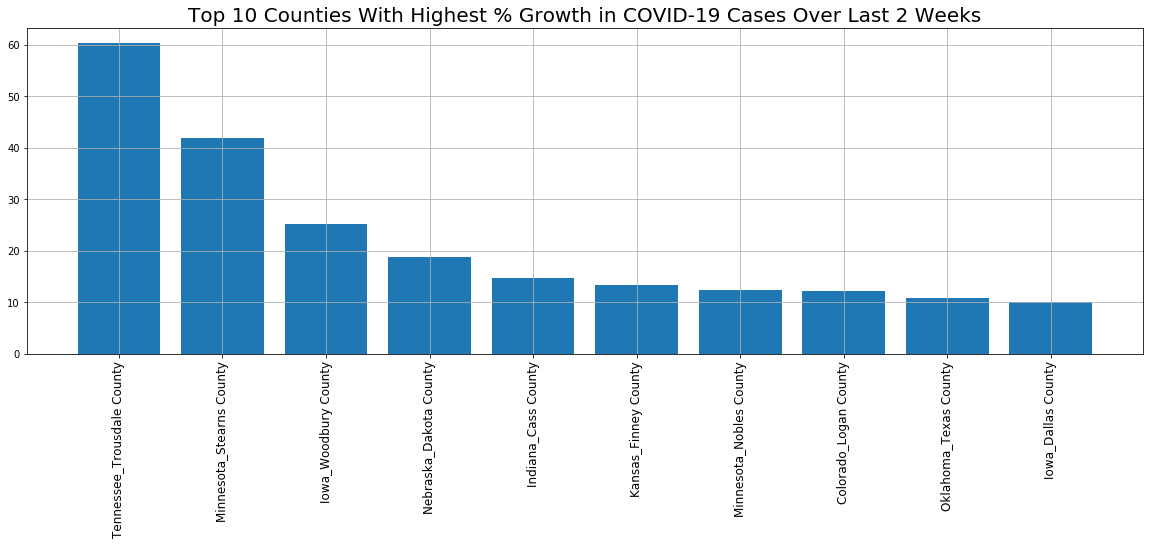

In [553]:
plt.figure(figsize=[20,6])
plt.grid()
plt.title('Top 10 Counties With Highest % Growth in COVID-19 Cases Over Last 2 Weeks', fontsize = '20')
plt.bar(covid_data_2wkcomp_top10.State_County, covid_data_2wkcomp_top10.Pct_Change_Cases_2wks)

# y_ticks = np.linspace(0,45,10)
plt.xticks(covid_data_2wkcomp_top10.State_County, fontsize = '12', rotation = 90);
# plt.yticks(y_ticks);

In [557]:
covid_data[covid_data['county'] == 'Trousdale County']

date            county      state     FIPS  cases  deaths  \
93411 2020-03-28  Trousdale County  Tennessee  47169.0      1       0   
93412 2020-03-29  Trousdale County  Tennessee  47169.0      1       0   
93413 2020-03-30  Trousdale County  Tennessee  47169.0      3       0   
93414 2020-03-31  Trousdale County  Tennessee  47169.0      3       0   
93415 2020-04-01  Trousdale County  Tennessee  47169.0      5       1   
93416 2020-04-02  Trousdale County  Tennessee  47169.0      6       1   
93417 2020-04-03  Trousdale County  Tennessee  47169.0      7       1   
93418 2020-04-04  Trousdale County  Tennessee  47169.0      7       1   
93419 2020-04-05  Trousdale County  Tennessee  47169.0      8       1   
93420 2020-04-06  Trousdale County  Tennessee  47169.0     11       1   
93421 2020-04-07  Trousdale County  Tennessee  47169.0     14       1   
93422 2020-04-08  Trousdale County  Tennessee  47169.0     14       1   
93423 2020-04-09  Trousdale County  Tennessee  47169.0     14       1   
93424 2020-04-10  Trousdale County  Tennessee  47169.0     14       1   
93425 2020-04-11  Trousdale County  Tennessee  47169.0     17       1   
93426 2020-04-12  Trousdale County  Tennessee  47169.0     17       1   
93427 2020-04-13  Trousdale County  Tennessee  47169.0     20       1   
93428 2020-04-14  Trousdale County  Tennessee  47169.0     20       1   
93429 2020-04-15  Trousdale County  Tennessee  47169.0     20       1   
93430 2020-04-16  Trousdale County  Tennessee  47169.0     20       1   
93431 2020-04-17  Trousdale County  Tennessee  47169.0     20       1   
93432 2020-04-18  Trousdale County  Tennessee  47169.0     20       1   
93433 2020-04-19  Trousdale County  Tennessee  47169.0     22       1   
93434 2020-04-20  Trousdale County  Tennessee  47169.0     22       1   
93435 2020-04-21  Trousdale County  Tennessee  47169.0     23       1   
93436 2020-04-22  Trousdale County  Tennessee  47169.0     27       1   
93437 2020-04-23  Trousdale County  Tennessee  47169.0     27       1   
93438 2020-04-24  Trousdale County  Tennessee  47169.0     29       1   
93439 2020-04-25  Trousdale County  Tennessee  47169.0     47       1   
93440 2020-04-26  Trousdale County  Tennessee  47169.0     48       1   
93441 2020-04-27  Trousdale County  Tennessee  47169.0     48       1   
93442 2020-04-28  Trousdale County  Tennessee  47169.0     50       1   
93443 2020-04-29  Trousdale County  Tennessee  47169.0    122       1   
93444 2020-04-30  Trousdale County  Tennessee  47169.0    123       1   
93445 2020-05-01  Trousdale County  Tennessee  47169.0   1020       1   
93446 2020-05-02  Trousdale County  Tennessee  47169.0   1344       1   
93447 2020-05-03  Trousdale County  Tennessee  47169.0   1346       1   
93448 2020-05-04  Trousdale County  Tennessee  47169.0   1348       1   

       MedianHHInc_2018                State_County  2019EstPop  \
93411           49280.0  Tennessee_Trousdale County     11284.0   
93412           49280.0  Tennessee_Trousdale County     11284.0   
93413           49280.0  Tennessee_Trousdale County     11284.0   
93414           49280.0  Tennessee_Trousdale County     11284.0   
93415           49280.0  Tennessee_Trousdale County     11284.0   
93416           49280.0  Tennessee_Trousdale County     11284.0   
93417           49280.0  Tennessee_Trousdale County     11284.0   
93418           49280.0  Tennessee_Trousdale County     11284.0   
93419           49280.0  Tennessee_Trousdale County     11284.0   
93420           49280.0  Tennessee_Trousdale County     11284.0   
93421           49280.0  Tennessee_Trousdale County     11284.0   
93422           49280.0  Tennessee_Trousdale County     11284.0   
93423           49280.0  Tennessee_Trousdale County     11284.0   
93424           49280.0  Tennessee_Trousdale County     11284.0   
93425           49280.0  Tennessee_Trousdale County     11284.0   
93426           49280.0  Tennessee_Trousdale County     11284.0   
93427           49280.0  

In [563]:
covid_TN_Trousdale = covid_data[covid_data['county'] == 'Trousdale County'][['date', 'cases', 'deaths']]
covid_TN_Trousdale.set_index('date', inplace=True)

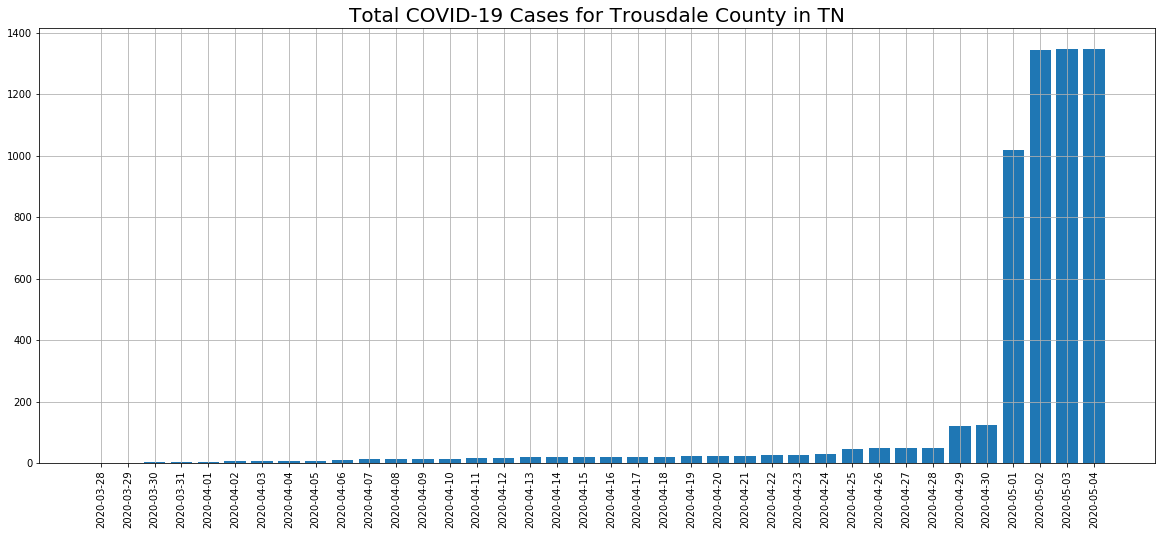

In [565]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total COVID-19 Cases for Trousdale County in TN', fontsize = '20')
plt.bar(covid_TN_Trousdale.index, covid_TN_Trousdale.cases)

# y_ticks = np.linspace(0,1400,8)
plt.xticks(covid_TN_Trousdale.index, fontsize = '10', rotation = 90);
# plt.yticks(y_ticks, fontsize = '10');

In [554]:
covid_OH_Marion = covid_data[covid_data.State_County == 'Ohio_Marion County'][['date', 'cases', 'deaths']]
covid_OH_Marion.set_index('date', inplace=True)
covid_OH_Marion = covid_OH_Marion[covid_OH_Marion.index > '2020-04-03']

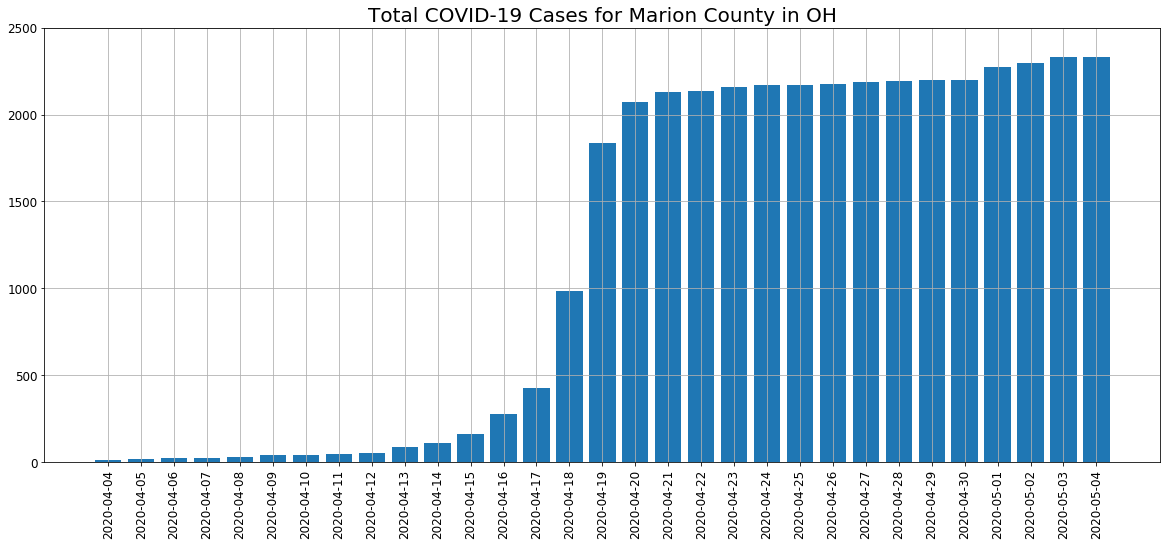

In [256]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total COVID-19 Cases for Marion County in OH', fontsize = '20')
plt.bar(covid_OH_Marion.index, covid_OH_Marion.cases)

y_ticks = np.linspace(0,2500,6)
plt.xticks(covid_OH_Marion.index, fontsize = '12', rotation = 90)
plt.yticks(y_ticks, fontsize = '12');

In [257]:
covid_data_2wkcomp_MI = covid_data_2wkcomp[covid_data_2wkcomp.State_County.str.contains('Michigan')]
covid_data_2wkcomp_MI.sort_values(by='cases_'+today, ascending=False)

date                  State_County  2019EstPop  cases_20200504  \
1968 2020-05-04         Michigan_Wayne County   1749343.0           17314   
2025 2020-05-04       Michigan_Oakland County   1257584.0            7499   
1820 2020-05-04        Michigan_Macomb County    873972.0            5736   
274  2020-05-04       Michigan_Unknown County         0.0            1976   
230  2020-05-04          Michigan_Kent County    656955.0            1854   
1792 2020-05-04       Michigan_Genesee County    405813.0            1647   
1884 2020-05-04     Michigan_Washtenaw County    367601.0            1118   
982  2020-05-04       Michigan_Saginaw County    190539.0             728   
1133 2020-05-04        Michigan_Ingham County    292406.0             506   
397  2020-05-04     Michigan_Kalamazoo County    265066.0             480   
1570 2020-05-04       Michigan_Jackson County    158510.0             363   
1980 2020-05-04    Michigan_Livingston County    191995.0             356   
1675 2020-05-04     Michigan_St. Clair County    159128.0             339   
1654 2020-05-04        Michigan_Monroe County    150500.0             320   
588  2020-05-04      Michigan_Muskegon County    173566.0             313   
850  2020-05-04       Michigan_Berrien County    153401.0             304   
490  2020-05-04        Michigan_Ottawa County    291830.0             281   
1093 2020-05-04       Michigan_Calhoun County    134159.0             244   
1020 2020-05-04    Michigan_Shiawassee County     68122.0             185   
2114 2020-05-04        Michigan_Lapeer County     87607.0             171   
813  2020-05-04           Michigan_Bay County    103126.0             161   
1281 2020-05-04         Michigan_Eaton County    110268.0             137   
1446 2020-05-04     Michigan_Hillsdale County     45605.0             131   
2187 2020-05-04       Michigan_Clinton County     79595.0             119   
352  2020-05-04       Michigan_Allegan County    118081.0             116   
918  2020-05-04       Michigan_Tuscola County     52245.0             113   
1024 2020-05-04       Michigan_Lenawee County     98451.0             110   
1830 2020-05-04        Michigan_Otsego County     24668.0              93   
193  2020-05-04         Michigan_Ionia County     64697.0              90   
105  2020-05-04        Michigan_Alpena County     28405.0              83   
...         ...                           ...         ...             ...   
1098 2020-05-04     Michigan_Roscommon County     24019.0              18   
2687 2020-05-04      Michigan_Kalkaska County     18038.0              17   
253  2020-05-04     Michigan_Missaukee County     15118.0              16   
445  2020-05-04        Michigan_Ogemaw County     20997.0              15   
2313 2020-05-04       Michigan_Mecosta County     43453.0              14   
1223 2020-05-04       Michigan_Gladwin County     25449.0              14   
2680 2020-05-04         Michigan_Delta County     35784.0              13   
2298 2020-05-04    Michigan_Charlevoix County     26143.0              13   
287  2020-05-04         Michigan_Mason County     29144.0              12   
2695 2020-05-04      Michigan_Manistee County     24558.0              11   
107  2020-05-04  Michigan_Presque Isle County     12592.0              11   
2006 2020-05-04         Michigan_Clare County     30950.0              11   
2253 2020-05-04        Michigan_Antrim County     23324.0              10   
1837 2020-05-04       Michigan_Wexford County     33631.0               9   
1849 2020-05-04      Michigan_Leelanau County     21761.0               9   
2203 2020-05-04       Michigan_Osceola County     23460.0               8   
84   2020-05-04     Michigan_Menominee County     22780.0               6   
1334 2020-05-04      Michigan_Mackinac County     10799.0               6   
1958 2020-05-04       Michigan_Gogebic County     13975.0               5   
1957 2020-05-04   Michigan_Montmorency County      9328.0               5   
1955 20

In [258]:
covid_data_2wkcomp_top20 = covid_data_2wkcomp[covid_data_2wkcomp.State_County.isin(top_20_pop_counties)][['State_County', '2019EstPop', 'cases_' + today, 'cases_' + date_2wksago_str, 'Pct_Change_Cases_2wks']]
covid_data_2wkcomp_top20 = covid_data_2wkcomp_top20.sort_values(by='2019EstPop', ascending=False)
covid_data_2wkcomp_top20.reset_index(drop=True, inplace=True)
covid_data_2wkcomp_top20

State_County  2019EstPop  cases_20200504  \
0      California_Los Angeles County  10039107.0           26217   
1             New York_New York City   8336817.0          175661   
2               Illinois_Cook County   5150233.0           43715   
3                Texas_Harris County   4713325.0            6967   
4            Arizona_Maricopa County   4485414.0            4751   
5        California_San Diego County   3338330.0            4083   
6           California_Orange County   3175692.0            2859   
7          Florida_Miami-Dade County   2716940.0           13091   
8                Texas_Dallas County   2635516.0            4370   
9        California_Riverside County   2470546.0            4354   
10               Nevada_Clark County   2266715.0            4411   
11            Washington_King County   2252782.0            6584   
12  California_San Bernardino County   2180085.0            2182   
13              Texas_Tarrant County   2102515.0            2624   
14                Texas_Bexar County   2003554.0            1664   
15            Florida_Broward County   1952778.0            5383   
16     California_Santa Clara County   1927852.0            2244   
17             Michigan_Wayne County   1749343.0           17314   
18         California_Alameda County   1671329.0            1797   
19    Massachusetts_Middlesex County   1611699.0           15757   

    cases_20200420  Pct_Change_Cases_2wks  
0          13816.0               0.897583  
1         136816.0               0.283921  
2          22101.0               0.977965  
3           4977.0               0.399839  
4           2636.0               0.802352  
5           2325.0               0.756129  
6           1676.0               0.705847  
7           9656.0               0.355737  
8           2512.0               0.739650  
9           2847.0               0.529329  
10          2998.0               0.471314  
11          5295.0               0.243437  
12          1406.0               0.551920  
13          1249.0               1.100881  
14          1040.0               0.600000  
15          4078.0               0.320010  
16          1922.0               0.167534  
17         13912.0               0.244537  
18          1212.0               0.482673  
19          9253.0               0.702907

In [259]:
covid_data_2wkcomp_top20.describe()

2019EstPop  cases_20200504  cases_20200420  Pct_Change_Cases_2wks
count  2.000000e+01       20.000000       20.000000              20.000000
mean   3.339029e+06    17301.400000    12086.350000               0.566678
std    2.261877e+06    38686.496491    29882.702823               0.263866
min    1.611699e+06     1664.000000     1040.000000               0.167534
25%    1.990860e+06     2800.250000     1860.500000               0.346805
50%    2.368630e+06     4581.000000     2922.500000               0.540625
75%    3.625101e+06    13757.500000     9353.750000               0.743770
max    1.003911e+07   175661.000000   136816.000000               1.100881

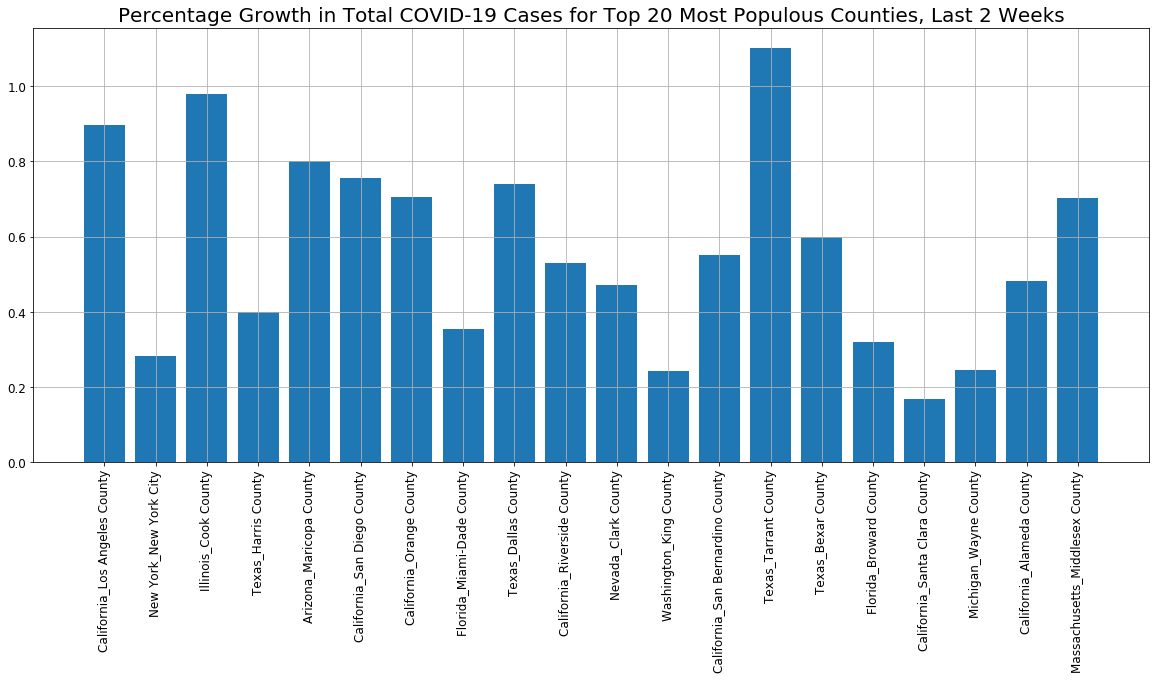

In [264]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Percentage Growth in Total COVID-19 Cases for Top 20 Most Populous Counties, Last 2 Weeks', fontsize = '20')
plt.bar(covid_data_2wkcomp_top20.State_County, covid_data_2wkcomp_top20.Pct_Change_Cases_2wks)

plt.xticks(covid_data_2wkcomp_top20.index, fontsize = '12', rotation = 90)
plt.rc('ytick', labelsize='14');

In [265]:
top20counties_cases_latest = list(covid_data_latest[~covid_data_latest.county.isin(['Unknown County'])].sort_values(by='cases', ascending=False).head(20)['State_County'])
top20counties_cases_latest

['New York_New York City',
 'Illinois_Cook County',
 'New York_Nassau County',
 'New York_Suffolk County',
 'New York_Westchester County',
 'California_Los Angeles County',
 'Michigan_Wayne County',
 'New Jersey_Bergen County',
 'Pennsylvania_Philadelphia County',
 'New Jersey_Hudson County',
 'Massachusetts_Middlesex County',
 'New Jersey_Essex County',
 'Massachusetts_Suffolk County',
 'New Jersey_Passaic County',
 'New Jersey_Union County',
 'Florida_Miami-Dade County',
 'New Jersey_Middlesex County',
 'Connecticut_Fairfield County',
 'New York_Rockland County',
 'Massachusetts_Essex County']

In [266]:
covid_data_2wkcomp_top20_cases = covid_data_2wkcomp[covid_data_2wkcomp.State_County.isin(top20counties_cases_latest)][['State_County', '2019EstPop', 'cases_' + today, 'cases_' + date_2wksago_str, 'Pct_Change_Cases_2wks']]
covid_data_2wkcomp_top20_cases = covid_data_2wkcomp_top20_cases.sort_values(by='cases_' + today, ascending=False)
covid_data_2wkcomp_top20_cases.reset_index(drop=True, inplace=True)
covid_data_2wkcomp_top20_cases

State_County  2019EstPop  cases_20200504  \
0             New York_New York City   8336817.0          175661   
1               Illinois_Cook County   5150233.0           43715   
2             New York_Nassau County   1356924.0           36965   
3            New York_Suffolk County   1476601.0           35077   
4        New York_Westchester County    967506.0           30097   
5      California_Los Angeles County  10039107.0           26217   
6              Michigan_Wayne County   1749343.0           17314   
7           New Jersey_Bergen County    932202.0           16282   
8   Pennsylvania_Philadelphia County   1584064.0           16040   
9           New Jersey_Hudson County    672391.0           15881   
10    Massachusetts_Middlesex County   1611699.0           15757   
11           New Jersey_Essex County    798975.0           14621   
12      Massachusetts_Suffolk County    803907.0           13941   
13         New Jersey_Passaic County    501826.0           13496   
14           New Jersey_Union County    556341.0           13357   
15         Florida_Miami-Dade County   2716940.0           13091   
16       New Jersey_Middlesex County    825062.0           12768   
17      Connecticut_Fairfield County    943332.0           12245   
18          New York_Rockland County    325789.0           12095   
19        Massachusetts_Essex County    789034.0            9773   

    cases_20200420  Pct_Change_Cases_2wks  
0         136816.0               0.283921  
1          22101.0               0.977965  
2          30677.0               0.204974  
3          27662.0               0.268057  
4          24306.0               0.238254  
5          13816.0               0.897583  
6          13912.0               0.244537  
7          13011.0               0.251403  
8           9553.0               0.679054  
9          11150.0               0.424305  
10          9253.0               0.702907  
11         10729.0               0.362755  
12          8314.0               0.676810  
13          8479.0               0.591697  
14          9972.0               0.339450  
15          9656.0               0.355737  
16          8346.0               0.529835  
17          8320.0               0.471755  
18          9457.0               0.278947  
19          5296.0               0.845355

In [267]:
covid_data_2wkcomp_top20_cases.describe()

2019EstPop  cases_20200504  cases_20200420  Pct_Change_Cases_2wks
count  2.000000e+01       20.000000       20.000000              20.000000
mean   2.106905e+06    27219.650000    19541.300000               0.481265
std    2.655709e+06    36242.626166    28494.643421               0.242409
min    3.257890e+05     9773.000000     5296.000000               0.204974
25%    7.964898e+05    13290.500000     9059.500000               0.276224
50%    9.554190e+05    15819.000000    10350.500000               0.393530
75%    1.646110e+06    27187.000000    15959.250000               0.677371
max    1.003911e+07   175661.000000   136816.000000               0.977965

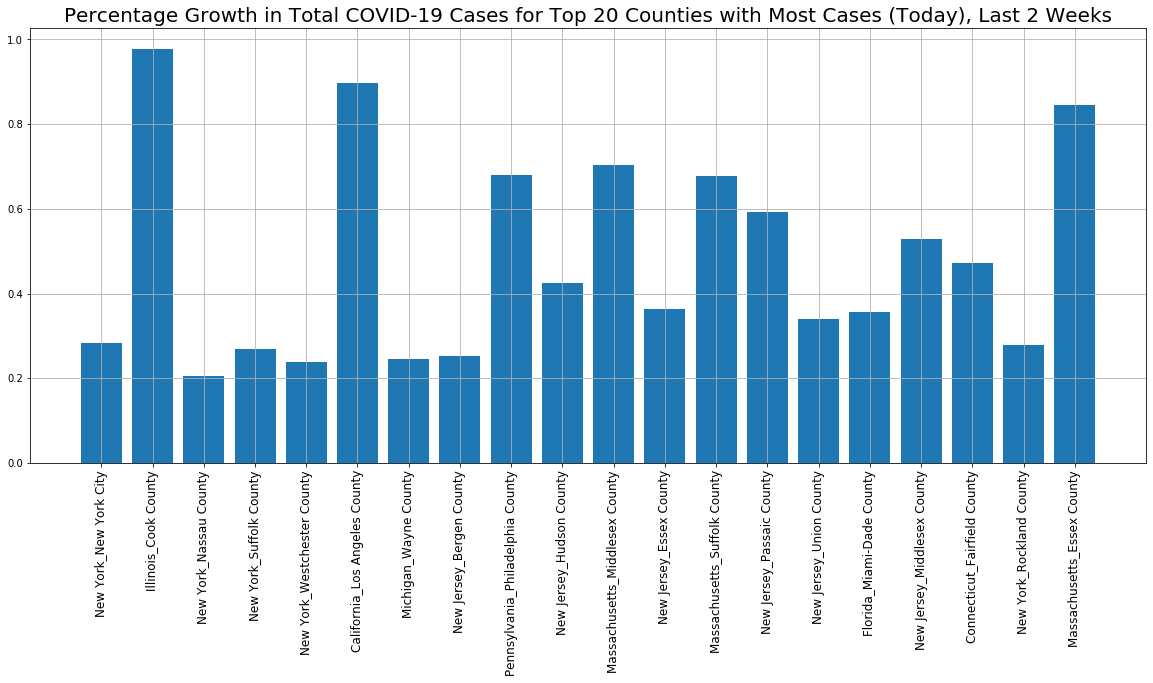

In [269]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Percentage Growth in Total COVID-19 Cases for Top 20 Counties with Most Cases (Today), Last 2 Weeks', fontsize = '20')
plt.bar(covid_data_2wkcomp_top20_cases.State_County, covid_data_2wkcomp_top20_cases.Pct_Change_Cases_2wks)

plt.xticks(covid_data_2wkcomp_top20_cases.index, fontsize = '12', rotation = 90)
plt.rc('ytick', labelsize='12');

In [270]:
# Exclude NYC b/c the numbers are so much larger than everywhere else
covid_data_2wkcomp_top10_changecases = covid_data_2wkcomp.sort_values(by='Change_Cases_2wks', ascending=False)
covid_data_2wkcomp_top10_changecases = covid_data_2wkcomp_top10_changecases[1:11]
covid_data_2wkcomp_top10_changecases

date                      State_County  2019EstPop  cases_20200504  \
745  2020-05-04              Illinois_Cook County   5150233.0           43715   
810  2020-05-04     California_Los Angeles County  10039107.0           26217   
1893 2020-05-04           New York_Suffolk County   1476601.0           35077   
1012 2020-05-04    Massachusetts_Middlesex County   1611699.0           15757   
1043 2020-05-04  Pennsylvania_Philadelphia County   1584064.0           16040   
2038 2020-05-04            New York_Nassau County   1356924.0           36965   
1978 2020-05-04       New York_Westchester County    967506.0           30097   
1045 2020-05-04      Massachusetts_Suffolk County    803907.0           13941   
1165 2020-05-04         New Jersey_Passaic County    501826.0           13496   
1514 2020-05-04          New Jersey_Hudson County    672391.0           15881   

      deaths_20200504  cases_20200420  deaths_20200420  Change_Cases_2wks  \
745              1802         22101.0            915.0            21614.0   
810              1256         13816.0            617.0            12401.0   
1893             1325         27662.0            887.0             7415.0   
1012              997          9253.0            402.0             6504.0   
1043              726          9553.0            370.0             6487.0   
2038             2221         30677.0           1638.0             6288.0   
1978             1220         24306.0            867.0             5791.0   
1045              596          8314.0            263.0             5627.0   
1165              633          8479.0            263.0             5017.0   
1514              845         11150.0            492.0             4731.0   

      Change_Deaths_2wks  Pct_Change_Cases_2wks  Pct_Change_Deaths_2wks  
745                887.0               0.977965                0.969399  
810                639.0               0.897583                1.035656  
1893               438.0               0.268057                0.493799  
1012               595.0               0.702907                1.480100  
1043               356.0               0.679054                0.962162  
2038               583.0               0.204974                0.355922  
1978               353.0               0.238254                0.407151  
1045               333.0               0.676810                1.266160  
1165               370.0               0.591697                1.406844  
1514               353.0               0.424305                0.717480

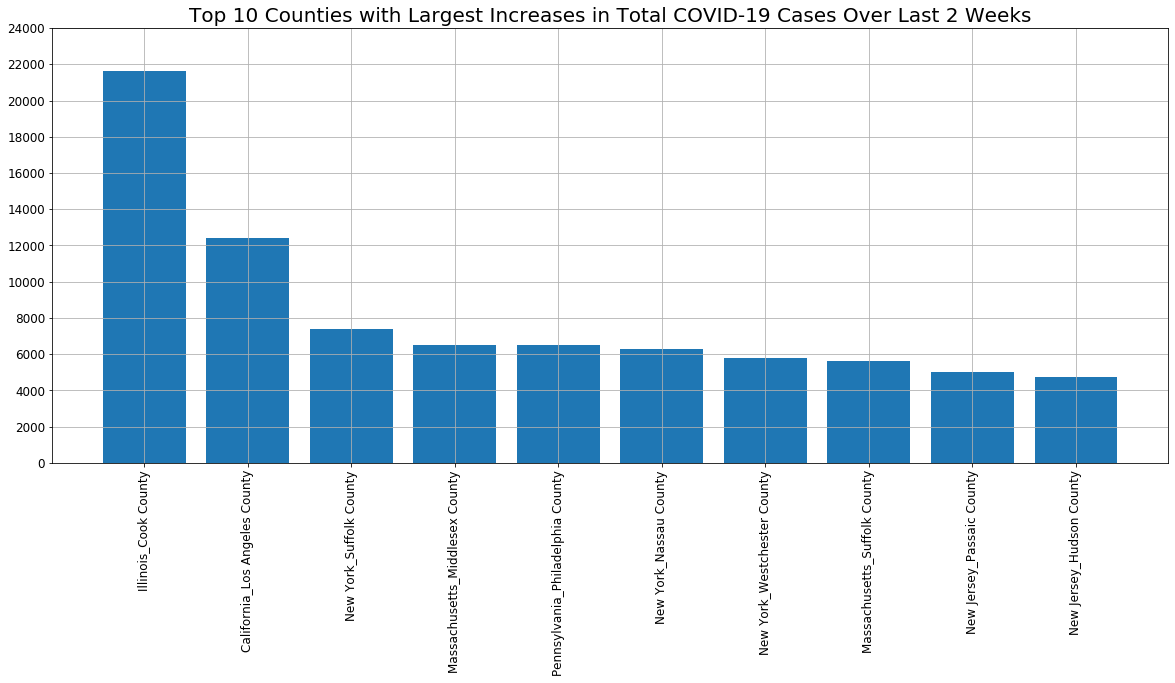

In [273]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Top 10 Counties with Largest Increases in Total COVID-19 Cases Over Last 2 Weeks', fontsize = '20')
plt.bar(covid_data_2wkcomp_top10_changecases.State_County, covid_data_2wkcomp_top10_changecases.Change_Cases_2wks)

y_ticks = np.linspace(0,24000,13)
plt.xticks(covid_data_2wkcomp_top10_changecases.State_County, fontsize = '12', rotation = 90)
plt.yticks(y_ticks);

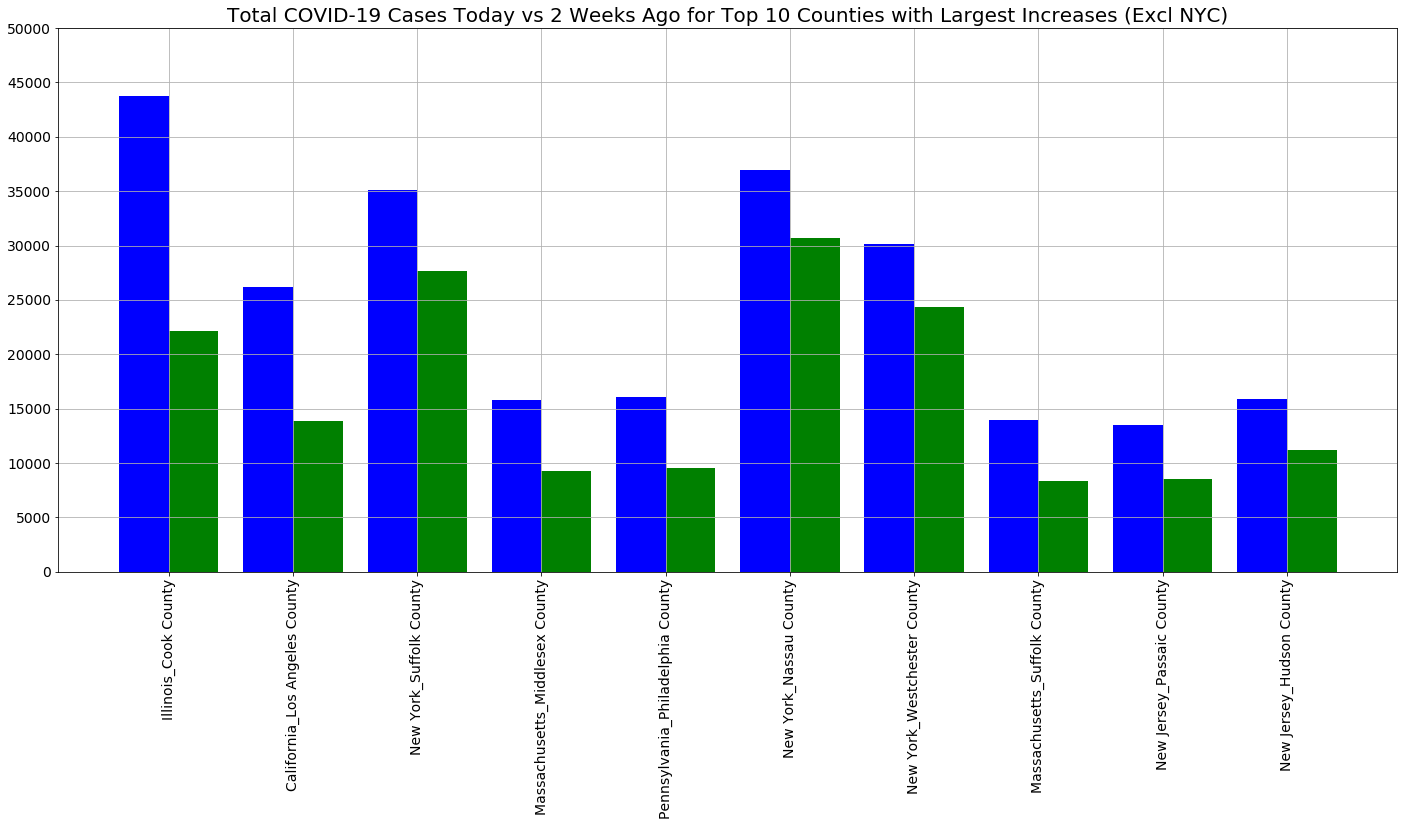

In [275]:
X = list(covid_data_2wkcomp_top10_changecases.State_County)
Y1 = list(covid_data_2wkcomp_top10_changecases['cases_' + today])
Y2 = list(covid_data_2wkcomp_top10_changecases['cases_' + date_2wksago_str])
X_val = np.arange(len(X))
y_ticks = np.linspace(0,50000,11)

plt.figure(figsize=[24,10])
plt.grid()
plt.title('Total COVID-19 Cases Today vs 2 Weeks Ago for Top 10 Counties with Largest Increases (Excl NYC)', fontsize = '20')
plt.bar(X_val - 0.2, Y1, 0.4, color = 'b')
plt.bar(X_val + 0.2, Y2, 0.4, color = 'g')
plt.xticks(X_val, X, fontsize = '14', rotation=90) # set labels manually
plt.yticks(y_ticks, fontsize = '14')
plt.show()

In [276]:
covid_data_PA_Luz = covid_data[covid_data['State_County'] == 'Pennsylvania_Luzerne County'][['date', 'cases', 'deaths']]
covid_data_PA_Luz.set_index('date', inplace=True)

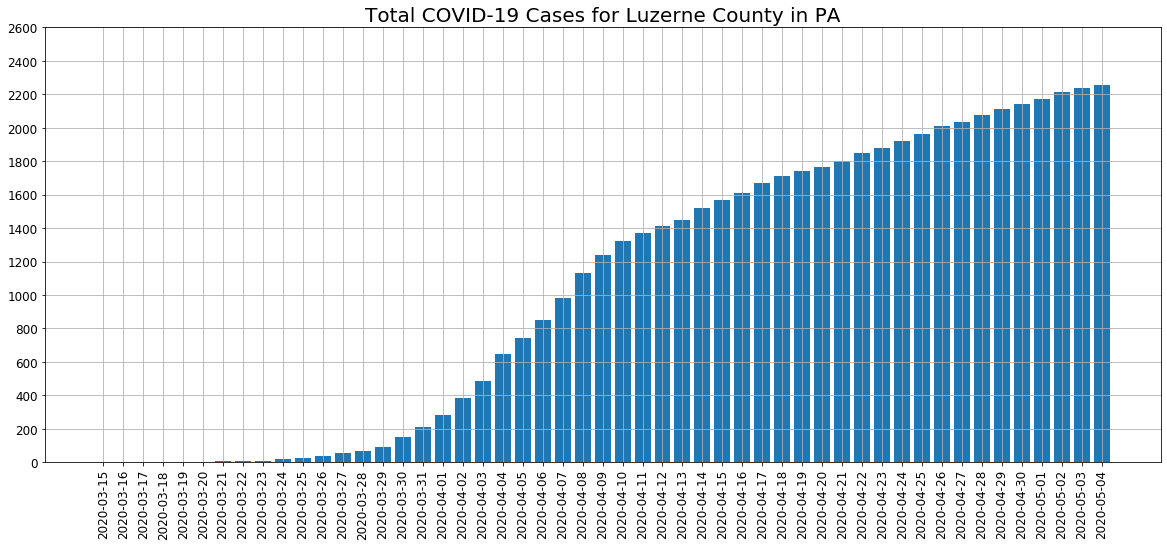

In [278]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total COVID-19 Cases for Luzerne County in PA', fontsize = '20')
plt.bar(covid_data_PA_Luz.index, covid_data_PA_Luz.cases)

y_ticks = np.linspace(0,2600,14)
plt.xticks(covid_data_PA_Luz.index, fontsize = '12', rotation = 90)
plt.yticks(y_ticks, fontsize = '12');

In [279]:
covid_data_PA_Luz_daily = covid_data_PA_Luz.diff()
covid_data_PA_Luz_daily.columns = ['cases_newdaily', 'deaths_newdaily']

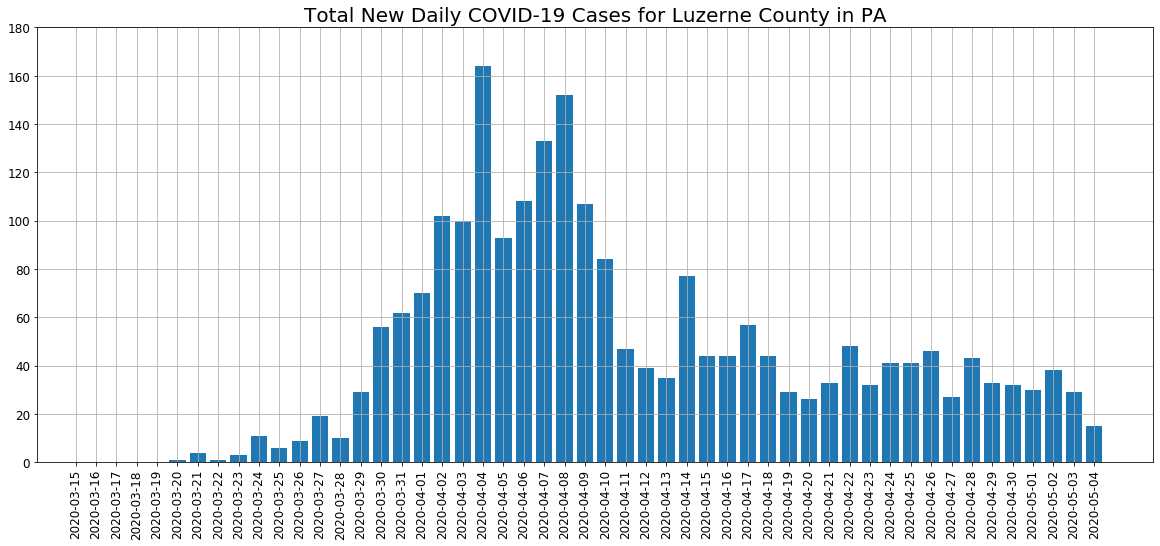

In [280]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total New Daily COVID-19 Cases for Luzerne County in PA', fontsize = '20')
plt.bar(covid_data_PA_Luz_daily.index, covid_data_PA_Luz_daily.cases_newdaily)

y_ticks = np.linspace(0,180,10)
plt.xticks(covid_data_PA_Luz_daily.index, fontsize = '12', rotation = 90)
plt.yticks(y_ticks, fontsize = '12')
plt.rc('ytick', labelsize='10');

In [281]:
# large % increase on 2020-03-21 so look at data after that
covid_data_PA_Luz_pct = covid_data_PA_Luz[covid_data_PA_Luz.index > '2020-03-21'].pct_change()
covid_data_PA_Luz_pct.columns = ['cases_dailypctchange', 'deaths_dailypctchange']

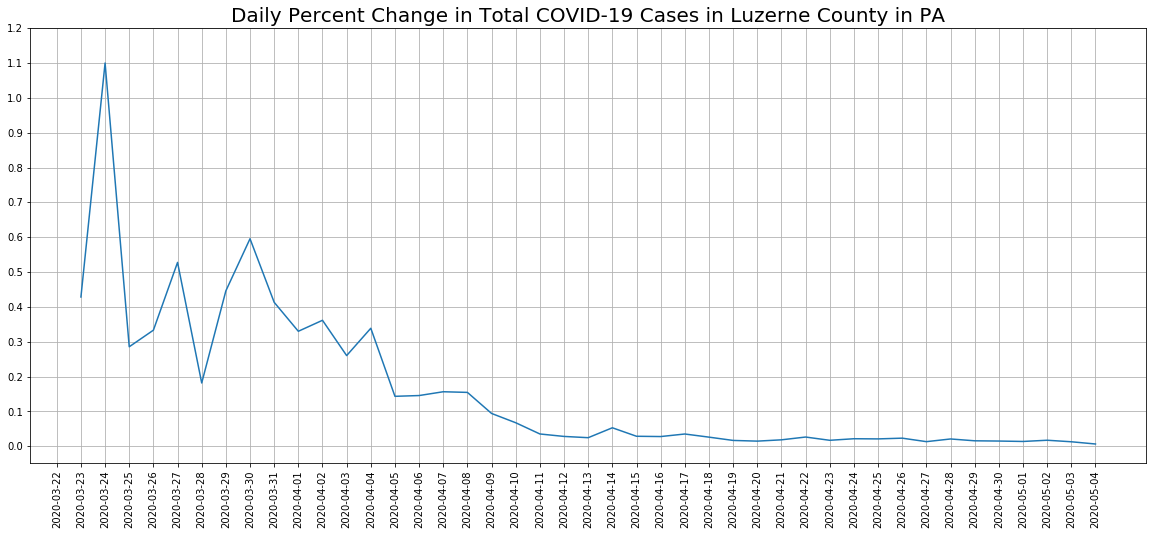

In [282]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily Percent Change in Total COVID-19 Cases in Luzerne County in PA', fontsize = '20')
plt.plot(covid_data_PA_Luz_pct.index, covid_data_PA_Luz_pct.cases_dailypctchange)

y_ticks = np.linspace(0,1.2,13)
plt.xticks(covid_data_PA_Luz_pct.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [283]:
covid_data_PA_Phil = covid_data[covid_data['State_County'] == 'Pennsylvania_Philadelphia County'][['date', 'cases', 'deaths']]
covid_data_PA_Phil.set_index('date', inplace=True)
covid_data_PA_Phil.tail()

cases  deaths
date                     
2020-04-30  14468     607
2020-05-01  15137     638
2020-05-02  15527     705
2020-05-03  15854     727
2020-05-04  16040     726

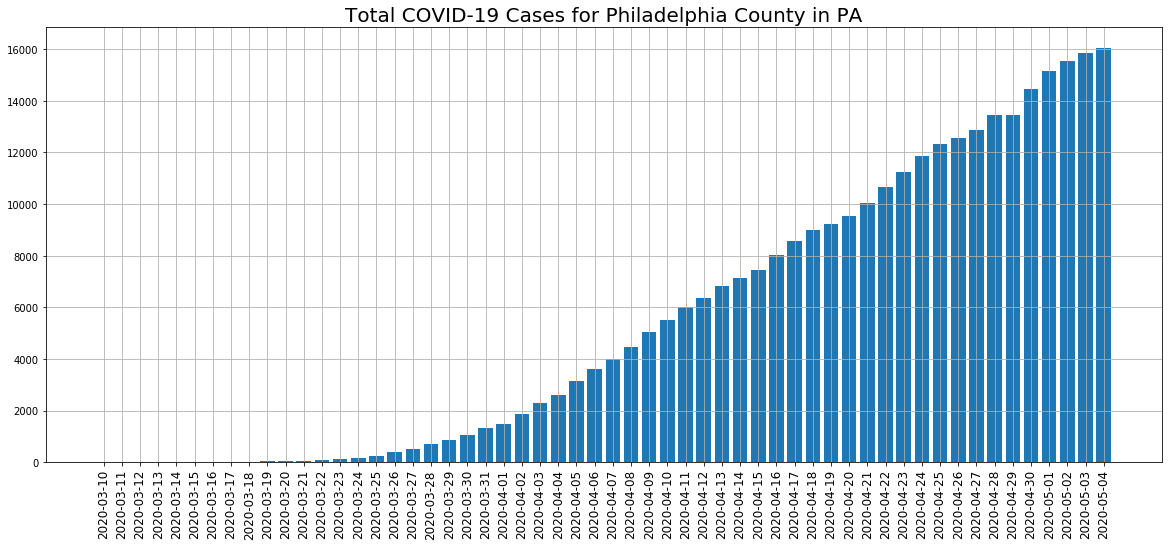

In [285]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total COVID-19 Cases for Philadelphia County in PA', fontsize = '20')
plt.bar(covid_data_PA_Phil.index, covid_data_PA_Phil.cases)

# y_ticks = np.linspace(0,12000,13)
plt.xticks(covid_data_PA_Phil.index, fontsize = '12', rotation = 90);
# plt.yticks(y_ticks, fontsize = '12');

In [286]:
covid_data_PA_Phil_daily = covid_data_PA_Phil.diff()
covid_data_PA_Phil_daily.columns = ['cases_newdaily', 'deaths_newdaily']

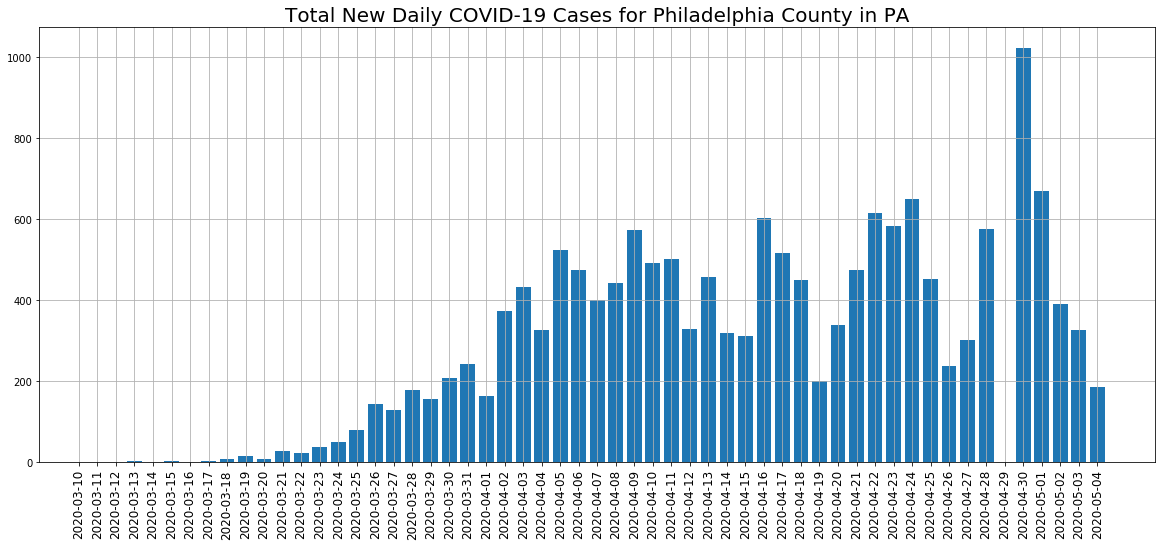

In [289]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total New Daily COVID-19 Cases for Philadelphia County in PA', fontsize = '20')
plt.bar(covid_data_PA_Phil_daily.index, covid_data_PA_Phil_daily.cases_newdaily)

# y_ticks = np.linspace(0,600,7)
plt.xticks(covid_data_PA_Phil_daily.index, fontsize = '12', rotation = 90);
# plt.yticks(y_ticks, fontsize = '12');

## COVID-19 Data (Latest Data)

In [566]:
covid_data_latest_sum = covid_data_latest.groupby('state')['cases','deaths'].sum()

In [567]:
covid_data_latest_sum = covid_data_latest_sum.sort_values(by='cases', ascending=False)

In [568]:
covid_data_latest_sum.reset_index()

state   cases  deaths
0                   New York  318984   19415
1                 New Jersey  128269    7910
2              Massachusetts   69087    4090
3                   Illinois   63840    2673
4                 California   56333    2297
5               Pennsylvania   52992    2880
6                   Michigan   43928    4135
7                    Florida   36889    1398
8                      Texas   33131     914
9                Connecticut   29973    2556
10                 Louisiana   29673    1991
11                   Georgia   28350    1228
12                  Maryland   26408    1216
13                   Indiana   20507    1151
14                      Ohio   20474    1056
15                  Virginia   19492     684
16                  Colorado   16799     849
17                Washington   15673     846
18                 Tennessee   13343     225
19            North Carolina   11871     454
20                      Iowa    9703     188
21              Rhode Island    9652     341
22                   Arizona    8919     362
23                  Missouri    8776     387
24                 Wisconsin    8236     340
25                   Alabama    8112     298
26               Mississippi    7877     310
27                 Minnesota    7234     428
28            South Carolina    6757     283
29                  Nebraska    6125      79
30                    Nevada    5627     266
31                    Kansas    5365     154
32                  Kentucky    5363     267
33                      Utah    5326      50
34                  Delaware    5288     182
35      District of Columbia    5170     258
36                  Oklahoma    4044     238
37                New Mexico    4031     156
38                  Arkansas    3469      80
39                    Oregon    2759     109
40              South Dakota    2668      21
41             New Hampshire    2588      86
42                     Idaho    1947      64
43               Puerto Rico    1843      54
44             West Virginia    1225      50
45              North Dakota    1225      25
46                     Maine    1205      57
47                      Guam    1114       6
48                   Vermont     902      53
49                    Hawaii     612      17
50                   Montana     457      16
51                   Wyoming     444       7
52                    Alaska     368       7
53            Virgin Islands      66       4
54  Northern Mariana Islands      14       2

In [569]:
covid_data_latest_sum['death_rate'] = covid_data_latest_sum['deaths'] / covid_data_latest_sum['cases']

In [570]:
covid_data_latest.loc[:,'CasesPer100000_dup'] = covid_data_latest['CasesPer100000']
covid_data_latest.loc[:,'DeathsPer100000_dup'] = covid_data_latest['DeathsPer100000']
covid_data_latest.loc[:,'2019EstPop_dup'] = covid_data_latest['2019EstPop']

C:\Users\matty\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\matty\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [571]:
covid_data_latest.loc[:, 'CasesPer100000_dup'] = covid_data_latest.rank(pct=True)
covid_data_latest.loc[:, 'DeathsPer100000_dup'] = covid_data_latest.rank(pct=True)
covid_data_latest.loc[:, '2019EstPop_dup'] = covid_data_latest.rank(pct=True)

In [572]:
covid_data_latest.rename(columns={'CasesPer100000_dup':'Pctile_CasesPer100000', 'DeathsPer100000_dup':'Pctile_DeathsPer100000', '2019EstPop_dup':'Pctile_2019EstPop'}, inplace=True)

C:\Users\matty\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [573]:
covid_data_latest['Diff_Pct2019Pop_VS_PctCases'] = covid_data_latest['Pctile_2019EstPop'] - covid_data_latest['Pctile_CasesPer100000']

C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [574]:
covid_data_latest['death_rate'] = covid_data_latest['deaths'] / covid_data_latest['cases']

C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [575]:
covid_data_latest.head()

date          county    state    FIPS  cases  deaths  \
41  2020-05-04  Autauga County  Alabama  1001.0     53       3   
93  2020-05-04  Baldwin County  Alabama  1003.0    188       4   
125 2020-05-04  Barbour County  Alabama  1005.0     45       1   
161 2020-05-04     Bibb County  Alabama  1007.0     42       0   
202 2020-05-04   Blount County  Alabama  1009.0     40       0   

     MedianHHInc_2018            State_County  2019EstPop  CasesPer100000  \
41            59338.0  Alabama_Autauga County     55869.0       94.864773   
93            57588.0  Alabama_Baldwin County    223234.0       84.216562   
125           34382.0  Alabama_Barbour County     24686.0      182.289557   
161           46064.0     Alabama_Bibb County     22394.0      187.550237   
202           50412.0   Alabama_Blount County     57826.0       69.173036   

     DeathsPer100000  Pctile_CasesPer100000  Pctile_DeathsPer100000  \
41          5.369704               0.579537                0.708243   
93          1.791842               0.537599                0.541215   
125         4.050879               0.756327                0.661244   
161         0.000000               0.761027                0.239516   
202         0.000000               0.467101                0.239516   

     Pctile_2019EstPop  Diff_Pct2019Pop_VS_PctCases  death_rate  
41            0.676067                     0.096529    0.056604  
93            0.891540                     0.353941    0.021277  
125           0.434201                    -0.322126    0.022222  
161           0.403832                    -0.357195    0.000000  
202           0.684382                     0.217281    0.000000

In [576]:
covid_data_latest = covid_data_latest[['date', 'county', 'state', 'cases', 'deaths', 'death_rate', 'MedianHHInc_2018', 
                                       'State_County', '2019EstPop', 'CasesPer100000', 'DeathsPer100000', 
                                       'Pctile_CasesPer100000', 'Pctile_DeathsPer100000', 'Pctile_2019EstPop', 
                                       'Diff_Pct2019Pop_VS_PctCases']]

In [577]:
covid_data_latest.sort_values(by='MedianHHInc_2018').head(20)

date               county           state  cases  deaths  \
2763   2020-05-04        Wilcox County         Alabama     72       4   
88688  2020-05-04       Buffalo County    South Dakota      1       0   
41121  2020-05-04        Owsley County        Kentucky      2       0   
55025  2020-05-04        Holmes County     Mississippi    168      10   
2187   2020-05-04         Perry County         Alabama     16       0   
111003 2020-05-04      McDowell County   West Virginia      6       0   
42782  2020-05-04  East Carroll County       Louisiana      8       0   
56474  2020-05-04       Quitman County     Mississippi     16       0   
2485   2020-05-04        Sumter County         Alabama     81       3   
55238  2020-05-04     Jefferson County     Mississippi     23       0   
5590   2020-05-04           Lee County        Arkansas      3       1   
38845  2020-05-04          Clay County        Kentucky      1       0   
21374  2020-05-04      Randolph County         Georgia    164      19   
43446  2020-05-04       Madison County       Louisiana      8       0   
1279   2020-05-04        Greene County         Alabama     61       1   
55071  2020-05-04     Humphreys County     Mississippi     25       4   
56606  2020-05-04       Sharkey County     Mississippi      5       0   
40502  2020-05-04        Martin County        Kentucky      3       0   
44377  2020-05-04        Tensas County       Louisiana      2       0   
86472  2020-05-04     Allendale County  South Carolina     14       1   

        death_rate  MedianHHInc_2018                     State_County  \
2763      0.055556           25385.0            Alabama_Wilcox County   
88688     0.000000           25973.0      South Dakota_Buffalo County   
41121     0.000000           26278.0           Kentucky_Owsley County   
55025     0.059524           26449.0        Mississippi_Holmes County   
2187      0.000000           26814.0             Alabama_Perry County   
111003    0.000000           27292.0    West Virginia_McDowell County   
42782     0.000000           27714.0    Louisiana_East Carroll County   
56474     0.000000           27767.0       Mississippi_Quitman County   
2485      0.037037           27859.0            Alabama_Sumter County   
55238     0.000000           28024.0     Mississippi_Jefferson County   
5590      0.333333           28080.0              Arkansas_Lee County   
38845     0.000000           28146.0             Kentucky_Clay County   
21374     0.115854           28298.0          Georgia_Randolph County   
43446     0.000000           28452.0         Louisiana_Madison County   
1279      0.016393           28524.0            Alabama_Greene County   
55071     0.160000           28542.0     Mississippi_Humphreys County   
56606     0.000000           28887.0       Mississippi_Sharkey County   
40502     0.000000           28925.0           Kentucky_Martin County   
44377     0.000000           28962.0          Louisiana_Tensas County   
86472     0.071429           29124.0  South Carolina_Allendale County   

        2019EstPop  CasesPer100000  DeathsPer100000  Pctile_CasesPer100000  \
2763       10373.0      694.109708        38.561650               0.950108   
88688       1962.0       50.968400         0.000000               0.354664   
41121       4415.0       45.300113         0.000000               0.318872   
55025      17010.0      987.654321        58.788948               0.971439   
2187        8923.0      179.311891         0.000000               0.750542   
111003     17624.0       34.044485         0.000000               0.224873   
42782          NaN             NaN              NaN                    NaN   
56474       6792.0      235.571260         0.000000               0.810557   
2485       12427.0      651.806550        24.140983               0.946855   
55238       6990.0      329.041488         0.000000               0.873102   
5590        8857.0       33.871514        11.290505               0.223427   
38845    

In [578]:
covid_data_deadliest = covid_data_latest[~covid_data_latest.county.isin(['Unknown County'])][covid_data_latest['deaths'] >= 10].sort_values(by='death_rate', ascending=False).head(10)

C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [579]:
covid_data_deadliest

date                   county      state  cases  deaths  \
28728 2020-05-04           Daviess County    Indiana     52      15   
24261 2020-05-04         Nez Perce County      Idaho     65      18   
45491 2020-05-04             Waldo County      Maine     49      13   
10306 2020-05-04           Chaffee County   Colorado     67      16   
44166 2020-05-04        St. Landry County  Louisiana    191      45   
53795 2020-05-04            Winona County  Minnesota     67      15   
78952 2020-05-04             Wayne County       Ohio    161      33   
44744 2020-05-04  West Baton Rouge County  Louisiana    111      22   
77792 2020-05-04             Miami County       Ohio    144      27   
76291 2020-05-04             Darke County       Ohio     77      14   

       death_rate  MedianHHInc_2018                       State_County  \
28728    0.288462           55434.0             Indiana_Daviess County   
24261    0.276923           54476.0             Idaho_Nez Perce County   
45491    0.265306           49482.0                 Maine_Waldo County   
10306    0.238806           56168.0            Colorado_Chaffee County   
44166    0.235602           36624.0        Louisiana_St. Landry County   
53795    0.223881           56076.0            Minnesota_Winona County   
78952    0.204969           59142.0                  Ohio_Wayne County   
44744    0.198198           58205.0  Louisiana_West Baton Rouge County   
77792    0.187500           59922.0                  Ohio_Miami County   
76291    0.181818           53853.0                  Ohio_Darke County   

       2019EstPop  CasesPer100000  DeathsPer100000  Pctile_CasesPer100000  \
28728     33351.0      155.917364        44.976163               0.711858   
24261     40408.0      160.859236        44.545635               0.721258   
45491     39715.0      123.379076        32.733224               0.650759   
10306     20356.0      329.141285        78.600904               0.873463   
44166         NaN             NaN              NaN                    NaN   
53795     50484.0      132.715316        29.712384               0.667751   
78952    115710.0      139.140956        28.519575               0.681490   
44744         NaN             NaN              NaN                    NaN   
77792    106987.0      134.595792        25.236711               0.671728   
76291     51113.0      150.646607        27.390292               0.702097   

       Pctile_DeathsPer100000  Pctile_2019EstPop  Diff_Pct2019Pop_VS_PctCases  
28728                0.963485           0.525307                    -0.186551  
24261                0.962762           0.588937                    -0.132321  
45491                0.949385           0.581706                    -0.069053  
10306                0.985900           0.370210                    -0.503254  
44166                     NaN                NaN                          NaN  
53795                0.940709           0.653832                    -0.013919  
78952                0.936732           0.810918                     0.129429  
44744                     NaN                NaN                          NaN  
77792                0.926247           0.799711                     0.127983  
76291                0.931670           0.657267                    -0.044830

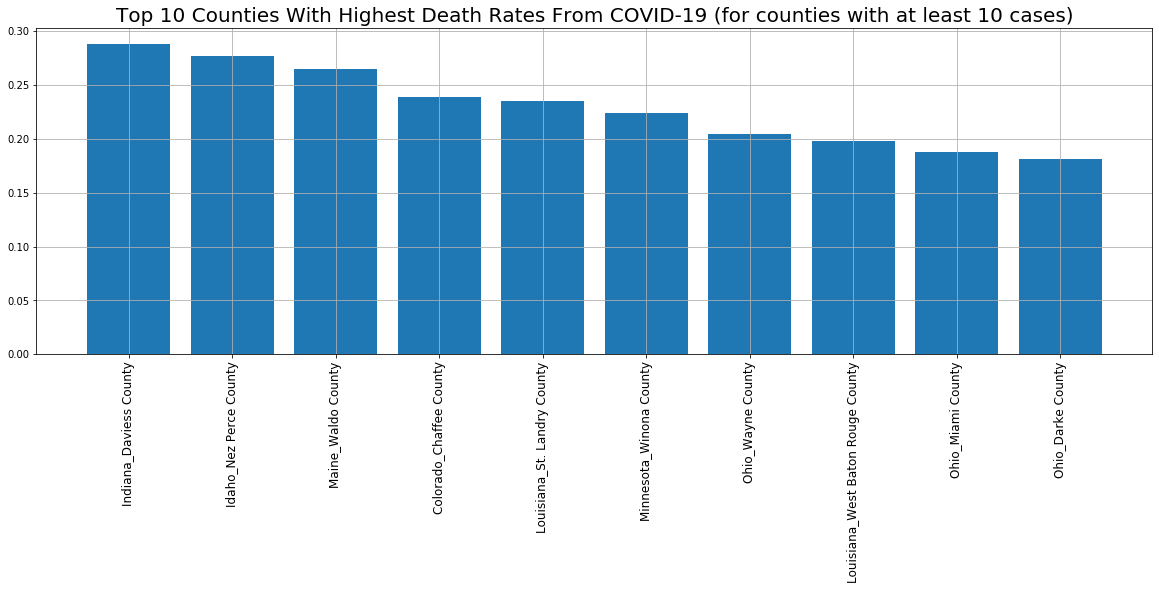

In [580]:
plt.figure(figsize=[20,6])
plt.grid()
plt.title('Top 10 Counties With Highest Death Rates From COVID-19 (for counties with at least 10 cases)', fontsize = '20')
plt.bar(covid_data_deadliest.State_County, covid_data_deadliest.death_rate)

y_ticks = np.linspace(0, 0.30, 7)
plt.xticks(covid_data_deadliest.State_County, fontsize = '12', rotation = 90)
plt.yticks(y_ticks);

In [582]:
covid_data_latest[covid_data_latest['state'] == 'Georgia'].sort_values(by='CasesPer100000', ascending=False)

date             county    state  cases  deaths  death_rate  \
21374 2020-05-04    Randolph County  Georgia    164      19    0.115854   
21957 2020-05-04     Terrell County  Georgia    189      21    0.111111   
18396 2020-05-04       Early County  Georgia    221      24    0.108597   
18303 2020-05-04   Dougherty County  Georgia   1543     125    0.081011   
17049 2020-05-04     Calhoun County  Georgia    107       4    0.037383   
20572 2020-05-04    Mitchell County  Georgia    326      33    0.101227   
21752 2020-05-04      Sumter County  Georgia    391      29    0.074169   
20019 2020-05-04         Lee County  Georgia    329      20    0.060790   
22828 2020-05-04      Wilcox County  Georgia     90      10    0.111111   
18252 2020-05-04       Dooly County  Georgia    133      12    0.090226   
22403 2020-05-04       Upson County  Georgia    240      21    0.087500   
17547 2020-05-04        Clay County  Georgia     25       3    0.120000   
19232 2020-05-04        Hall County  Georgia   1776      23    0.012950   
22241 2020-05-04      Turner County  Georgia     69      10    0.144928   
16435 2020-05-04       Baker County  Georgia     26       2    0.076923   
22950 2020-05-04       Worth County  Georgia    167      11    0.065868   
19182 2020-05-04   Habersham County  Georgia    355       9    0.025352   
17995 2020-05-04       Crisp County  Georgia    170       4    0.023529   
19260 2020-05-04     Hancock County  Georgia     64       2    0.031250   
19796 2020-05-04     Johnson County  Georgia     63       2    0.031746   
20291 2020-05-04       Macon County  Georgia     81       3    0.037037   
17009 2020-05-04       Butts County  Georgia    152      17    0.111842   
20530 2020-05-04      Miller County  Georgia     32       0    0.000000   
16480 2020-05-04     Baldwin County  Georgia    239       9    0.037657   
20366 2020-05-04      Marion County  Georgia     39       1    0.025641   
21998 2020-05-04      Thomas County  Georgia    196      20    0.102041   
17787 2020-05-04    Colquitt County  Georgia    192       9    0.046875   
21788 2020-05-04      Talbot County  Georgia     25       1    0.040000   
16327 2020-05-04     Appling County  Georgia     74       7    0.094595   
22904 2020-05-04   Wilkinson County  Georgia     36       2    0.055556   
...          ...                ...      ...    ...     ...         ...   
19917 2020-05-04      Lanier County  Georgia     10       1    0.100000   
18808 2020-05-04    Franklin County  Georgia     22       1    0.045455   
20618 2020-05-04      Monroe County  Georgia     25       3    0.120000   
17273 2020-05-04    Charlton County  Georgia     12       0    0.000000   
21044 2020-05-04     Pickens County  Georgia     29       2    0.068966   
16693 2020-05-04     Berrien County  Georgia     17       0    0.000000   
22438 2020-05-04      Walker County  Georgia     61       0    0.000000   
20334 2020-05-04     Madison County  Georgia     26       1    0.038462   
17319 2020-05-04     Chatham County  Georgia    246      10    0.040650   
20723 2020-05-04      Murray County  Georgia     34       1    0.029412   
21328 2020-05-04       Rabun County  Georgia     13       1    0.076923   
17217 2020-05-04     Catoosa County  Georgia     51       0    0.000000   
18955 2020-05-04       Glynn County  Georgia     58       1    0.017241   
21790 2020-05-04  Taliaferro County  Georgia      1       0    0.000000   
17128 2020-05-04     Candler County  Georgia      7       0    0.000000   
22703 2020-05-04     Wheeler County  Georgia      5       0    0.000000   
17402 2020-05-04   Chattooga County  Georgia     15       2    0.133333   
17091 2020-05-04      Camden County  Georgia     33       1    0.030303   
20062 2020-05-04     Liberty County  Georgia     37       0    0.000000   
18472 2020-05-04   Effingham County  Georgia     36       1    0.027778   
16922 2020-05-04     Bulloch County  Georgia     43       2    0.046512   
18562 2020-05-04       Evans County  

In [586]:
covid_data_latest[covid_data_latest['state'] == 
                  'Georgia'][covid_data_latest.county.isin(['DeKalb County', 'Fulton County'])]

C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


date         county    state  cases  deaths  death_rate  \
18134 2020-05-04  DeKalb County  Georgia   2255      57    0.025277   
18872 2020-05-04  Fulton County  Georgia   3057     129    0.042198   

       MedianHHInc_2018           State_County  2019EstPop  CasesPer100000  \
18134           63477.0  Georgia_DeKalb County    759297.0      296.985238   
18872           70808.0  Georgia_Fulton County   1063937.0      287.329043   

       DeathsPer100000  Pctile_CasesPer100000  Pctile_DeathsPer100000  \
18134         7.506944               0.857918                0.772234   
18872        12.124778               0.851048                0.845625   

       Pctile_2019EstPop  Diff_Pct2019Pop_VS_PctCases  
18134           0.969631                     0.111714  
18872           0.986262                     0.135213

In [306]:
covid_data_deadliest_v2 = covid_data_latest[covid_data_latest['county'] != 'Unknown County'][covid_data_latest['cases'] >= 100].sort_values(by='death_rate', ascending=False).head(10)
covid_data_deadliest_v2

C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


date                   county           state  cases  deaths  \
44166 2020-05-04        St. Landry County       Louisiana    191      45   
78952 2020-05-04             Wayne County            Ohio    161      33   
44744 2020-05-04  West Baton Rouge County       Louisiana    111      22   
77792 2020-05-04             Miami County            Ohio    144      27   
71642 2020-05-04          Franklin County  North Carolina    105      19   
75513 2020-05-04             Allen County            Ohio    133      23   
78223 2020-05-04           Portage County            Ohio    251      42   
48710 2020-05-04         Hillsdale County        Michigan    131      21   
49216 2020-05-04            Lapeer County        Michigan    171      27   
31826 2020-05-04           Warrick County         Indiana    103      16   

       death_rate  MedianHHInc_2018                       State_County  \
44166    0.235602           36624.0        Louisiana_St. Landry County   
78952    0.204969           59142.0                  Ohio_Wayne County   
44744    0.198198           58205.0  Louisiana_West Baton Rouge County   
77792    0.187500           59922.0                  Ohio_Miami County   
71642    0.180952           57710.0     North Carolina_Franklin County   
75513    0.172932           50301.0                  Ohio_Allen County   
78223    0.167331           63689.0                Ohio_Portage County   
48710    0.160305           50388.0          Michigan_Hillsdale County   
49216    0.157895           65209.0             Michigan_Lapeer County   
31826    0.155340           75534.0             Indiana_Warrick County   

       2019EstPop  CasesPer100000  DeathsPer100000  Pctile_CasesPer100000  \
44166         NaN             NaN              NaN                    NaN   
78952    115710.0      139.140956        28.519575               0.681490   
44744         NaN             NaN              NaN                    NaN   
77792    106987.0      134.595792        25.236711               0.671728   
71642     69685.0      150.678051        27.265552               0.702820   
75513    102351.0      129.944993        22.471691               0.661244   
78223    162466.0      154.493863        25.851563               0.710051   
48710     45605.0      287.249205        46.047583               0.850687   
49216     87607.0      195.189882        30.819455               0.771150   
31826     62998.0      163.497254        25.397632               0.726320   

       Pctile_DeathsPer100000  Pctile_2019EstPop  Diff_Pct2019Pop_VS_PctCases  
44166                     NaN                NaN                          NaN  
78952                0.936732           0.810918                     0.129429  
44744                     NaN                NaN                          NaN  
77792                0.926247           0.799711                     0.127983  
71642                0.930947           0.726681                     0.023861  
75513                0.917570           0.791034                     0.129790  
78223                0.927693           0.855748                     0.145698  
48710                0.967462           0.626898                    -0.223789  
49216                0.944685           0.766450                    -0.004700  
31826                0.926609           0.702820                    -0.023500

In [307]:
covid_data_deadliest_v3 = covid_data_latest[covid_data_latest['county'] != 
                                            'Unknown County'][covid_data_latest['2019EstPop'] >= 
                                                              500000].sort_values(by='death_rate', 
                                                                                  ascending=False).head(20)
covid_data_deadliest_v3

C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


date             county          state   cases  deaths  \
12608 2020-05-04    Hartford County    Connecticut    6173     773   
51888 2020-05-04    Hennepin County      Minnesota    2298     284   
49479 2020-05-04      Macomb County       Michigan    5736     643   
50823 2020-05-04       Wayne County       Michigan   17314    1924   
50012 2020-05-04     Oakland County       Michigan    7499     762   
84634 2020-05-04   Lancaster County   Pennsylvania    1991     198   
36500 2020-05-04     Johnson County         Kansas     504      45   
65520 2020-05-04       Essex County     New Jersey   14621    1292   
47316 2020-05-04     Norfolk County  Massachusetts    6382     555   
85100 2020-05-04  Montgomery County   Pennsylvania    4645     382   
78624 2020-05-04      Summit County           Ohio     716      58   
10761 2020-05-04     El Paso County       Colorado    1005      76   
83503 2020-05-04       Bucks County   Pennsylvania    3429     258   
68826 2020-05-04      New York City       New York  175661   13207   
83192 2020-05-04   Allegheny County   Pennsylvania    1365     102   
65257 2020-05-04      Bergen County     New Jersey   16282    1215   
12556 2020-05-04   Fairfield County    Connecticut   12245     910   
83770 2020-05-04     Chester County   Pennsylvania    1605     118   
12762 2020-05-04   New Haven County    Connecticut    8110     595   
39813 2020-05-04   Jefferson County       Kentucky    1419     101   

       death_rate  MedianHHInc_2018                    State_County  \
12608    0.125223           73037.0     Connecticut_Hartford County   
51888    0.123586           76067.0       Minnesota_Hennepin County   
49479    0.112099           62191.0          Michigan_Macomb County   
50823    0.111124           46440.0           Michigan_Wayne County   
50012    0.101614           80319.0         Michigan_Oakland County   
84634    0.099448           66270.0   Pennsylvania_Lancaster County   
36500    0.089286           87087.0           Kansas_Johnson County   
65520    0.088366           62875.0         New Jersey_Essex County   
47316    0.086963          100184.0    Massachusetts_Norfolk County   
85100    0.082239           90155.0  Pennsylvania_Montgomery County   
78624    0.081006           58890.0              Ohio_Summit County   
10761    0.075622           67923.0         Colorado_El Paso County   
83503    0.075241           88538.0       Pennsylvania_Bucks County   
68826    0.075185               NaN          New York_New York City   
83192    0.074725           59881.0   Pennsylvania_Allegheny County   
65257    0.074622          100181.0        New Jersey_Bergen County   
12556    0.074316           91183.0    Connecticut_Fairfield County   
83770    0.073520           99224.0     Pennsylvania_Chester County   
12762    0.073366           67720.0    Connecticut_New Haven County   
39813    0.071177           55860.0       Kentucky_Jefferson County   

       2019EstPop  CasesPer100000  DeathsPer100000  Pctile_CasesPer100000  \
12608    891720.0      692.257659        86.686404               0.949747   
51888   1265843.0      181.539101        22.435642               0.755242   
49479    873972.0      656.313932        73.572151               0.947939   
50823   1749343.0      989.743006       109.984148               0.971800   
50012   1257584.0      596.302116        60.592374               0.942516   
84634    545724.0      364.836437        36.282077               0.889732   
36500    602401.0       83.665200         7.470107               0.533623   
65520    798975.0     1829.969649       161.707187               0.989516   
47316    706775.0      902.974780        78.525698               0.968185   
85100    830915.0      559.022283        45.973415               0.937455   
78624    541013.0      132.344324        10.720630               0.666667   
10761    720403.0      139.505249        10.549651               0.682213   
83503    628270.0      545.784456        41.0651

In [308]:
covid_data_deadliest_v4 = covid_data_latest[covid_data_latest['county'] != 
                                            'Unknown County'][covid_data_latest['deaths'] 
                                                              >= 20].sort_values(by='death_rate', ascending=False).head(30)
covid_data_deadliest_v4

C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


date                   county          state  cases  deaths  \
44166  2020-05-04        St. Landry County      Louisiana    191      45   
78952  2020-05-04             Wayne County           Ohio    161      33   
44744  2020-05-04  West Baton Rouge County      Louisiana    111      22   
77792  2020-05-04             Miami County           Ohio    144      27   
75513  2020-05-04             Allen County           Ohio    133      23   
78223  2020-05-04           Portage County           Ohio    251      42   
48710  2020-05-04         Hillsdale County       Michigan    131      21   
49216  2020-05-04            Lapeer County       Michigan    171      27   
83283  2020-05-04            Beaver County   Pennsylvania    458      68   
28853  2020-05-04           Decatur County        Indiana    202      28   
47048  2020-05-04          Franklin County  Massachusetts    273      37   
78572  2020-05-04             Stark County           Ohio    405      53   
12710  2020-05-04         Middlesex County    Connecticut    713      93   
12608  2020-05-04          Hartford County    Connecticut   6173     773   
79029  2020-05-04              Wood County           Ohio    193      24   
51888  2020-05-04          Hennepin County      Minnesota   2298     284   
15762  2020-05-04          Sarasota County        Florida    385      47   
48501  2020-05-04           Genesee County       Michigan   1647     199   
28420  2020-05-04             Boone County        Indiana    199      24   
66146  2020-05-04            Sussex County     New Jersey    979     116   
30230  2020-05-04           Madison County        Indiana    450      53   
45908  2020-05-04           Carroll County       Maryland    506      59   
49479  2020-05-04            Macomb County       Michigan   5736     643   
50823  2020-05-04             Wayne County       Michigan  17314    1924   
21957  2020-05-04           Terrell County        Georgia    189      21   
39728  2020-05-04           Hopkins County       Kentucky    207      23   
56255  2020-05-04       Pearl River County    Mississippi    181      20   
44254  2020-05-04          St. Mary County      Louisiana    209      23   
105338 2020-05-04           Henrico County       Virginia    964     105   
18396  2020-05-04             Early County        Georgia    221      24   

        death_rate  MedianHHInc_2018                       State_County  \
44166     0.235602           36624.0        Louisiana_St. Landry County   
78952     0.204969           59142.0                  Ohio_Wayne County   
44744     0.198198           58205.0  Louisiana_West Baton Rouge County   
77792     0.187500           59922.0                  Ohio_Miami County   
75513     0.172932           50301.0                  Ohio_Allen County   
78223     0.167331           63689.0                Ohio_Portage County   
48710     0.160305           50388.0          Michigan_Hillsdale County   
49216     0.157895           65209.0             Michigan_Lapeer County   
83283     0.148472           54823.0         Pennsylvania_Beaver County   
28853     0.138614           57441.0             Indiana_Decatur County   
47048     0.135531           58992.0      Massachusetts_Franklin County   
78572     0.130864           52310.0                  Ohio_Stark County   
12710     0.130435           88709.0       Connecticut_Middlesex County   
12608     0.125223           73037.0        Connecticut_Hartford County   
79029     0.124352           64282.0                   Ohio_Wood County   
51888     0.123586           76067.0          Minnesota_Hennepin County   
15762     0.122078           61652.0            Florida_Sarasota County   
48501     0.120826           48370.0            Michigan_Genesee County   
28420     0.120603           85876.0               Indiana_Boone County   
66146     0.118488           92284.0           New Jersey_Sussex County   
30230     0.117778           49522.0             Indiana_Madison County   
45908 

In [309]:
covid_data_MA_Franklin = covid_data[covid_data['State_County'] == 'Massachusetts_Franklin County'][['date', 'cases', 'deaths']]
covid_data_MA_Franklin.set_index('date', inplace=True)
covid_data_MA_Franklin = covid_data_MA_Franklin[covid_data_MA_Franklin.index > '2020-03-25']
covid_data_MA_Franklin['death_rate'] = covid_data_MA_Franklin['deaths'] / covid_data_MA_Franklin['cases']
covid_data_MA_Franklin

cases  deaths  death_rate
date                                 
2020-03-26     16       1    0.062500
2020-03-27     24       2    0.083333
2020-03-28     39       2    0.051282
2020-03-29     41       2    0.048780
2020-03-30     49       2    0.040816
2020-03-31     61       4    0.065574
2020-04-01     72       7    0.097222
2020-04-02     85       8    0.094118
2020-04-03     89      11    0.123596
2020-04-04     95      12    0.126316
2020-04-05    100      12    0.120000
2020-04-06    107      13    0.121495
2020-04-07    118      17    0.144068
2020-04-08    117      21    0.179487
2020-04-09    128      22    0.171875
2020-04-10    135      22    0.162963
2020-04-11    138      23    0.166667
2020-04-12    143      25    0.174825
2020-04-13    148      25    0.168919
2020-04-14    155      25    0.161290
2020-04-15    160      25    0.156250
2020-04-16    170      25    0.147059
2020-04-17    173      25    0.144509
2020-04-18    177      25    0.141243
2020-04-19    181      26    0.143646
2020-04-20    187      26    0.139037
2020-04-21    192      29    0.151042
2020-04-22    196      30    0.153061
2020-04-23    203      30    0.147783
2020-04-24    217      31    0.142857
2020-04-25    225      32    0.142222
2020-04-26    226      33    0.146018
2020-04-27    231      33    0.142857
2020-04-28    237      33    0.139241
2020-04-29    252      35    0.138889
2020-04-30    257      37    0.143969
2020-05-01    260      37    0.142308
2020-05-02    263      37    0.140684
2020-05-03    269      37    0.137546
2020-05-04    273      37    0.135531

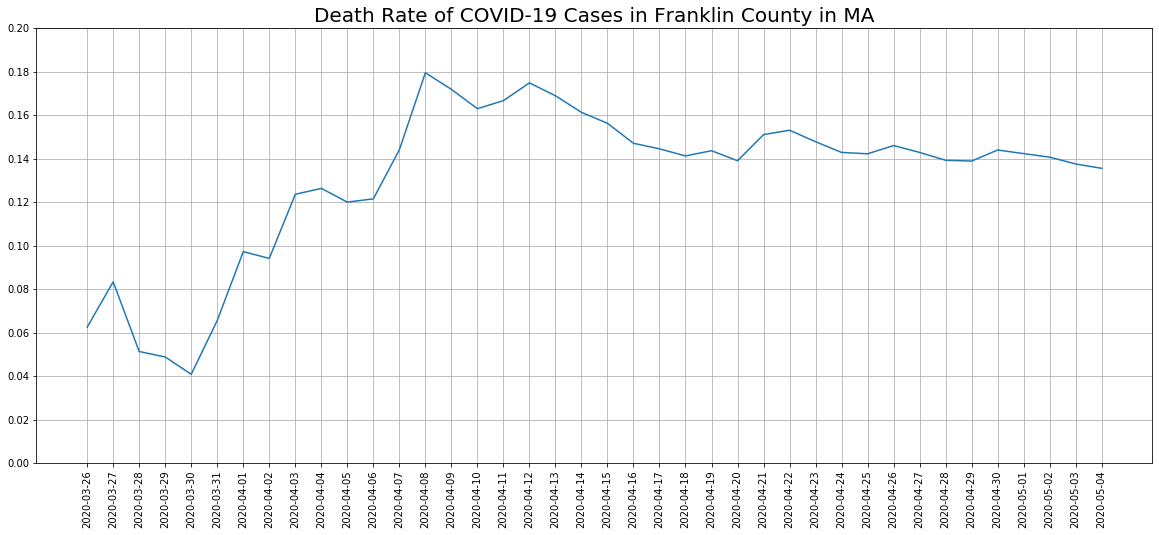

In [310]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Death Rate of COVID-19 Cases in Franklin County in MA', fontsize = '20')
plt.plot(covid_data_MA_Franklin.index, covid_data_MA_Franklin.death_rate)

y_ticks = np.linspace(0,0.20,11)
plt.xticks(covid_data_MA_Franklin.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [312]:
covid_data_latest[~covid_data_latest.county.isin(['Unknown County'])].sort_values(by='deaths', ascending=False).head(20)

date               county          state   cases  deaths  \
68826 2020-05-04        New York City       New York  175661   13207   
68761 2020-05-04        Nassau County       New York   36965    2221   
50823 2020-05-04         Wayne County       Michigan   17314    1924   
25133 2020-05-04          Cook County       Illinois   43715    1802   
69739 2020-05-04       Suffolk County       New York   35077    1325   
65520 2020-05-04         Essex County     New Jersey   14621    1292   
7876  2020-05-04   Los Angeles County     California   26217    1256   
70161 2020-05-04   Westchester County       New York   30097    1220   
65257 2020-05-04        Bergen County     New Jersey   16282    1215   
47207 2020-05-04     Middlesex County  Massachusetts   15757     997   
12556 2020-05-04     Fairfield County    Connecticut   12245     910   
65626 2020-05-04        Hudson County     New Jersey   15881     845   
12608 2020-05-04      Hartford County    Connecticut    6173     773   
50012 2020-05-04       Oakland County       Michigan    7499     762   
66203 2020-05-04         Union County     New Jersey   13357     737   
85332 2020-05-04  Philadelphia County   Pennsylvania   16040     726   
49479 2020-05-04        Macomb County       Michigan    5736     643   
65783 2020-05-04     Middlesex County     New Jersey   12768     642   
66005 2020-05-04       Passaic County     New Jersey   13496     633   
47461 2020-05-04       Suffolk County  Massachusetts   13941     596   

       death_rate  MedianHHInc_2018                      State_County  \
68826    0.075185               NaN            New York_New York City   
68761    0.060084          115301.0            New York_Nassau County   
50823    0.111124           46440.0             Michigan_Wayne County   
25133    0.041222           63347.0              Illinois_Cook County   
69739    0.037774          100075.0           New York_Suffolk County   
65520    0.088366           62875.0           New Jersey_Essex County   
7876     0.047908           67986.0     California_Los Angeles County   
70161    0.040536           94521.0       New York_Westchester County   
65257    0.074622          100181.0          New Jersey_Bergen County   
47207    0.063273          100374.0    Massachusetts_Middlesex County   
12556    0.074316           91183.0      Connecticut_Fairfield County   
65626    0.053208           73337.0          New Jersey_Hudson County   
12608    0.125223           73037.0       Connecticut_Hartford County   
50012    0.101614           80319.0           Michigan_Oakland County   
66203    0.055177           80737.0           New Jersey_Union County   
85332    0.045262           46149.0  Pennsylvania_Philadelphia County   
49479    0.112099           62191.0            Michigan_Macomb County   
65783    0.050282           87666.0       New Jersey_Middlesex County   
66005    0.046903           71959.0         New Jersey_Passaic County   
47461    0.042752           68743.0      Massachusetts_Suffolk County   

       2019EstPop  CasesPer100000  DeathsPer100000  Pctile_CasesPer100000  \
68826   8336817.0     2107.051168       158.417775               0.990962   
68761   1356924.0     2724.176151       163.679027               0.996385   
50823   1749343.0      989.743006       109.984148               0.971800   
25133   5150233.0      848.796550        34.988708               0.965293   
69739   1476601.0     2375.523246        89.733110               0.993854   
65520    798975.0     1829.969649       161.707187               0.989516   
7876   10039107.0      261.148726        12.511073               0.833333   
70161    967506.0     3110.781742       126.097409               0.996746   
65257    932202.0     1746.617150       130.336558               0.988431   
47207   1611699.0      977.663943        61.860186               0.971077   
12556    943332.0     1298.058372        96.466567               0.982646   
65626    672391.0     2361.869805       1

In [313]:
covid_data_top20_pop['death_rate'] = covid_data_latest['deaths'] / covid_data_latest['cases']

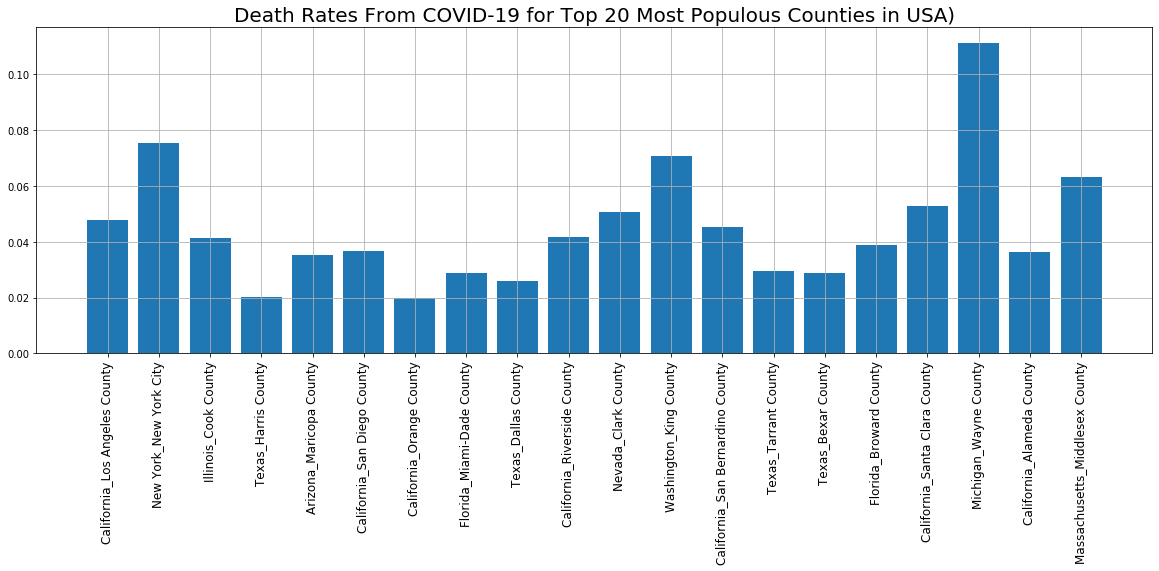

In [315]:
plt.figure(figsize=[20,6])
plt.grid()
plt.title('Death Rates From COVID-19 for Top 20 Most Populous Counties in USA)', fontsize = '20')
plt.bar(covid_data_top20_pop.State_County, covid_data_top20_pop.death_rate)

plt.xticks(covid_data_top20_pop.State_County, fontsize = '12', rotation = 90)
plt.rc('ytick', labelsize='10');

In [316]:
covid_data_latest_underperformers = covid_data_latest.sort_values(by='Diff_Pct2019Pop_VS_PctCases').head(10)
covid_data_latest_underperformers

date           county         state  cases  deaths  death_rate  \
17547  2020-05-04      Clay County       Georgia     25       3    0.120000   
16435  2020-05-04     Baker County       Georgia     26       2    0.076923   
95877  2020-05-04    Donley County         Texas     25       0    0.000000   
63025  2020-05-04    Gosper County      Nebraska     11       0    0.000000   
100109 2020-05-04   Sherman County         Texas     18       0    0.000000   
80013  2020-05-04     Greer County      Oklahoma     65       6    0.092308   
17049  2020-05-04   Calhoun County       Georgia    107       4    0.037383   
21374  2020-05-04  Randolph County       Georgia    164      19    0.115854   
75188  2020-05-04     Slope County  North Dakota      3       0    0.000000   
36523  2020-05-04    Kearny County        Kansas     21       0    0.000000   

        MedianHHInc_2018               State_County  2019EstPop  \
17547            30239.0        Georgia_Clay County      2834.0   
16435            38288.0       Georgia_Baker County      3038.0   
95877            40945.0        Texas_Donley County      3278.0   
63025            59722.0     Nebraska_Gosper County      1990.0   
100109           57052.0       Texas_Sherman County      3022.0   
80013            37445.0      Oklahoma_Greer County      5712.0   
17049            33393.0     Georgia_Calhoun County      6189.0   
21374            28298.0    Georgia_Randolph County      6778.0   
75188            49843.0  North Dakota_Slope County       750.0   
36523            63248.0       Kansas_Kearny County      3838.0   

        CasesPer100000  DeathsPer100000  Pctile_CasesPer100000  \
17547       882.145378       105.857445               0.967101   
16435       855.826201        65.832785               0.965654   
95877       762.660159         0.000000               0.959147   
63025       552.763819         0.000000               0.936732   
100109      595.632032         0.000000               0.942155   
80013      1137.955182       105.042017               0.978670   
17049      1728.873808        64.630797               0.987346   
21374      2419.592800       280.318678               0.994577   
75188       400.000000         0.000000               0.903471   
36523       547.159979         0.000000               0.935647   

        Pctile_DeathsPer100000  Pctile_2019EstPop  Diff_Pct2019Pop_VS_PctCases  
17547                 0.992769           0.022415                    -0.944685  
16435                 0.980116           0.025669                    -0.939986  
95877                 0.239516           0.028923                    -0.930224  
63025                 0.239516           0.008677                    -0.928055  
100109                0.239516           0.024946                    -0.917209  
80013                 0.992046           0.068510                    -0.910159  
17049                 0.979393           0.079899                    -0.907448  
21374                 1.000000           0.092191                    -0.902386  
75188                 0.239516           0.001446                    -0.902025  
36523                 0.239516           0.034346                    -0.901302

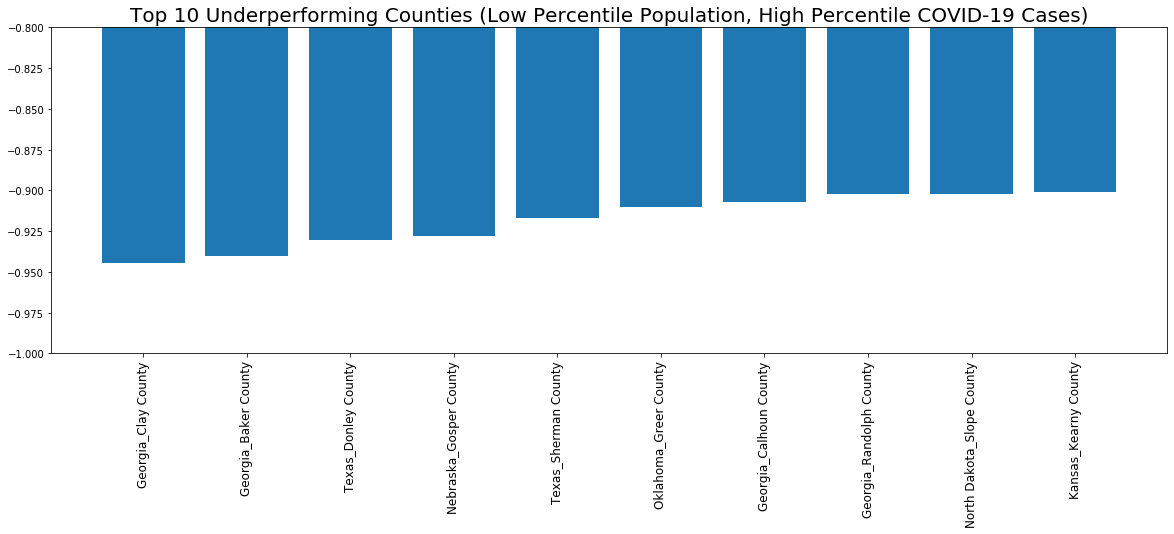

In [317]:
plt.figure(figsize=[20,6])
plt.title('Top 10 Underperforming Counties (Low Percentile Population, High Percentile COVID-19 Cases)', fontsize = '20')
plt.bar(covid_data_latest_underperformers.State_County, covid_data_latest_underperformers.Diff_Pct2019Pop_VS_PctCases)

plt.xticks(covid_data_latest_underperformers.State_County, fontsize = '12', rotation = 90)
plt.rc('ytick', labelsize='10')
plt.ylim(-1,-0.80);

In [318]:
covid_data_latest_outperformers = covid_data_latest.sort_values(by='Diff_Pct2019Pop_VS_PctCases', ascending=False).head(10)
covid_data_latest_outperformers

date             county         state  cases  deaths  death_rate  \
7178   2020-05-04       Butte County    California     17       0    0.000000   
82389  2020-05-04        Lane County        Oregon     55       2    0.036364   
6531   2020-05-04   Sebastian County      Arkansas     13       0    0.000000   
9360   2020-05-04      Shasta County    California     31       4    0.129032   
113287 2020-05-04    Marathon County     Wisconsin     19       1    0.052632   
82215  2020-05-04     Jackson County        Oregon     49       0    0.000000   
89721  2020-05-04  Pennington County  South Dakota     14       0    0.000000   
23368  2020-05-04     Bannock County         Idaho      7       0    0.000000   
23540  2020-05-04  Bonneville County         Idaho     17       0    0.000000   
114604 2020-05-04        Wood County     Wisconsin      2       0    0.000000   

        MedianHHInc_2018                    State_County  2019EstPop  \
7178             50945.0         California_Butte County    219186.0   
82389            53161.0              Oregon_Lane County    382067.0   
6531             46843.0       Arkansas_Sebastian County    127827.0   
9360             53908.0        California_Shasta County    180080.0   
113287           63442.0       Wisconsin_Marathon County    135692.0   
82215            55511.0           Oregon_Jackson County    220944.0   
89721            58738.0  South Dakota_Pennington County    113775.0   
23368            51300.0            Idaho_Bannock County     87808.0   
23540            60444.0         Idaho_Bonneville County    119062.0   
114604           55879.0           Wisconsin_Wood County     72999.0   

        CasesPer100000  DeathsPer100000  Pctile_CasesPer100000  \
7178          7.755970         0.000000               0.017354   
82389        14.395381         0.523468               0.073030   
6531         10.169995         0.000000               0.034707   
9360         17.214571         2.221235               0.093999   
113287       14.002299         0.736963               0.068691   
82215        22.177565         0.000000               0.130875   
89721        12.304988         0.000000               0.051699   
23368         7.971939         0.000000               0.019161   
23540        14.278275         0.000000               0.071222   
114604        2.739764         0.000000               0.001446   

        Pctile_DeathsPer100000  Pctile_2019EstPop  Diff_Pct2019Pop_VS_PctCases  
7178                  0.239516           0.890094                     0.872740  
82389                 0.481200           0.934201                     0.861171  
6531                  0.239516           0.823210                     0.788503  
9360                  0.565437           0.869848                     0.775850  
113287                0.486623           0.831526                     0.762834  
82215                 0.239516           0.891179                     0.760304  
89721                 0.239516           0.808749                     0.757050  
23368                 0.239516           0.766811                     0.747650  
23540                 0.239516           0.814172                     0.742950  
114604                0.239516           0.736443                     0.734996

In [319]:
plt.figure(figsize=[20,6])
plt.grid()
plt.title('Top 10 Outperforming Counties (High Percentile Population, Low Percentile Cases)', fontsize = '20')
plt.bar(covid_data_latest_outperformers.State_County, covid_data_latest_outperformers.Diff_Pct2019Pop_VS_PctCases)
plt.xticks(covid_data_latest_outperformers.State_County, fontsize = '12', rotation = 90)
plt.rc('ytick', labelsize='10')
plt.ylim(0.6,0.95);

In [323]:
covid_data_latest[covid_data_latest['state'] == 'Iowa'].sort_values(by='cases', ascending = False)

date                county state  cases  deaths  death_rate  \
34514 2020-05-04           Polk County  Iowa   1661      40    0.024082   
32313 2020-05-04     Black Hawk County  Iowa   1361      15    0.011021   
35244 2020-05-04       Woodbury County  Iowa   1152       2    0.001736   
33926 2020-05-04           Linn County  Iowa    757      47    0.062087   
34132 2020-05-04       Marshall County  Iowa    630       2    0.003175   
32934 2020-05-04         Dallas County  Iowa    578       1    0.001730   
33732 2020-05-04        Johnson County  Iowa    505       6    0.011881   
34325 2020-05-04      Muscatine County  Iowa    387      16    0.041344   
34834 2020-05-04           Tama County  Iowa    292       8    0.027397   
33958 2020-05-04         Louisa County  Iowa    277       2    0.007220   
34663 2020-05-04          Scott County  Iowa    245       7    0.028571   
33641 2020-05-04         Jasper County  Iowa    210       2    0.009524   
33095 2020-05-04        Dubuque County  Iowa    152       5    0.032895   
35080 2020-05-04     Washington County  Iowa    149       7    0.046980   
32147 2020-05-04      Allamakee County  Iowa     99       3    0.030303   
34911 2020-05-04        Unknown County  Iowa     95       0    0.000000   
34990 2020-05-04        Wapello County  Iowa     94       0    0.000000   
32882 2020-05-04       Crawford County  Iowa     78       1    0.012821   
34615 2020-05-04      Poweshiek County  Iowa     73       5    0.068493   
32384 2020-05-04         Bremer County  Iowa     55       5    0.090909   
32846 2020-05-04        Clinton County  Iowa     50       1    0.020000   
34571 2020-05-04  Pottawattamie County  Iowa     49       2    0.040816   
34790 2020-05-04          Story County  Iowa     38       1    0.026316   
33479 2020-05-04          Henry County  Iowa     34       1    0.029412   
32264 2020-05-04         Benton County  Iowa     34       1    0.029412   
32615 2020-05-04          Cedar County  Iowa     33       0    0.000000   
33269 2020-05-04        Guthrie County  Iowa     29       0    0.000000   
32351 2020-05-04          Boone County  Iowa     28       0    0.000000   
34455 2020-05-04       Plymouth County  Iowa     27       0    0.000000   
35032 2020-05-04         Warren County  Iowa     27       0    0.000000   
...          ...                   ...   ...    ...     ...         ...   
32702 2020-05-04      Chickasaw County  Iowa      5       0    0.000000   
32551 2020-05-04        Carroll County  Iowa      5       0    0.000000   
32969 2020-05-04       Delaware County  Iowa      5       1    0.200000   
33599 2020-05-04        Jackson County  Iowa      5       0    0.000000   
32223 2020-05-04        Audubon County  Iowa      5       0    0.000000   
32673 2020-05-04       Cherokee County  Iowa      4       0    0.000000   
32187 2020-05-04      Appanoose County  Iowa      4       3    0.750000   
33524 2020-05-04       Humboldt County  Iowa      4       0    0.000000   
35152 2020-05-04      Winnebago County  Iowa      3       0    0.000000   
35310 2020-05-04         Wright County  Iowa      3       0    0.000000   
33342 2020-05-04        Hancock County  Iowa      3       0    0.000000   
34197 2020-05-04       Mitchell County  Iowa      3       0    0.000000   
34163 2020-05-04          Mills County  Iowa      3       0    0.000000   
32732 2020-05-04         Clarke County  Iowa      3       0    0.000000   
33806 2020-05-04         Keokuk County  Iowa      3       0    0.000000   
34463 2020-05-04     Pocahontas County  Iowa      3       0    0.000000   
33174 2020-05-04       Franklin County  Iowa      3       0    0.000000   
33850 2020-05-04        Kossuth County  Iowa      2       0    0.000000   
32940 2020-05-04          Davis County  Iowa      2       0    0.000000   
35084 2020-05-04          Wayne County  Iowa      1       0    0.000000   
35271 2020-05-04          Worth County  Iowa      1       0    0.000000   
32497 2020-05-04        Calhoun Count

In [324]:
covid_data_IA_Louisa = covid_data[covid_data['State_County'] == 'Iowa_Louisa County'][['date', 'cases', 'deaths', '2019EstPop', 'CasesPer100000']]
covid_data_IA_Louisa.set_index('date', inplace=True)
covid_data_IA_Louisa

cases  deaths  2019EstPop  CasesPer100000
date                                                 
2020-04-03      1       0     11035.0        9.062075
2020-04-04      1       0     11035.0        9.062075
2020-04-05      6       0     11035.0       54.372451
2020-04-06      7       0     11035.0       63.434527
2020-04-07     20       0     11035.0      181.241504
2020-04-08     30       0     11035.0      271.862256
2020-04-09     41       0     11035.0      371.545084
2020-04-10     56       0     11035.0      507.476212
2020-04-11     70       0     11035.0      634.345265
2020-04-12     76       0     11035.0      688.717716
2020-04-13     79       0     11035.0      715.903942
2020-04-14    149       0     11035.0     1350.249207
2020-04-15    166       0     11035.0     1504.304486
2020-04-16    166       1     11035.0     1504.304486
2020-04-17    169       1     11035.0     1531.490711
2020-04-18    177       2     11035.0     1603.987313
2020-04-19    213       2     11035.0     1930.222021
2020-04-20    216       2     11035.0     1957.408246
2020-04-21    243       2     11035.0     2202.084277
2020-04-22    249       2     11035.0     2256.456729
2020-04-23    252       2     11035.0     2283.642954
2020-04-24    260       2     11035.0     2356.139556
2020-04-25    262       2     11035.0     2374.263706
2020-04-26    267       2     11035.0     2419.574082
2020-04-27    267       2     11035.0     2419.574082
2020-04-28    269       2     11035.0     2437.698233
2020-04-29    269       2     11035.0     2437.698233
2020-04-30    269       2     11035.0     2437.698233
2020-05-01    274       2     11035.0     2483.008609
2020-05-02    277       2     11035.0     2510.194835
2020-05-03    277       2     11035.0     2510.194835
2020-05-04    277       2     11035.0     2510.194835

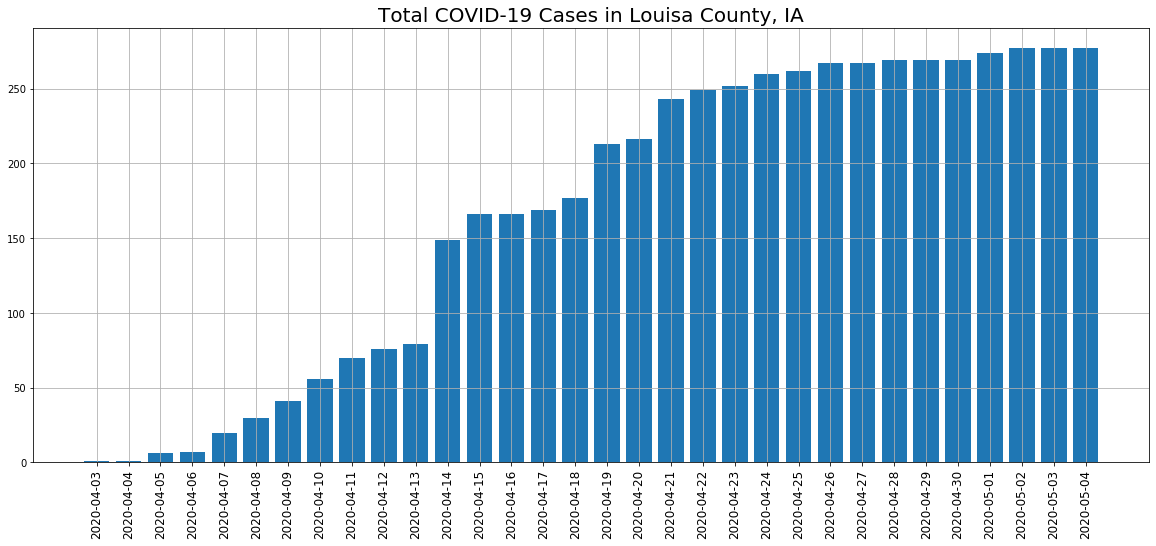

In [325]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total COVID-19 Cases in Louisa County, IA', fontsize = '20')
plt.bar(covid_data_IA_Louisa.index, covid_data_IA_Louisa.cases)

plt.xticks(covid_data_IA_Louisa.index, fontsize = '12', rotation = 90);

In [326]:
covid_data_top_counties_cases = covid_data_latest.sort_values(by='CasesPer100000',ascending=False).head(20)
covid_data_top_counties_cases

date              county       state  cases  deaths  death_rate  \
93448 2020-05-04    Trousdale County   Tennessee   1348       1    0.000742   
5640  2020-05-04      Lincoln County    Arkansas    842       4    0.004751   
62715 2020-05-04       Dakota County    Nebraska   1005       2    0.001990   
52648 2020-05-04       Nobles County   Minnesota   1011       1    0.000989   
90193 2020-05-04      Bledsoe County   Tennessee    598       0    0.000000   
69360 2020-05-04     Rockland County    New York  12095     380    0.031418   
28536 2020-05-04         Cass County     Indiana   1371       2    0.001459   
77624 2020-05-04       Marion County        Ohio   2332       4    0.001715   
78141 2020-05-04     Pickaway County        Ohio   1828      22    0.012035   
70161 2020-05-04  Westchester County    New York  30097    1220    0.040536   
68761 2020-05-04       Nassau County    New York  36965    2221    0.060084   
37548 2020-05-04       Seward County      Kansas    580       0    0.000000   
66005 2020-05-04      Passaic County  New Jersey  13496     633    0.046903   
33958 2020-05-04       Louisa County        Iowa    277       2    0.007220   
36068 2020-05-04         Ford County      Kansas    832       2    0.002404   
21374 2020-05-04     Randolph County     Georgia    164      19    0.115854   
66203 2020-05-04        Union County  New Jersey  13357     737    0.055177   
69739 2020-05-04      Suffolk County    New York  35077    1325    0.037774   
65626 2020-05-04       Hudson County  New Jersey  15881     845    0.053208   
69072 2020-05-04       Orange County    New York   9030     254    0.028128   

       MedianHHInc_2018                 State_County  2019EstPop  \
93448           49280.0   Tennessee_Trousdale County     11284.0   
5640            44951.0      Arkansas_Lincoln County     13024.0   
62715           55522.0       Nebraska_Dakota County     20026.0   
52648           55766.0      Minnesota_Nobles County     21629.0   
90193           40195.0     Tennessee_Bledsoe County     15064.0   
69360           88960.0     New York_Rockland County    325789.0   
28536           48598.0          Indiana_Cass County     37689.0   
77624           45419.0           Ohio_Marion County     65093.0   
78141           58742.0         Ohio_Pickaway County     58457.0   
70161           94521.0  New York_Westchester County    967506.0   
68761          115301.0       New York_Nassau County   1356924.0   
37548           50671.0         Kansas_Seward County     21428.0   
66005           71959.0    New Jersey_Passaic County    501826.0   
33958           49585.0           Iowa_Louisa County     11035.0   
36068           56052.0           Kansas_Ford County     33619.0   
21374           28298.0      Georgia_Randolph County      6778.0   
66203           80737.0      New Jersey_Union County    556341.0   
69739          100075.0      New York_Suffolk County   1476601.0   
65626           73337.0     New Jersey_Hudson County    672391.0   
69072           75048.0       New York_Orange County    384940.0   

       CasesPer100000  DeathsPer100000  Pctile_CasesPer100000  \
93448    11946.118398         8.862106               1.000000   
5640      6464.987715        30.712531               0.999638   
62715     5018.475981         9.987017               0.999277   
52648     4674.279902         4.623422               0.998915   
90193     3969.729156         0.000000               0.998554   
69360     3712.525592       116.639911               0.998192   
28536     3637.666163         5.306588               0.997831   
77624     3582.566482         6.145054               0.997469   
78141     3127.084866        37.634501               0.997108   
70161     3110.781742       126.097409               0.996746   
68761     2724.176151       163.679027               0.996385   
37548     2706.738846         0.000000               0.996023   
66005     2689.378390       126.139339               0.995662   
33958     251

In [328]:
plt.figure(figsize=[20,6])
plt.grid()
plt.title('Top 20 Counties by Number of COVID-19 Cases Per 100,000 People', fontsize = '20')
plt.bar(covid_data_top_counties_cases.State_County, covid_data_top_counties_cases.CasesPer100000)

# y_ticks = np.linspace(0,5500,12)
plt.xticks(covid_data_top_counties_cases.State_County, fontsize = '12', rotation = 90);
# plt.yticks(y_ticks);

In [329]:
covid_ID_Blaine = covid_data[covid_data['State_County'] == 'Idaho_Blaine County']

In [330]:
plt.figure(figsize=[20,6])
plt.grid()
plt.title('Total COVID-19 Cases in Blaine County, Idaho', fontsize = '20')
plt.bar(covid_ID_Blaine.date, covid_ID_Blaine.cases)

y_ticks = np.linspace(0,450,10)
plt.xticks(covid_ID_Blaine.date, fontsize = '12', rotation = 90)
plt.yticks(y_ticks);

In [331]:
covid_ID_Blaine_daily = covid_ID_Blaine[['date', 'cases', 'deaths']]
covid_ID_Blaine_daily.set_index('date', inplace=True)
covid_ID_Blaine_daily_new = covid_ID_Blaine_daily.diff()

In [332]:
plt.figure(figsize=[20,6])
plt.grid()
plt.title('Daily New COVID-19 Cases in Blaine County, Idaho', fontsize = '20')
plt.bar(covid_ID_Blaine_daily_new.index, covid_ID_Blaine_daily_new.cases)

y_ticks = np.linspace(0,90,10)
plt.xticks(covid_ID_Blaine_daily_new.index, fontsize = '12', rotation = 90)
plt.yticks(y_ticks);

In [333]:
# large % spike on 2020-03-19 so look at data after that
covid_ID_Blaine_pct = covid_ID_Blaine_daily[covid_ID_Blaine_daily.index > '2020-03-19'].pct_change()
covid_ID_Blaine_pct.columns = ['cases_dailypctchange', 'deaths_dailypctchange']
covid_ID_Blaine_pct

cases_dailypctchange  deaths_dailypctchange
date                                                   
2020-03-20                   NaN                    NaN
2020-03-21              0.105263                    NaN
2020-03-22              0.000000                    NaN
2020-03-23              0.000000                    NaN
2020-03-24              0.571429                    NaN
2020-03-25              0.575758                    NaN
2020-03-26              0.576923                    inf
2020-03-27              0.207317                   0.00
2020-03-28              0.151515                   0.00
2020-03-29              0.008772                   0.00
2020-03-30              0.286957                   0.00
2020-03-31              0.297297                   0.00
2020-04-01              0.380208                   0.00
2020-04-02              0.324528                   0.00
2020-04-03              0.153846                   0.00
2020-04-04              0.012346                   0.00
2020-04-05              0.000000                   0.00
2020-04-06              0.031707                   0.00
2020-04-07              0.011820                   1.00
2020-04-08              0.000000                   0.25
2020-04-09              0.042056                   0.00
2020-04-10              0.013453                   0.00
2020-04-11              0.004425                   0.00
2020-04-12              0.000000                   0.00
2020-04-13              0.008811                   0.00
2020-04-14              0.000000                   0.00
2020-04-15              0.010917                   0.00
2020-04-16              0.008639                   0.00
2020-04-17              0.004283                   0.00
2020-04-18              0.000000                   0.00
2020-04-19              0.002132                   0.00
2020-04-20              0.002128                   0.00
2020-04-21              0.004246                   0.00
2020-04-22              0.008457                   0.00
2020-04-23              0.002096                   0.00
2020-04-24              0.004184                   0.00
2020-04-25              0.002083                   0.00
2020-04-26              0.004158                   0.00
2020-04-27              0.002070                   0.00
2020-04-28              0.006198                   0.00
2020-04-29              0.002053                   0.00
2020-04-30              0.000000                   0.00
2020-05-01             -0.002049                   0.00
2020-05-02              0.000000                   0.00
2020-05-03              0.000000                   0.00
2020-05-04              0.002053                   0.00

In [334]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily Percent Change in Total COVID-19 Cases in Blaine County, Idaho', fontsize = '20')
plt.plot(covid_ID_Blaine_pct.index, covid_ID_Blaine_pct.cases_dailypctchange)

y_ticks = np.linspace(0,0.7,8)
plt.xticks(covid_ID_Blaine_pct.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [335]:
covid_data_top_counties_deaths = covid_data_latest.sort_values(by='DeathsPer100000',ascending=False).head(20)

In [336]:
covid_data_top_counties_deaths

date                       county       state   cases  deaths  \
21374 2020-05-04              Randolph County     Georgia     164      19   
21957 2020-05-04               Terrell County     Georgia     189      21   
18396 2020-05-04                 Early County     Georgia     221      24   
44119 2020-05-04  St. John the Baptist Parish   Louisiana     777      71   
68761 2020-05-04                Nassau County    New York   36965    2221   
65520 2020-05-04                 Essex County  New Jersey   14621    1292   
68826 2020-05-04                New York City    New York  175661   13207   
20572 2020-05-04              Mitchell County     Georgia     326      33   
18303 2020-05-04             Dougherty County     Georgia    1543     125   
66203 2020-05-04                 Union County  New Jersey   13357     737   
65257 2020-05-04                Bergen County  New Jersey   16282    1215   
62179 2020-05-04                 Toole County     Montana      29       6   
66005 2020-05-04               Passaic County  New Jersey   13496     633   
70161 2020-05-04           Westchester County    New York   30097    1220   
65626 2020-05-04                Hudson County  New Jersey   15881     845   
22241 2020-05-04                Turner County     Georgia      69      10   
69360 2020-05-04              Rockland County    New York   12095     380   
22828 2020-05-04                Wilcox County     Georgia      90      10   
43586 2020-05-04               Orleans Parish   Louisiana    6557     447   
50823 2020-05-04                 Wayne County    Michigan   17314    1924   

       death_rate  MedianHHInc_2018                           State_County  \
21374    0.115854           28298.0                Georgia_Randolph County   
21957    0.111111           35290.0                 Georgia_Terrell County   
18396    0.108597           34984.0                   Georgia_Early County   
44119    0.091377           50830.0  Louisiana_St. John the Baptist Parish   
68761    0.060084          115301.0                 New York_Nassau County   
65520    0.088366           62875.0                New Jersey_Essex County   
68826    0.075185               NaN                 New York_New York City   
20572    0.101227           36788.0                Georgia_Mitchell County   
18303    0.081011           38806.0               Georgia_Dougherty County   
66203    0.055177           80737.0                New Jersey_Union County   
65257    0.074622          100181.0               New Jersey_Bergen County   
62179    0.206897           46326.0                   Montana_Toole County   
66005    0.046903           71959.0              New Jersey_Passaic County   
70161    0.040536           94521.0            New York_Westchester County   
65626    0.053208           73337.0               New Jersey_Hudson County   
22241    0.144928           33261.0                  Georgia_Turner County   
69360    0.031418           88960.0               New York_Rockland County   
22828    0.111111           35961.0                  Georgia_Wilcox County   
43586    0.068171           38855.0               Louisiana_Orleans Parish   
50823    0.111124           46440.0                  Michigan_Wayne County   

       2019EstPop  CasesPer100000  DeathsPer100000  Pctile_CasesPer100000  \
21374      6778.0     2419.592800       280.318678               0.994577   
21957      8531.0     2215.449537       246.161060               0.992046   
18396     10190.0     2168.792934       235.525025               0.991685   
44119     42837.0     1813.852511       165.744567               0.989154   
68761   1356924.0     2724.176151       163.679027               0.996385   
65520    798975.0     1829.969649       161.707187               0.989516   
68826   8336817.0     2107.051168       158.417775               0.990962   
20572     21863.0     1491.103691       150.939944               0.984816   
18303     87956.0     1754.286234       142.116513            

In [337]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Top 20 Counties by Number of COVID-19 Deaths Per 100,000 People', fontsize = '20')
plt.bar(covid_data_top_counties_deaths.State_County, covid_data_top_counties_deaths.DeathsPer100000)
plt.xticks(covid_data_top_counties_deaths.State_County, fontsize = '12', rotation = 90);

In [587]:
# Counties with at least 25 deaths, death rate at least 5.0%
covid_data_highdeathsandrate = covid_data_latest[covid_data_latest['deaths'] > 25][covid_data_latest['death_rate'] > 0.05]
covid_data_highdeathsandrate = covid_data_highdeathsandrate.sort_values(by = 'death_rate', ascending = False)
covid_data_highdeathsandrate.reset_index(drop=True, inplace=True)
covid_data_highdeathsandrate

C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


date                       county           state  cases  deaths  \
0   2020-05-04               Unknown County        Maryland      0      55   
1   2020-05-04            St. Landry County       Louisiana    191      45   
2   2020-05-04                 Wayne County            Ohio    161      33   
3   2020-05-04                 Miami County            Ohio    144      27   
4   2020-05-04               Portage County            Ohio    251      42   
5   2020-05-04                Lapeer County        Michigan    171      27   
6   2020-05-04                Beaver County    Pennsylvania    458      68   
7   2020-05-04               Decatur County         Indiana    202      28   
8   2020-05-04              Franklin County   Massachusetts    273      37   
9   2020-05-04                 Stark County            Ohio    405      53   
10  2020-05-04             Middlesex County     Connecticut    713      93   
11  2020-05-04              Hartford County     Connecticut   6173     773   
12  2020-05-04              Hennepin County       Minnesota   2298     284   
13  2020-05-04              Sarasota County         Florida    385      47   
14  2020-05-04               Genesee County        Michigan   1647     199   
15  2020-05-04                Sussex County      New Jersey    979     116   
16  2020-05-04               Madison County         Indiana    450      53   
17  2020-05-04               Carroll County        Maryland    506      59   
18  2020-05-04                Macomb County        Michigan   5736     643   
19  2020-05-04                 Wayne County        Michigan  17314    1924   
20  2020-05-04               Henrico County        Virginia    964     105   
21  2020-05-04               Oakland County        Michigan   7499     762   
22  2020-05-04              Mitchell County         Georgia    326      33   
23  2020-05-04               Johnson County         Indiana    718      72   
24  2020-05-04             Lancaster County    Pennsylvania   1991     198   
25  2020-05-04               Hampden County   Massachusetts   4114     408   
26  2020-05-04               Saginaw County        Michigan    728      68   
27  2020-05-04               Manatee County         Florida    636      59   
28  2020-05-04  St. John the Baptist Parish       Louisiana    777      71   
29  2020-05-04                Bartow County         Georgia    341      31   
..         ...                          ...             ...    ...     ...   
108 2020-05-04                Marion County         Indiana   6327     363   
109 2020-05-04                Sumner County       Tennessee    663      38   
110 2020-05-04              Arapahoe County        Colorado   2758     157   
111 2020-05-04              Hamilton County            Ohio   1434      80   
112 2020-05-04                Mercer County      New Jersey   4594     256   
113 2020-05-04             Hunterdon County      New Jersey    665      37   
114 2020-05-04                 Union County      New Jersey  13357     737   
115 2020-05-04                  Will County        Illinois   3066     169   
116 2020-05-04                  Cobb County         Georgia   1839     101   
117 2020-05-04               St. Louis city        Missouri   1304      71   
118 2020-05-04                Mobile County         Alabama   1222      66   
119 2020-05-04                  Weld County        Colorado   1897     102   
120 2020-05-04              Pinellas County         Florida    784      42   
121 2020-05-04            Greenville County  South Carolina    788      42   
122 2020-05-04                Hudson County      New Jersey  15881     845   
123 2020-05-04                 Tulsa County        Oklahoma    639      34   
124 2020-05-04             Frederick County        Maryland   1038      55   
125 2020-05-04             Hendricks County         Indiana    774      41   
126 2020-05-04                Tulare County      California    757      40   
127 2020-05-04           Santa C

In [341]:
covid_data_VA_Henrico = covid_data[covid_data['State_County'] == 'Virginia_Henrico County'][covid_data['date'] > '2020-03-24'][['date', 'cases', 'deaths']]
covid_data_VA_Henrico.set_index('date', inplace=True)
covid_data_VA_Henrico['death_rate'] = covid_data_VA_Henrico['deaths'] / covid_data_VA_Henrico['cases']
covid_data_VA_Henrico

C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


cases  deaths  death_rate
date                                 
2020-03-25     20       2    0.100000
2020-03-26     28       3    0.107143
2020-03-27     28       3    0.107143
2020-03-28     31       3    0.096774
2020-03-29     40       3    0.075000
2020-03-30     44       3    0.068182
2020-03-31     62       3    0.048387
2020-04-01     78       3    0.038462
2020-04-02     87       3    0.034483
2020-04-03    112      16    0.142857
2020-04-04    174      16    0.091954
2020-04-05    194      16    0.082474
2020-04-06    207      16    0.077295
2020-04-07    267      16    0.059925
2020-04-08    291      33    0.113402
2020-04-09    319      35    0.109718
2020-04-10    342      35    0.102339
2020-04-11    368      35    0.095109
2020-04-12    379      35    0.092348
2020-04-13    397      45    0.113350
2020-04-14    432      45    0.104167
2020-04-15    453      45    0.099338
2020-04-16    497      45    0.090543
2020-04-17    532      45    0.084586
2020-04-18    559      45    0.080501
2020-04-19    584      71    0.121575
2020-04-20    598      71    0.118729
2020-04-21    621      77    0.123994
2020-04-22    684      82    0.119883
2020-04-23    718      83    0.115599
2020-04-24    729      86    0.117970
2020-04-25    764      89    0.116492
2020-04-26    792      89    0.112374
2020-04-27    817      89    0.108935
2020-04-28    835      95    0.113772
2020-04-29    846      98    0.115839
2020-04-30    876     100    0.114155
2020-05-01    898     102    0.113586
2020-05-02    926     104    0.112311
2020-05-03    954     105    0.110063
2020-05-04    964     105    0.108921

In [343]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Death Rate of COVID-19 Cases in Henrico County in Virginia', fontsize = '20')
plt.plot(covid_data_VA_Henrico.index, covid_data_VA_Henrico.death_rate)

y_ticks = np.linspace(0,0.16,9)
plt.xticks(covid_data_VA_Henrico.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [344]:
covid_data_USdeathrate = covid_data_latest.groupby('state')['cases', 'deaths', '2019EstPop'].sum()
covid_data_USdeathrate['death_rate'] = covid_data_USdeathrate['deaths'] / covid_data_USdeathrate['cases']
covid_data_USdeathrate = covid_data_USdeathrate.sort_values(by='death_rate', ascending=False)
covid_data_USdeathrate.reset_index(inplace=True)

In [345]:
covid_data_USdeathrate.describe()

cases        deaths    2019EstPop  death_rate
count      55.000000     55.000000  5.500000e+01   55.000000
mean    21464.127273   1149.327273  5.874479e+06    0.042723
std     46816.711858   2866.372298  7.280496e+06    0.022470
min        14.000000      2.000000  0.000000e+00    0.005386
25%      2628.000000     60.500000  1.351962e+06    0.031086
50%      7234.000000    267.000000  3.565287e+06    0.040775
75%     20490.500000    985.000000  6.855004e+06    0.052778
max    318984.000000  19415.000000  3.945752e+07    0.142857

In [346]:
US_totaldeaths = sum(list(covid_data_USdeathrate.deaths))
US_totalcases = sum(list(covid_data_USdeathrate.cases))
US_deathrate = US_totaldeaths / US_totalcases
US_deathrate

0.053546424605282215

In [348]:
covid_data_USdeathrate['USA_death_rate'] = US_deathrate
covid_data_USdeathrate['Diff_USAdeathrate'] = covid_data_USdeathrate['death_rate'] - covid_data_USdeathrate['USA_death_rate']
covid_data_USdeathrate['CasesPer100000'] = covid_data_USdeathrate['cases'] / (covid_data_USdeathrate['2019EstPop'] / 100000)
covid_data_USdeathrate.replace(np.inf, np.nan, inplace=True)
covid_data_USdeathrate = covid_data_USdeathrate[~covid_data_USdeathrate['CasesPer100000'].isnull()]
covid_data_USdeathrate

state   cases  deaths  2019EstPop  death_rate  \
1               Michigan   43928    4135   9958847.0    0.094131   
2            Connecticut   29973    2556   3565287.0    0.085277   
3              Louisiana   29673    1991   2826229.0    0.067098   
4             New Jersey  128269    7910   8882190.0    0.061667   
5               New York  318984   19415  19453561.0    0.060865   
7          Massachusetts   69087    4090   6892503.0    0.059201   
8              Minnesota    7234     428   5577243.0    0.059165   
9               Oklahoma    4044     238   3917186.0    0.058853   
10               Vermont     902      53    623989.0    0.058758   
11               Indiana   20507    1151   6732219.0    0.056127   
12          Pennsylvania   52992    2880  12801989.0    0.054348   
13            Washington   15673     846   7612668.0    0.053978   
14                  Ohio   20474    1056  11689100.0    0.051578   
15              Colorado   16799     849   5735294.0    0.050539   
16  District of Columbia    5170     258    705749.0    0.049903   
17              Kentucky    5363     267   4365179.0    0.049786   
18                 Maine    1205      57   1344212.0    0.047303   
19                Nevada    5627     266   3005307.0    0.047272   
20              Maryland   26408    1216   6045680.0    0.046047   
21              Missouri    8776     387   6444969.0    0.044098   
22               Georgia   28350    1228  10614452.0    0.043316   
23        South Carolina    6757     283   5148714.0    0.041882   
24              Illinois   63840    2673  12633398.0    0.041870   
25             Wisconsin    8236     340   5751197.0    0.041282   
26         West Virginia    1225      50   1767077.0    0.040816   
27            California   56333    2297  39457519.0    0.040775   
28               Arizona    8919     362   7278717.0    0.040588   
29                Oregon    2759     109   4190500.0    0.039507   
30           Mississippi    7877     310   2974822.0    0.039355   
31            New Mexico    4031     156   2088110.0    0.038700   
32        North Carolina   11871     454  10470527.0    0.038244   
33               Florida   36889    1398  21477737.0    0.037897   
34               Alabama    8112     298   4903185.0    0.036736   
35          Rhode Island    9652     341   1059361.0    0.035329   
36              Virginia   19492     684   6554569.0    0.035091   
37               Montana     457      16    960560.0    0.035011   
38              Delaware    5288     182    973764.0    0.034418   
39         New Hampshire    2588      86   1359711.0    0.033230   
40                 Idaho    1947      64   1704241.0    0.032871   
42                Kansas    5365     154   2823099.0    0.028705   
43                Hawaii     612      17   1415786.0    0.027778   
44                 Texas   33131     914  28843119.0    0.027587   
45              Arkansas    3469      80   3000356.0    0.023061   
46          North Dakota    1225      25    700686.0    0.020408   
47                  Iowa    9703     188   3098190.0    0.019375   
48                Alaska     368       7    416823.0    0.019022   
49             Tennessee   13343     225   6817506.0    0.016863   
50               Wyoming     444       7    563439.0    0.015766   
51              Nebraska    6125      79   1869118.0    0.012898   
52                  Utah    5326      50   3191625.0    0.009388   
53          South Dakota    2668      21    809042.0    0.007871   

    USA_death_rate  Diff_USAdeathrate  CasesPer100000  
1         0.053546           0.040585      441.095239  
2         0.053546           0.031730      840.689684  
3         0.053546           0.013552     1049.914922  
4         0.053546           0.008121     1444.114571  
5         0.053546           0.007319     1639.720358  
7         0.053546           0.005654     1002.349945  
8         0.053546           0.005619      129.705663  
9         0.053546           0.005

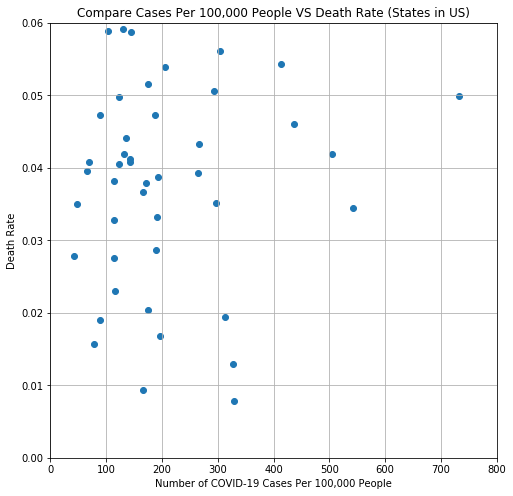

In [349]:
plt.figure(figsize=[8,8])
plt.grid()
plt.title('Compare Cases Per 100,000 People VS Death Rate (States in US)')
plt.scatter(covid_data_USdeathrate.CasesPer100000,covid_data_USdeathrate.death_rate)
plt.xlim(0,800)
plt.ylim(0,0.06)
plt.xlabel('Number of COVID-19 Cases Per 100,000 People')
plt.ylabel('Death Rate');

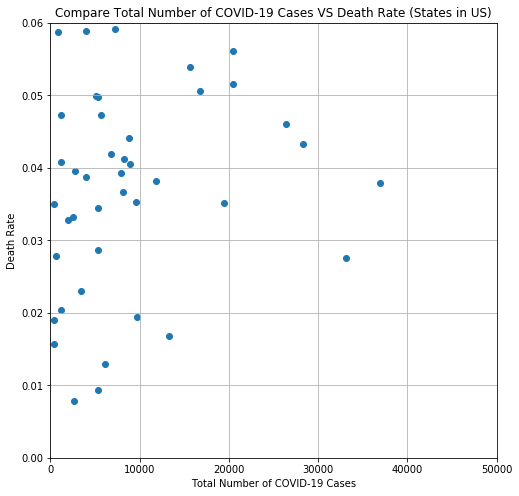

In [350]:
plt.figure(figsize=[8,8])
plt.grid()
plt.title('Compare Total Number of COVID-19 Cases VS Death Rate (States in US)')
plt.scatter(covid_data_USdeathrate.cases,covid_data_USdeathrate.death_rate)
plt.xlim(0,50000)
plt.ylim(0,0.06)
plt.xlabel('Total Number of COVID-19 Cases')
plt.ylabel('Death Rate');

In [351]:
covid_data_latest[covid_data_latest['state'] == 'Kentucky'].sort_values(by='death_rate', ascending=False)

date               county     state  cases  deaths  death_rate  \
38642 2020-05-04      Carlisle County  Kentucky      2       1    0.500000   
38150 2020-05-04          Bath County  Kentucky      4       1    0.250000   
38909 2020-05-04    Crittenden County  Kentucky      4       1    0.250000   
40343 2020-05-04          Lyon County  Kentucky     13       3    0.230769   
40230 2020-05-04       Lincoln County  Kentucky      5       1    0.200000   
41391 2020-05-04       Russell County  Kentucky     16       3    0.187500   
37966 2020-05-04         Adair County  Kentucky     81      13    0.160494   
41215 2020-05-04          Pike County  Kentucky     13       2    0.153846   
39755 2020-05-04       Jackson County  Kentucky     59       8    0.135593   
39293 2020-05-04         Grant County  Kentucky     25       3    0.120000   
40065 2020-05-04        Laurel County  Kentucky     17       2    0.117647   
38055 2020-05-04      Anderson County  Kentucky      9       1    0.111111   
38242 2020-05-04       Bourbon County  Kentucky      9       1    0.111111   
39728 2020-05-04       Hopkins County  Kentucky    207      23    0.111111   
39328 2020-05-04        Graves County  Kentucky    141      14    0.099291   
38279 2020-05-04          Boyd County  Kentucky     31       3    0.096774   
41476 2020-05-04        Shelby County  Kentucky     32       3    0.093750   
38630 2020-05-04      Campbell County  Kentucky     97       9    0.092784   
39935 2020-05-04        Kenton County  Kentucky    317      24    0.075710   
41518 2020-05-04       Simpson County  Kentucky     28       2    0.071429   
40294 2020-05-04         Logan County  Kentucky     14       1    0.071429   
39813 2020-05-04     Jefferson County  Kentucky   1419     101    0.071177   
40688 2020-05-04         Meade County  Kentucky     15       1    0.066667   
39369 2020-05-04       Grayson County  Kentucky     84       5    0.059524   
41297 2020-05-04       Pulaski County  Kentucky     43       2    0.046512   
38778 2020-05-04     Christian County  Kentucky     90       3    0.033333   
40388 2020-05-04       Madison County  Kentucky     30       1    0.033333   
40584 2020-05-04     McCracken County  Kentucky     62       2    0.032258   
39084 2020-05-04       Fayette County  Kentucky    295       9    0.030508   
38514 2020-05-04        Butler County  Kentucky    167       5    0.029940   
...          ...                  ...       ...    ...     ...         ...   
38680 2020-05-04       Carroll County  Kentucky      2       0    0.000000   
38545 2020-05-04      Caldwell County  Kentucky     12       0    0.000000   
38437 2020-05-04  Breckinridge County  Kentucky      9       0    0.000000   
38399 2020-05-04     Breathitt County  Kentucky      3       0    0.000000   
38355 2020-05-04       Bracken County  Kentucky      9       0    0.000000   
38317 2020-05-04         Boyle County  Kentucky     19       0    0.000000   
38117 2020-05-04        Barren County  Kentucky     20       0    0.000000   
38082 2020-05-04       Ballard County  Kentucky      8       0    0.000000   
39194 2020-05-04      Franklin County  Kentucky     17       0    0.000000   
39234 2020-05-04      Gallatin County  Kentucky      1       0    0.000000   
40424 2020-05-04        Marion County  Kentucky     17       0    0.000000   
39255 2020-05-04       Garrard County  Kentucky      2       0    0.000000   
40251 2020-05-04    Livingston County  Kentucky      6       0    0.000000   
40197 2020-05-04         Lewis County  Kentucky      3       0    0.000000   
40160 2020-05-04       Letcher County  Kentucky      3       0    0.000000   
40130 2020-05-04        Leslie County  Kentucky      4       0    0.000000   
40100 2020-05-04      Lawrence County  Kentucky      1       0    0.000000   
40024 2020-05-04         Larue County  Kentucky      5       0    0.000000   
38010 2020-05-04         Allen County  Kentucky     14       0    0.000000   
39959 2020-05-04         Knott Cou

In [352]:
covid_data_latest[covid_data_latest['state'] == 'Oklahoma'].sort_values(by='deaths', ascending=False)

date               county     state  cases  deaths  death_rate  \
81535 2020-05-04         Tulsa County  Oklahoma    639      34    0.053208   
80900 2020-05-04      Oklahoma County  Oklahoma    841      33    0.039239   
79544 2020-05-04     Cleveland County  Oklahoma    436      29    0.066514   
81624 2020-05-04    Washington County  Oklahoma    276      23    0.083333   
81577 2020-05-04       Wagoner County  Oklahoma    122      15    0.122951   
79789 2020-05-04      Delaware County  Oklahoma     91      13    0.142857   
79310 2020-05-04         Caddo County  Oklahoma     72       8    0.111111   
80981 2020-05-04         Osage County  Oklahoma     78       8    0.102564   
80201 2020-05-04           Kay County  Oklahoma     47       7    0.148936   
80013 2020-05-04         Greer County  Oklahoma     65       6    0.092308   
80740 2020-05-04      Muskogee County  Oklahoma     27       6    0.222222   
79701 2020-05-04         Creek County  Oklahoma     80       6    0.075000   
81289 2020-05-04        Rogers County  Oklahoma     67       4    0.059701   
81244 2020-05-04  Pottawatomie County  Oklahoma     52       4    0.076923   
80569 2020-05-04         Mayes County  Oklahoma     24       4    0.166667   
81366 2020-05-04      Sequoyah County  Oklahoma     12       3    0.250000   
79110 2020-05-04         Adair County  Oklahoma     65       3    0.046154   
79360 2020-05-04      Canadian County  Oklahoma    102       3    0.029412   
81203 2020-05-04      Pontotoc County  Oklahoma     10       2    0.200000   
81160 2020-05-04     Pittsburg County  Oklahoma     38       2    0.052632   
80616 2020-05-04       McClain County  Oklahoma     77       2    0.025974   
81070 2020-05-04        Pawnee County  Oklahoma     29       2    0.068966   
79947 2020-05-04         Grady County  Oklahoma     40       2    0.050000   
81326 2020-05-04      Seminole County  Oklahoma     12       2    0.166667   
79584 2020-05-04      Comanche County  Oklahoma    102       2    0.019608   
81444 2020-05-04         Texas County  Oklahoma    236       2    0.008475   
79900 2020-05-04        Garvin County  Oklahoma     14       1    0.071429   
79854 2020-05-04      Garfield County  Oklahoma     19       1    0.052632   
79271 2020-05-04         Bryan County  Oklahoma      9       1    0.111111   
79401 2020-05-04        Carter County  Oklahoma      4       1    0.250000   
...          ...                  ...       ...    ...     ...         ...   
81252 2020-05-04    Pushmataha County  Oklahoma      1       0    0.000000   
81644 2020-05-04         Woods County  Oklahoma      3       0    0.000000   
80847 2020-05-04      Okfuskee County  Oklahoma      1       0    0.000000   
80822 2020-05-04        Nowata County  Oklahoma     21       0    0.000000   
80784 2020-05-04         Noble County  Oklahoma      6       0    0.000000   
80344 2020-05-04      Le Flore County  Oklahoma     13       0    0.000000   
80696 2020-05-04        Murray County  Oklahoma      2       0    0.000000   
80671 2020-05-04      McIntosh County  Oklahoma      3       0    0.000000   
79165 2020-05-04         Atoka County  Oklahoma      1       0    0.000000   
79193 2020-05-04        Beaver County  Oklahoma     14       0    0.000000   
79229 2020-05-04       Beckham County  Oklahoma      6       0    0.000000   
79230 2020-05-04        Blaine County  Oklahoma      1       0    0.000000   
79479 2020-05-04       Choctaw County  Oklahoma      3       0    0.000000   
79493 2020-05-04      Cimarron County  Oklahoma      1       0    0.000000   
79660 2020-05-04         Craig County  Oklahoma     12       0    0.000000   
79748 2020-05-04        Custer County  Oklahoma     11       0    0.000000   
79817 2020-05-04         Dewey County  Oklahoma      2       0    0.000000   
79979 2020-05-04         Grant County  Oklahoma      2       0    0.000000   
80030 2020-05-04        Harper County  Oklahoma      1       0    0.000000   
80048 2020-05-04       Haskell Cou

In [353]:
covid_data_latest.sort_values(by='death_rate', ascending=False)

date                  county           state  cases  deaths  \
102245 2020-05-04          Unknown County            Utah      0       2   
63987  2020-05-04          Unknown County        Nebraska      0       1   
46602  2020-05-04          Unknown County        Maryland      0      55   
64546  2020-05-04          Unknown County          Nevada      0       2   
67378  2020-05-04          Unknown County      New Mexico      0       6   
9673   2020-05-04           Tehama County      California      1       1   
74522  2020-05-04           Emmons County    North Dakota      1       1   
74674  2020-05-04          McHenry County    North Dakota      1       1   
66395  2020-05-04           Catron County      New Mexico      1       1   
85783  2020-05-04           Warren County    Pennsylvania      1       1   
32187  2020-05-04        Appanoose County            Iowa      4       3   
48363  2020-05-04        Dickinson County        Michigan      3       2   
95502  2020-05-04           Crosby County           Texas      2       1   
111106 2020-05-04            Mingo County   West Virginia      2       1   
38642  2020-05-04         Carlisle County        Kentucky      2       1   
112929 2020-05-04             Iron County       Wisconsin      2       1   
62906  2020-05-04         Fillmore County        Nebraska      2       1   
5590   2020-05-04              Lee County        Arkansas      3       1   
112050 2020-05-04         Bayfield County       Wisconsin      3       1   
58043  2020-05-04           Carter County        Missouri      3       1   
35785  2020-05-04           Cowley County          Kansas      3       1   
80499  2020-05-04            Major County        Oklahoma      3       1   
99372  2020-05-04           Oldham County           Texas      3       1   
113362 2020-05-04        Marquette County       Wisconsin      3       1   
52482  2020-05-04       Mille Lacs County       Minnesota      3       1   
72444  2020-05-04            Macon County  North Carolina      3       1   
64199  2020-05-04        Churchill County          Nevada      3       1   
95321  2020-05-04         Comanche County           Texas      3       1   
28728  2020-05-04          Daviess County         Indiana     52      15   
24261  2020-05-04        Nez Perce County           Idaho     65      18   
...           ...                     ...             ...    ...     ...   
52173  2020-05-04    Lac qui Parle County       Minnesota      2       0   
53399  2020-05-04           Steele County       Minnesota     24       0   
53450  2020-05-04             Todd County       Minnesota     15       0   
57526  2020-05-04         Atchison County        Missouri      2       0   
56474  2020-05-04          Quitman County     Mississippi     16       0   
57487  2020-05-04           Andrew County        Missouri      6       0   
57463  2020-05-04            Adair County        Missouri     12       0   
57373  2020-05-04        Yalobusha County     Mississippi     20       0   
57333  2020-05-04          Winston County     Mississippi     49       0   
57195  2020-05-04            Wayne County     Mississippi     24       0   
57080  2020-05-04         Walthall County     Mississippi     33       0   
56939  2020-05-04       Tishomingo County     Mississippi      8       0   
56858  2020-05-04             Tate County     Mississippi     45       0   
56727  2020-05-04            Stone County     Mississippi     22       0   
56651  2020-05-04          Simpson County     Mississippi     49       0   
56606  2020-05-04          Sharkey County     Mississippi      5       0   
56071  2020-05-04           Newton County     Mississippi     93       0   
53485  2020-05-04         Traverse County       Minnesota      2       0   
55525  2020-05-04         Lawrence County     Mississippi     53       0   
55238  2020-05-04        Jefferson County     Mississippi     23       0   
54560  2020-05-04        Covington County     Mississippi    

In [354]:
covid_data_LA_StJohn = covid_data[covid_data['State_County'] == 'Louisiana_St. John the Baptist Parish'][covid_data['date'] > '2020-03-24'][['date', 'cases', 'deaths']]
covid_data_LA_StJohn.set_index('date', inplace=True)
covid_data_LA_StJohn['death_rate'] = covid_data_LA_StJohn['deaths'] / covid_data_LA_StJohn['cases']
covid_data_LA_StJohn

C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


cases  deaths  death_rate
date                                 
2020-03-25     27       2    0.074074
2020-03-26     38       2    0.052632
2020-03-27     41       3    0.073171
2020-03-28     54       3    0.055556
2020-03-29     57       5    0.087719
2020-03-30     75       8    0.106667
2020-03-31    104      12    0.115385
2020-04-01    118      13    0.110169
2020-04-02    274      14    0.051095
2020-04-03    290      17    0.058621
2020-04-04    338      23    0.068047
2020-04-05    345      24    0.069565
2020-04-06    366      24    0.065574
2020-04-07    415      34    0.081928
2020-04-08    432      35    0.081019
2020-04-09    477      35    0.073375
2020-04-10    507      37    0.072978
2020-04-11    538      38    0.070632
2020-04-12    545      38    0.069725
2020-04-13    556      40    0.071942
2020-04-14    562      48    0.085409
2020-04-15    569      47    0.082601
2020-04-16    609      47    0.077176
2020-04-17    623      50    0.080257
2020-04-18    637      53    0.083203
2020-04-19    642      53    0.082555
2020-04-20    669      53    0.079223
2020-04-21    686      57    0.083090
2020-04-22    704      57    0.080966
2020-04-23    721      59    0.081831
2020-04-24    736      63    0.085598
2020-04-25    747      64    0.085676
2020-04-26    749      64    0.085447
2020-04-27    751      64    0.085220
2020-04-28    758      66    0.087071
2020-04-29    765      68    0.088889
2020-04-30    768      69    0.089844
2020-05-01    771      71    0.092088
2020-05-02    772      71    0.091969
2020-05-03    772      71    0.091969
2020-05-04    777      71    0.091377

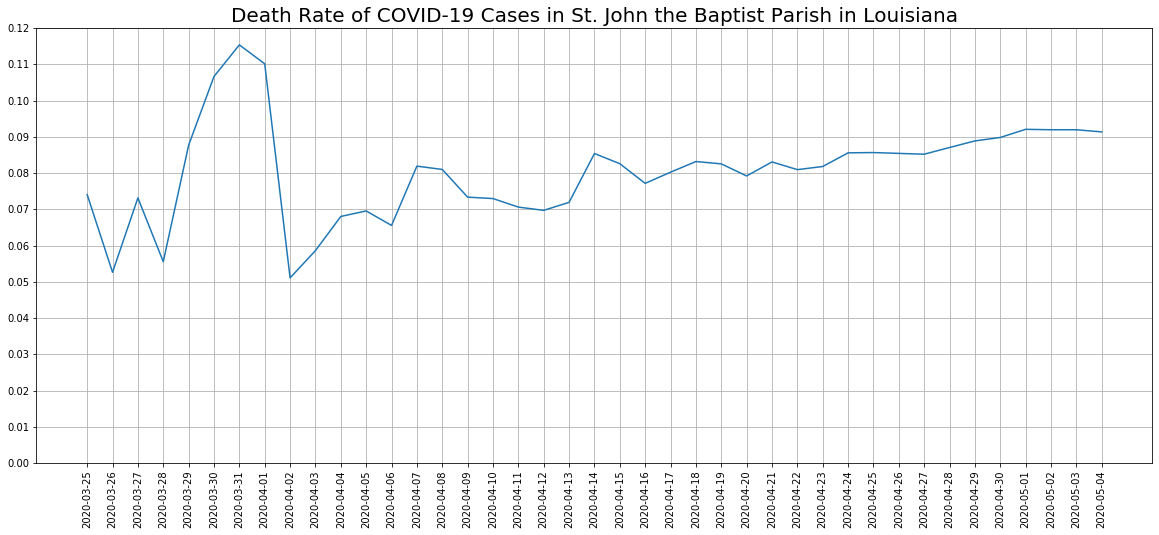

In [355]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Death Rate of COVID-19 Cases in St. John the Baptist Parish in Louisiana', fontsize = '20')
plt.plot(covid_data_LA_StJohn.index, covid_data_LA_StJohn.death_rate)

y_ticks = np.linspace(0,0.12,13)
plt.xticks(covid_data_LA_StJohn.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [356]:
covid_data_LA_StJohn.describe()

cases     deaths  death_rate
count   41.000000  41.000000   41.000000
mean   497.195122  40.804878    0.080520
std    259.090449  23.227376    0.013641
min     27.000000   2.000000    0.051095
25%    338.000000  23.000000    0.072978
50%    562.000000  47.000000    0.081928
75%    736.000000  63.000000    0.087071
max    777.000000  71.000000    0.115385

In [357]:
covid_data_latest_98pct = covid_data_latest[covid_data_latest['Pctile_CasesPer100000'] 
                                            > 0.98][covid_data_latest['Pctile_DeathsPer100000'] 
                                                    > 0.98].sort_values(by='Pctile_CasesPer100000', ascending=False)
covid_data_latest_98pct

C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


date                       county          state   cases  deaths  \
69360 2020-05-04              Rockland County       New York   12095     380   
70161 2020-05-04           Westchester County       New York   30097    1220   
68761 2020-05-04                Nassau County       New York   36965    2221   
66005 2020-05-04               Passaic County     New Jersey   13496     633   
21374 2020-05-04              Randolph County        Georgia     164      19   
66203 2020-05-04                 Union County     New Jersey   13357     737   
69739 2020-05-04               Suffolk County       New York   35077    1325   
65626 2020-05-04                Hudson County     New Jersey   15881     845   
69072 2020-05-04                Orange County       New York    9030     254   
21957 2020-05-04               Terrell County        Georgia     189      21   
18396 2020-05-04                 Early County        Georgia     221      24   
68826 2020-05-04                New York City       New York  175661   13207   
65520 2020-05-04                 Essex County     New Jersey   14621    1292   
44119 2020-05-04  St. John the Baptist Parish      Louisiana     777      71   
18303 2020-05-04             Dougherty County        Georgia    1543     125   
65257 2020-05-04                Bergen County     New Jersey   16282    1215   
47461 2020-05-04               Suffolk County  Massachusetts   13941     596   
43586 2020-05-04               Orleans Parish      Louisiana    6557     447   
65783 2020-05-04             Middlesex County     New Jersey   12768     642   
20572 2020-05-04              Mitchell County        Georgia     326      33   
43140 2020-05-04             Jefferson Parish      Louisiana    6426     377   
11721 2020-05-04                Morgan County       Colorado     413      20   
21752 2020-05-04                Sumter County        Georgia     391      29   
12556 2020-05-04             Fairfield County    Connecticut   12245     910   
65728 2020-05-04                Mercer County     New Jersey    4594     256   
44067 2020-05-04             St. James Parish      Louisiana     253      20   

       death_rate  MedianHHInc_2018                           State_County  \
69360    0.031418           88960.0               New York_Rockland County   
70161    0.040536           94521.0            New York_Westchester County   
68761    0.060084          115301.0                 New York_Nassau County   
66005    0.046903           71959.0              New Jersey_Passaic County   
21374    0.115854           28298.0                Georgia_Randolph County   
66203    0.055177           80737.0                New Jersey_Union County   
69739    0.037774          100075.0                New York_Suffolk County   
65626    0.053208           73337.0               New Jersey_Hudson County   
69072    0.028128           75048.0                 New York_Orange County   
21957    0.111111           35290.0                 Georgia_Terrell County   
18396    0.108597           34984.0                   Georgia_Early County   
68826    0.075185               NaN                 New York_New York City   
65520    0.088366           62875.0                New Jersey_Essex County   
44119    0.091377           50830.0  Louisiana_St. John the Baptist Parish   
18303    0.081011           38806.0               Georgia_Dougherty County   
65257    0.074622          100181.0               New Jersey_Bergen County   
47461    0.042752           68743.0           Massachusetts_Suffolk County   
43586    0.068171           38855.0               Louisiana_Orleans Parish   
65783    0.050282           87666.0            New Jersey_Middlesex County   
20572    0.101227           36788.0                Georgia_Mitchell County   
43140    0.058668           50871.0             Louisiana_Jefferson Parish   
11721    0.048426           55387.0                 Colorado_Morgan County   
21752    0.074169           37562.0                  Geor

In [358]:
covid_data_latest_98pct['state'].value_counts()

New Jersey       7
New York         6
Georgia          6
Louisiana        4
Connecticut      1
Colorado         1
Massachusetts    1
Name: state, dtype: int64

In [359]:
covid_data_latest.describe()

cases        deaths   death_rate  MedianHHInc_2018  \
count    2885.000000   2885.000000  2885.000000       2856.000000   
mean      409.194801     21.910919          inf      53153.494398   
std      3770.499936    266.242500          NaN      14138.748751   
min         0.000000      0.000000     0.000000      25385.000000   
25%         6.000000      0.000000     0.000000      43773.750000   
50%        25.000000      1.000000     0.010574      50828.000000   
75%       111.000000      4.000000     0.050459      59344.000000   
max    175661.000000  13207.000000          inf     140382.000000   

         2019EstPop  CasesPer100000  DeathsPer100000  Pctile_CasesPer100000  \
count  2.766000e+03     2766.000000      2766.000000            2766.000000   
mean   1.168100e+05      187.200538         7.409760               0.500181   
std    3.796688e+05      433.020245        18.521768               0.288727   
min    4.940000e+02        1.536476         0.000000               0.000362   
25%    1.397725e+04       37.062115         0.000000               0.250271   
50%    3.032450e+04       75.549002         1.074033               0.500181   
75%    7.919050e+04      178.884319         6.615616               0.750090   
max    1.003911e+07    11946.118398       280.318678               1.000000   

       Pctile_DeathsPer100000  Pctile_2019EstPop  Diff_Pct2019Pop_VS_PctCases  
count             2766.000000        2766.000000                 2.766000e+03  
mean                 0.500181           0.500181                -5.345407e-17  
std                  0.272435           0.288727                 3.508340e-01  
min                  0.239516           0.000362                -9.446855e-01  
25%                  0.239516           0.250271                -2.270427e-01  
50%                  0.500181           0.500181                 2.422270e-02  
75%                  0.750090           0.750090                 2.486443e-01  
max                  1.000000           1.000000                 8.727404e-01

In [360]:
covid_data_latest.sort_values(by='2019EstPop', ascending=False).head(10)

date              county       state   cases  deaths  death_rate  \
7876  2020-05-04  Los Angeles County  California   26217    1256    0.047908   
68826 2020-05-04       New York City    New York  175661   13207    0.075185   
25133 2020-05-04         Cook County    Illinois   43715    1802    0.041222   
97040 2020-05-04       Harris County       Texas    6967     140    0.020095   
3689  2020-05-04     Maricopa County     Arizona    4751     168    0.035361   
8833  2020-05-04    San Diego County  California    4083     150    0.036738   
8412  2020-05-04       Orange County  California    2859      57    0.019937   
15086 2020-05-04   Miami-Dade County     Florida   13091     378    0.028875   
95586 2020-05-04       Dallas County       Texas    4370     114    0.026087   
8570  2020-05-04    Riverside County  California    4354     181    0.041571   

       MedianHHInc_2018                   State_County  2019EstPop  \
7876            67986.0  California_Los Angeles County  10039107.0   
68826               NaN         New York_New York City   8336817.0   
25133           63347.0           Illinois_Cook County   5150233.0   
97040           60241.0            Texas_Harris County   4713325.0   
3689            65234.0        Arizona_Maricopa County   4485414.0   
8833            78777.0    California_San Diego County   3338330.0   
8412            89373.0       California_Orange County   3175692.0   
15086           52043.0      Florida_Miami-Dade County   2716940.0   
95586           59838.0            Texas_Dallas County   2635516.0   
8570            66793.0    California_Riverside County   2470546.0   

       CasesPer100000  DeathsPer100000  Pctile_CasesPer100000  \
7876       261.148726        12.511073               0.833333   
68826     2107.051168       158.417775               0.990962   
25133      848.796550        34.988708               0.965293   
97040      147.814971         2.970302               0.698482   
3689       105.921103         3.745474               0.611352   
8833       122.306662         4.493265               0.648228   
8412        90.027622         1.794884               0.564714   
15086      481.828822        13.912711               0.925524   
95586      165.811932         4.325529               0.729212   
8570       176.236346         7.326316               0.746565   

       Pctile_DeathsPer100000  Pctile_2019EstPop  Diff_Pct2019Pop_VS_PctCases  
7876                 0.852133           1.000000                     0.166667  
68826                0.997831           0.999638                     0.008677  
25133                0.950832           0.999277                     0.033984  
97040                0.611714           0.998915                     0.300434  
3689                 0.643890           0.998554                     0.387202  
8833                 0.678236           0.998192                     0.349964  
8412                 0.541576           0.997831                     0.433116  
15086                0.865510           0.997469                     0.071945  
95586                0.672813           0.997108                     0.267896  
8570                 0.766811           0.996746                     0.250181

In [361]:
covid_data_latest[covid_data_latest['state'] == 'Illinois'].sort_values(by='cases', ascending=False)

date              county     state  cases  deaths  death_rate  \
25133 2020-05-04         Cook County  Illinois  43715    1802    0.041222   
26310 2020-05-04         Lake County  Illinois   4252     151    0.035513   
25391 2020-05-04       DuPage County  Illinois   3803     196    0.051538   
28004 2020-05-04         Will County  Illinois   3066     169    0.055121   
26074 2020-05-04         Kane County  Illinois   2115      57    0.026950   
26790 2020-05-04      McHenry County  Illinois    790      38    0.048101   
28103 2020-05-04    Winnebago County  Illinois    638      21    0.032915   
27561 2020-05-04    St. Clair County  Illinois    551      34    0.061706   
27367 2020-05-04  Rock Island County  Illinois    452       9    0.019912   
26122 2020-05-04     Kankakee County  Illinois    383      28    0.073107   
26566 2020-05-04      Madison County  Illinois    365      26    0.071233   
26170 2020-05-04      Kendall County  Illinois    326       9    0.027607   
27735 2020-05-04      Unknown County  Illinois    277       0    0.000000   
27455 2020-05-04     Sangamon County  Illinois    212      13    0.061321   
24849 2020-05-04    Champaign County  Illinois    182       6    0.032967   
27295 2020-05-04     Randolph County  Illinois    182       1    0.005495   
24679 2020-05-04        Boone County  Illinois    144      11    0.076389   
25860 2020-05-04      Jackson County  Illinois    140       9    0.064286   
27095 2020-05-04         Ogle County  Illinois    132       3    0.022727   
25298 2020-05-04       DeKalb County  Illinois    130       1    0.007692   
26485 2020-05-04        Macon County  Illinois    124      13    0.104839   
25003 2020-05-04      Clinton County  Illinois    114       5    0.043860   
27145 2020-05-04       Peoria County  Illinois    107       3    0.028037   
26836 2020-05-04       McLean County  Illinois    103       3    0.029126   
27954 2020-05-04    Whiteside County  Illinois     92       6    0.065217   
25920 2020-05-04    Jefferson County  Illinois     87      15    0.172414   
27822 2020-05-04       Warren County  Illinois     85       0    0.000000   
26949 2020-05-04       Monroe County  Illinois     73      12    0.164384   
27632 2020-05-04   Stephenson County  Illinois     71       0    0.000000   
26255 2020-05-04      LaSalle County  Illinois     70       1    0.014286   
...          ...                 ...       ...    ...     ...         ...   
26447 2020-05-04        Logan County  Illinois      7       0    0.000000   
27202 2020-05-04        Piatt County  Illinois      7       0    0.000000   
24649 2020-05-04         Bond County  Illinois      6       1    0.166667   
25423 2020-05-04    Effingham County  Illinois      5       1    0.200000   
27060 2020-05-04     Moultrie County  Illinois      5       0    0.000000   
24931 2020-05-04        Clark County  Illinois      5       0    0.000000   
25221 2020-05-04   Cumberland County  Illinois      4       0    0.000000   
27403 2020-05-04       Saline County  Illinois      4       0    0.000000   
26018 2020-05-04      Johnson County  Illinois      4       0    0.000000   
26710 2020-05-04       Massac County  Illinois      4       0    0.000000   
24612 2020-05-04    Alexander County  Illinois      4       0    0.000000   
26338 2020-05-04     Lawrence County  Illinois      4       0    0.000000   
25561 2020-05-04       Fulton County  Illinois      4       1    0.250000   
25734 2020-05-04    Henderson County  Illinois      4       0    0.000000   
26643 2020-05-04     Marshall County  Illinois      4       0    0.000000   
25253 2020-05-04      De Witt County  Illinois      3       0    0.000000   
27323 2020-05-04     Richland County  Illinois      3       0    0.000000   
25616 2020-05-04       Greene County  Illinois      3       0    0.000000   
24952 2020-05-04         Clay County  Illinois      2       0    0.000000   
25675 2020-05-04     Hamilton County  Illinois      2       0    0.000000   
25591 20

In [362]:
covid_data_IL_Cook['death_rate'] = covid_data_IL_Cook['deaths'] / covid_data_IL_Cook['cases']

In [363]:
covid_data_IL_Cook

cases  deaths  death_rate
date                                 
2020-03-17    107       1    0.009346
2020-03-18    179       1    0.005587
2020-03-19    279       2    0.007168
2020-03-20    412       3    0.007282
2020-03-21    548       4    0.007299
2020-03-22    805       6    0.007453
2020-03-23    922       9    0.009761
2020-03-24   1194      12    0.010050
2020-03-25   1418      13    0.009168
2020-03-26   1904      18    0.009454
2020-03-27   2239      20    0.008933
2020-03-28   2613      28    0.010716
2020-03-29   3445      40    0.011611
2020-03-30   3727      44    0.011806
2020-03-31   4496      61    0.013568
2020-04-01   5152      95    0.018439
2020-04-02   5575     107    0.019193
2020-04-03   6473     141    0.021783
2020-04-04   7439     167    0.022449
2020-04-05   8043     186    0.023126
2020-04-06   8728     209    0.023946
2020-04-07   9509     249    0.026186
2020-04-08  10520     312    0.029658
2020-04-09  11415     351    0.030749
2020-04-10  12472     398    0.031911
2020-04-11  13417     453    0.033763
2020-04-12  14585     485    0.033253
2020-04-13  15474     543    0.035091
2020-04-14  16323     577    0.035349
2020-04-15  17306     630    0.036404
2020-04-16  18087     722    0.039918
2020-04-17  19391     760    0.039193
2020-04-18  20395     860    0.042167
2020-04-19  21272     877    0.041228
2020-04-20  22101     915    0.041401
2020-04-21  23181    1002    0.043225
2020-04-22  24546    1072    0.043673
2020-04-23  25811    1142    0.044245
2020-04-24  27616    1220    0.044177
2020-04-25  29058    1267    0.043602
2020-04-26  30574    1313    0.042945
2020-04-27  31953    1347    0.042156
2020-04-28  33449    1457    0.043559
2020-04-29  34880    1516    0.043463
2020-04-30  36513    1607    0.044012
2020-05-01  38668    1673    0.043266
2020-05-02  40227    1743    0.043329
2020-05-03  42324    1786    0.042198
2020-05-04  43715    1802    0.041222

In [364]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Death Rate of COVID-19 Cases in Cook County in IL', fontsize = '20')
plt.plot(covid_data_IL_Cook.index, covid_data_IL_Cook.death_rate)

y_ticks = np.linspace(0,0.05,6)
plt.xticks(covid_data_IL_Cook.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [365]:
covid_data_latest[covid_data_latest['state'] == 'California'].sort_values(by='cases', ascending=False)

date                  county       state  cases  deaths  \
7876 2020-05-04      Los Angeles County  California  26217    1256   
8570 2020-05-04        Riverside County  California   4354     181   
8833 2020-05-04        San Diego County  California   4083     150   
8412 2020-05-04           Orange County  California   2859      57   
9244 2020-05-04      Santa Clara County  California   2244     118   
8748 2020-05-04   San Bernardino County  California   2182      99   
7051 2020-05-04          Alameda County  California   1797      65   
8926 2020-05-04    San Francisco County  California   1692      30   
9098 2020-05-04        San Mateo County  California   1281      53   
8644 2020-05-04       Sacramento County  California   1126      47   
7708 2020-05-04             Kern County  California   1025       8   
7322 2020-05-04     Contra Costa County  California    947      28   
9727 2020-05-04           Tulare County  California    757      40   
7459 2020-05-04           Fresno County  California    672       9   
9834 2020-05-04          Ventura County  California    583      19   
8982 2020-05-04      San Joaquin County  California    574      26   
9149 2020-05-04    Santa Barbara County  California    526       8   
9600 2020-05-04       Stanislaus County  California    428      15   
7618 2020-05-04         Imperial County  California    379       8   
9476 2020-05-04           Solano County  California    325       6   
9545 2020-05-04           Sonoma County  California    261       4   
8004 2020-05-04            Marin County  California    243      13   
8192 2020-05-04         Monterey County  California    235       6   
9034 2020-05-04  San Luis Obispo County  California    202       1   
7747 2020-05-04            Kings County  California    172       1   
9894 2020-05-04             Yolo County  California    171      19   
8476 2020-05-04           Placer County  California    162       8   
8101 2020-05-04           Merced County  California    146       3   
9303 2020-05-04       Santa Cruz County  California    137       2   
8261 2020-05-04             Napa County  California     75       2   
7935 2020-05-04           Madera County  California     54       2   
7572 2020-05-04         Humboldt County  California     54       0   
7400 2020-05-04        El Dorado County  California     53       0   
8697 2020-05-04       San Benito County  California     52       2   
8311 2020-05-04           Nevada County  California     41       1   
9641 2020-05-04           Sutter County  California     31       2   
9360 2020-05-04           Shasta County  California     31       4   
8143 2020-05-04             Mono County  California     26       1   
7659 2020-05-04             Inyo County  California     20       1   
9939 2020-05-04             Yuba County  California     19       1   
7178 2020-05-04            Butte County  California     17       0   
8011 2020-05-04         Mariposa County  California     14       0   
7220 2020-05-04        Calaveras County  California     13       0   
8059 2020-05-04        Mendocino County  California     12       0   
7133 2020-05-04           Amador County  California      7       0   
7776 2020-05-04             Lake County  California      7       0   
9405 2020-05-04         Siskiyou County  California      5       0   
7497 2020-05-04            Glenn County  California      5       0   
9764 2020-05-04         Tuolumne County  California      4       0   
8511 2020-05-04           Plumas County  California      4       0   
7355 2020-05-04        Del Norte County  California      3       0   
7259 2020-05-04           Colusa County  California      3       0   
7087 2020-05-04           Alpine County  California      2       0   
9673 2020-05-04           Tehama County  California      1       1   

      death_rate  MedianHHInc_2018                       State_County  \
7876    0.047908           67986.0      California_Los Angeles County   
8570    0.0415

In [366]:
covid_data_latest[covid_data_latest['state'] == 'Michigan'].sort_values(by='cases', ascending=False)

date               county     state  cases  deaths  death_rate  \
50823 2020-05-04         Wayne County  Michigan  17314    1924    0.111124   
50012 2020-05-04       Oakland County  Michigan   7499     762    0.101614   
49479 2020-05-04        Macomb County  Michigan   5736     643    0.112099   
50672 2020-05-04       Unknown County  Michigan   1976      48    0.024291   
49150 2020-05-04          Kent County  Michigan   1854      39    0.021036   
48501 2020-05-04       Genesee County  Michigan   1647     199    0.120826   
50767 2020-05-04     Washtenaw County  Michigan   1118      76    0.067979   
50387 2020-05-04       Saginaw County  Michigan    728      68    0.093407   
48839 2020-05-04        Ingham County  Michigan    506      13    0.025692   
49054 2020-05-04     Kalamazoo County  Michigan    480      22    0.045833   
49011 2020-05-04       Jackson County  Michigan    363      26    0.071625   
49357 2020-05-04    Livingston County  Michigan    356      20    0.056180   
50551 2020-05-04     St. Clair County  Michigan    339      21    0.061947   
49794 2020-05-04        Monroe County  Michigan    320      13    0.040625   
49913 2020-05-04      Muskegon County  Michigan    313      17    0.054313   
47909 2020-05-04       Berrien County  Michigan    304      20    0.065789   
50268 2020-05-04        Ottawa County  Michigan    281      12    0.042705   
47989 2020-05-04       Calhoun County  Michigan    244      16    0.065574   
50497 2020-05-04    Shiawassee County  Michigan    185      12    0.064865   
49216 2020-05-04        Lapeer County  Michigan    171      27    0.157895   
47846 2020-05-04           Bay County  Michigan    161       8    0.049689   
48410 2020-05-04         Eaton County  Michigan    137       6    0.043796   
48710 2020-05-04     Hillsdale County  Michigan    131      21    0.160305   
48253 2020-05-04       Clinton County  Michigan    119      10    0.084034   
47634 2020-05-04       Allegan County  Michigan    116       2    0.017241   
50632 2020-05-04       Tuscola County  Michigan    113      14    0.123894   
49310 2020-05-04       Lenawee County  Michigan    110       2    0.018182   
50217 2020-05-04        Otsego County  Michigan     93       8    0.086022   
48879 2020-05-04         Ionia County  Michigan     90       2    0.022222   
47658 2020-05-04        Alpena County  Michigan     83       7    0.084337   
...          ...                  ...       ...    ...     ...         ...   
50342 2020-05-04     Roscommon County  Michigan     18       0    0.000000   
49096 2020-05-04      Kalkaska County  Michigan     17       2    0.117647   
49742 2020-05-04     Missaukee County  Michigan     16       1    0.062500   
50092 2020-05-04        Ogemaw County  Michigan     15       0    0.000000   
48545 2020-05-04       Gladwin County  Michigan     14       1    0.071429   
49630 2020-05-04       Mecosta County  Michigan     14       2    0.142857   
48328 2020-05-04         Delta County  Michigan     13       2    0.153846   
48081 2020-05-04    Charlevoix County  Michigan     13       1    0.076923   
49590 2020-05-04         Mason County  Michigan     12       0    0.000000   
50298 2020-05-04  Presque Isle County  Michigan     11       0    0.000000   
48206 2020-05-04         Clare County  Michigan     11       2    0.181818   
49521 2020-05-04      Manistee County  Michigan     11       0    0.000000   
47694 2020-05-04        Antrim County  Michigan     10       0    0.000000   
50868 2020-05-04       Wexford County  Michigan      9       2    0.222222   
49269 2020-05-04      Leelanau County  Michigan      9       0    0.000000   
50133 2020-05-04       Osceola County  Michigan      8       0    0.000000   
49655 2020-05-04     Menominee County  Michigan      6       0    0.000000   
49426 2020-05-04      Mackinac County  Michigan      6       0    0.000000   
50168 2020-05-04        Oscoda County  Michigan      5       0    0.000000   
49870 2020-05-04   Montmorency Cou

In [367]:
covid_data_latest[covid_data_latest['state'] == 'New York'].sort_values(by='cases', ascending=False)

date               county     state   cases  deaths  death_rate  \
68826 2020-05-04        New York City  New York  175661   13207    0.075185   
68761 2020-05-04        Nassau County  New York   36965    2221    0.060084   
69739 2020-05-04       Suffolk County  New York   35077    1325    0.037774   
70161 2020-05-04   Westchester County  New York   30097    1220    0.040536   
69360 2020-05-04      Rockland County  New York   12095     380    0.031418   
69072 2020-05-04        Orange County  New York    9030     254    0.028128   
68083 2020-05-04          Erie County  New York    3802     254    0.066807   
68032 2020-05-04      Dutchess County  New York    3131      81    0.025870   
68649 2020-05-04        Monroe County  New York    1595      97    0.060815   
69950 2020-05-04        Ulster County  New York    1354      12    0.008863   
67471 2020-05-04        Albany County  New York    1287      65    0.050505   
69251 2020-05-04        Putnam County  New York    1026      47    0.045809   
69788 2020-05-04      Sullivan County  New York     976      13    0.013320   
68968 2020-05-04      Onondaga County  New York     971      43    0.044284   
68918 2020-05-04        Oneida County  New York     550      17    0.030909   
69472 2020-05-04   Schenectady County  New York     535      25    0.046729   
68872 2020-05-04       Niagara County  New York     493      14    0.028398   
69419 2020-05-04      Saratoga County  New York     367       3    0.008174   
69300 2020-05-04    Rensselaer County  New York     337      23    0.068249   
67573 2020-05-04        Broome County  New York     334      18    0.053892   
69681 2020-05-04       Steuben County  New York     219      11    0.050228   
68594 2020-05-04       Madison County  New York     217       3    0.013825   
67880 2020-05-04      Columbia County  New York     213      17    0.079812   
70004 2020-05-04        Warren County  New York     192      11    0.057292   
70052 2020-05-04    Washington County  New York     188       2    0.010638   
69636 2020-05-04  St. Lawrence County  New York     178       2    0.011236   
68264 2020-05-04       Genesee County  New York     159       2    0.012579   
68315 2020-05-04        Greene County  New York     154       1    0.006494   
69892 2020-05-04      Tompkins County  New York     129       2    0.015504   
67737 2020-05-04       Chemung County  New York     126       3    0.023810   
67785 2020-05-04      Chenango County  New York     100       0    0.000000   
69114 2020-05-04       Orleans County  New York      97       6    0.061856   
69018 2020-05-04       Ontario County  New York      96       4    0.041667   
69840 2020-05-04         Tioga County  New York      90       8    0.088889   
68550 2020-05-04    Livingston County  New York      85       2    0.023529   
68218 2020-05-04        Fulton County  New York      84       2    0.023810   
70099 2020-05-04         Wayne County  New York      76       0    0.000000   
70210 2020-05-04       Wyoming County  New York      69       3    0.043478   
67834 2020-05-04       Clinton County  New York      68       4    0.058824   
69200 2020-05-04        Otsego County  New York      67       5    0.074627   
69157 2020-05-04        Oswego County  New York      67       0    0.000000   
68417 2020-05-04      Herkimer County  New York      63       1    0.015873   
68465 2020-05-04     Jefferson County  New York      63       0    0.000000   
67978 2020-05-04      Delaware County  New York      62       0    0.000000   
68700 2020-05-04    Montgomery County  New York      56       1    0.017857   
67611 2020-05-04   Cattaraugus County  New York      53       1    0.018868   
67654 2020-05-04        Cayuga County  New York      51       1    0.019608   
69592 2020-05-04        Seneca County  New York      45       1    0.022222   
69519 2020-05-04     Schoharie County  New York      45       0    0.000000   
67695 2020-05-04    Chautauqua County  New York      37       

In [368]:
covid_data_latest[covid_data_latest['state'] == 'Louisiana'].sort_values(by='cases', ascending=False)

date                       county      state  cases  deaths  \
43586 2020-05-04               Orleans Parish  Louisiana   6557     447   
43140 2020-05-04             Jefferson Parish  Louisiana   6426     377   
42744 2020-05-04      East Baton Rouge Parish  Louisiana   2131     156   
42413 2020-05-04                 Caddo Parish  Louisiana   1629     114   
44307 2020-05-04           St. Tammany Parish  Louisiana   1341     116   
43631 2020-05-04              Ouachita Parish  Louisiana    785      22   
44119 2020-05-04  St. John the Baptist Parish  Louisiana    777      71   
43316 2020-05-04             Lafourche Parish  Louisiana    681      52   
42124 2020-05-04             Ascension Parish  Louisiana    647      40   
44353 2020-05-04            Tangipahoa County  Louisiana    588      23   
43985 2020-05-04           St. Charles Parish  Louisiana    584      41   
43042 2020-05-04             Iberville County  Louisiana    482      32   
43932 2020-05-04           St. Bernard Parish  Louisiana    480      20   
43264 2020-05-04             Lafayette Parish  Louisiana    468      20   
44430 2020-05-04            Terrebonne County  Louisiana    466      33   
42460 2020-05-04             Calcasieu County  Louisiana    464      31   
42358 2020-05-04               Bossier Parish  Louisiana    300      17   
43764 2020-05-04               Rapides County  Louisiana    300      10   
44650 2020-05-04            Washington County  Louisiana    291      21   
42995 2020-05-04                Iberia County  Louisiana    270      23   
44067 2020-05-04             St. James Parish  Louisiana    253      20   
44209 2020-05-04            St. Martin County  Louisiana    244      18   
43406 2020-05-04            Livingston County  Louisiana    243      16   
44254 2020-05-04              St. Mary County  Louisiana    209      23   
42695 2020-05-04               De Soto County  Louisiana    202      13   
42171 2020-05-04            Assumption Parish  Louisiana    201       6   
44166 2020-05-04            St. Landry County  Louisiana    191      45   
43678 2020-05-04           Plaquemines County  Louisiana    181      17   
44812 2020-05-04        West Feliciana County  Louisiana    153       3   
44471 2020-05-04                 Union County  Louisiana    143       7   
...          ...                          ...        ...    ...     ...   
43359 2020-05-04               Lincoln County  Louisiana     94       9   
44697 2020-05-04               Webster County  Louisiana     92       4   
42074 2020-05-04                 Allen Parish  Louisiana     90       9   
43530 2020-05-04          Natchitoches County  Louisiana     90       5   
43844 2020-05-04              Richland County  Louisiana     82       0   
42306 2020-05-04             Bienville County  Louisiana     78      13   
42216 2020-05-04             Avoyelles Parish  Louisiana     74       7   
43181 2020-05-04       Jefferson Davis County  Louisiana     65       6   
44519 2020-05-04               Unknown County  Louisiana     63       0   
42867 2020-05-04            Evangeline County  Louisiana     60       1   
42614 2020-05-04             Claiborne County  Louisiana     58       7   
43487 2020-05-04             Morehouse County  Louisiana     55       4   
43083 2020-05-04               Jackson County  Louisiana     47       3   
42569 2020-05-04             Catahoula County  Louisiana     46       2   
44853 2020-05-04                  Winn County  Louisiana     44       2   
42261 2020-05-04            Beauregard County  Louisiana     43       3   
42649 2020-05-04             Concordia County  Louisiana     40       5   
42495 2020-05-04              Caldwell County  Louisiana     39       0   
44559 2020-05-04             Vermilion County  Louisiana     38       1   
43801 2020-05-04             Red River County  Louisiana     33       5   
44020 2020-05-04            St. Helena County  Louisiana     31       1   
43217 2020-05-04               LaSall

In [369]:
covid_data_LA_Orleans = covid_data[covid_data['state'] == 'Louisiana'][covid_data['county'] == 'Orleans Parish']
covid_data_LA_Orleans = covid_data_LA_Orleans[['date', 'cases', 'deaths']]
covid_data_LA_Orleans.set_index('date', inplace=True)

C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


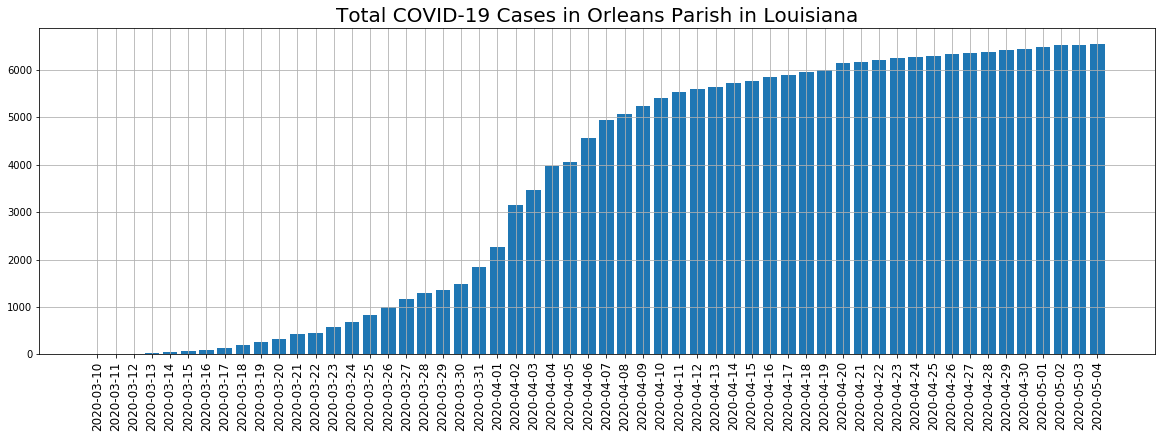

In [370]:
plt.figure(figsize=[20,6])
plt.grid()
plt.title('Total COVID-19 Cases in Orleans Parish in Louisiana', fontsize = '20')
plt.bar(covid_data_LA_Orleans.index, covid_data_LA_Orleans.cases)
plt.xticks(covid_data_LA_Orleans.index, fontsize = '12', rotation = 90);

In [371]:
covid_data_LA_Orleans_daily = covid_data_LA_Orleans.diff()
covid_data_LA_Orleans_daily.columns = ['newcases_daily', 'newdeaths_daily']

In [374]:
plt.figure(figsize=[20,6])
plt.grid()
plt.title('Total Daily New COVID-19 Cases in Orleans Parish in Louisiana', fontsize = '20')
plt.bar(covid_data_LA_Orleans_daily.index, covid_data_LA_Orleans_daily.newcases_daily)
plt.xticks(covid_data_LA_Orleans_daily.index, fontsize = '10', rotation = 90)
plt.ylim(0,1000);

In [375]:
# large spike on 2020-03-13 so look at data after that date
covid_data_LA_Orleans_pct = covid_data_LA_Orleans[covid_data_LA_Orleans.index > '2020-03-13'].pct_change()
covid_data_LA_Orleans_pct.columns = ['cases_dailypctchange', 'deaths_dailypctchange']

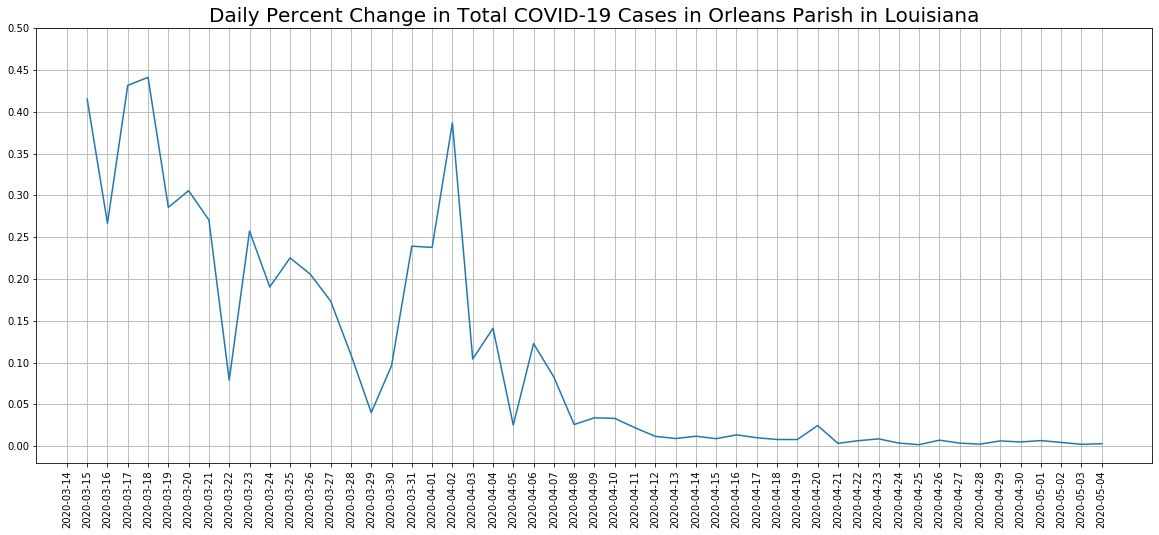

In [376]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily Percent Change in Total COVID-19 Cases in Orleans Parish in Louisiana', fontsize = '20')
plt.plot(covid_data_LA_Orleans_pct.index, covid_data_LA_Orleans_pct.cases_dailypctchange)

y_ticks = np.linspace(0,0.5,11)
plt.xticks(covid_data_LA_Orleans_pct.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [379]:
covid_data_NYC = covid_data[covid_data['state'] == 'New York'][covid_data['county'] == 'New York City'][covid_data['date'] > '2020-03-17']

C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


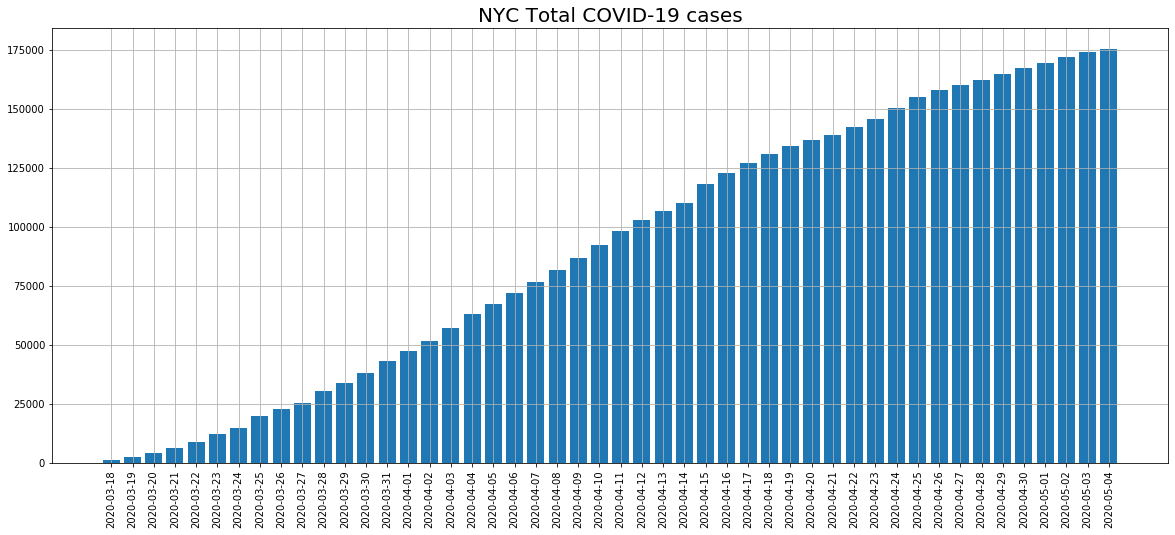

In [381]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('NYC Total COVID-19 cases', fontsize = '20')
plt.bar(covid_data_NYC.date,covid_data_NYC.cases)

# y_ticks = np.linspace(0,160000,17)
plt.xticks(covid_data_NYC.date, fontsize = '10', rotation = 90);
# plt.yticks(y_ticks);

In [383]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('NYC Total COVID-19 deaths', fontsize = '20')
plt.bar(covid_data_NYC.date,covid_data_NYC.deaths)

# y_ticks = np.linspace(0,12000,13)
plt.xticks(covid_data_NYC.date, fontsize = '8', rotation = 90);
# plt.yticks(y_ticks);

In [384]:
covid_data_NYC_deathrate = covid_data_NYC[covid_data_NYC['date'] > '2020-03-13'][['date', 'cases', 'deaths']]
covid_data_NYC_deathrate.set_index('date', inplace=True)
covid_data_NYC_deathrate['death_rate'] = covid_data_NYC_deathrate['deaths'] / covid_data_NYC_deathrate['cases']

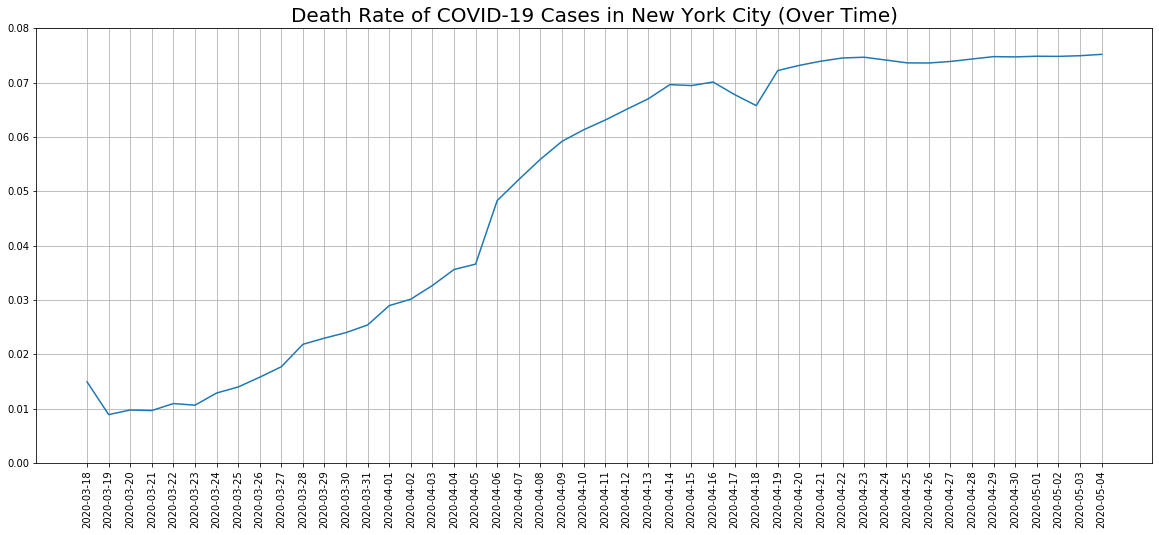

In [385]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Death Rate of COVID-19 Cases in New York City (Over Time)', fontsize = '20')
plt.plot(covid_data_NYC_deathrate.index, covid_data_NYC_deathrate.death_rate)

y_ticks = np.linspace(0,0.08,9)
plt.xticks(covid_data_NYC_deathrate.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [392]:
covid_data_NYC_summ = covid_data_NYC[covid_data_NYC['date'] > '2020-03-17'].groupby('date')['cases','deaths'].sum()

In [394]:
covid_data_NYC_daily = covid_data[covid_data['state'] == 'New York'][covid_data['county'] == 'New York City'][covid_data['date'] > '2020-03-18']
covid_data_NYC_daily = covid_data_NYC_daily[['date', 'cases', 'deaths']]
covid_data_NYC_daily.set_index('date', inplace=True)

C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [395]:
covid_data_NYC_daily = covid_data_NYC_daily.diff()
covid_data_NYC_daily.columns = ['cases_newdaily', 'deaths_newdaily']

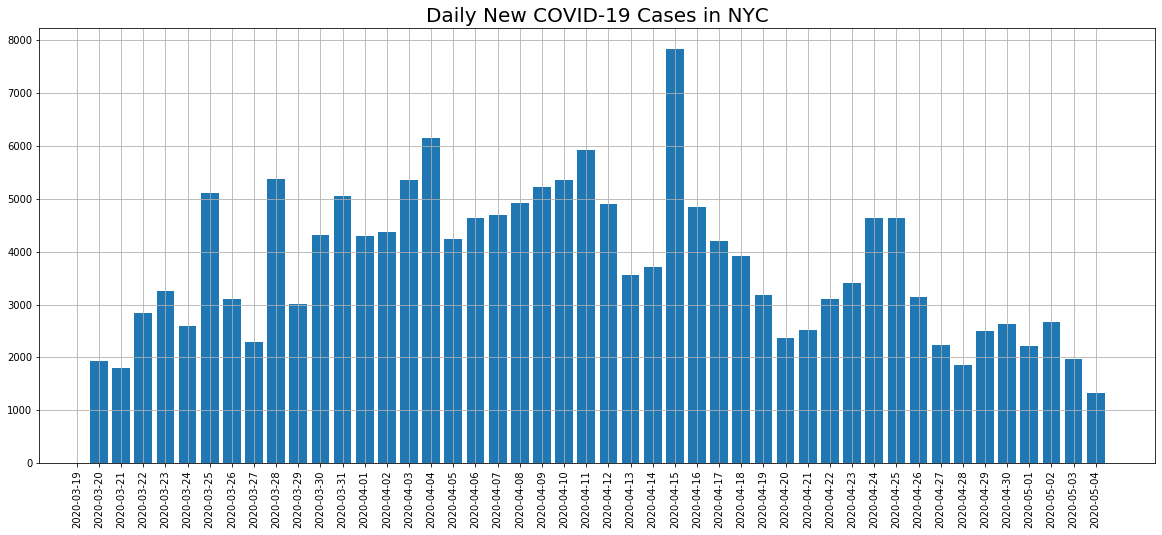

In [396]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily New COVID-19 Cases in NYC', fontsize = '20')
plt.bar(covid_data_NYC_daily.index,covid_data_NYC_daily.cases_newdaily)
plt.xticks(covid_data_NYC_daily.index, fontsize = '10', rotation = 90);

In [401]:
covid_data_NYC_summ_pct = covid_data_NYC_summ.pct_change()
covid_data_NYC_summ_pct.columns = ['cases_dailypctchange', 'deaths_dailypctchange']

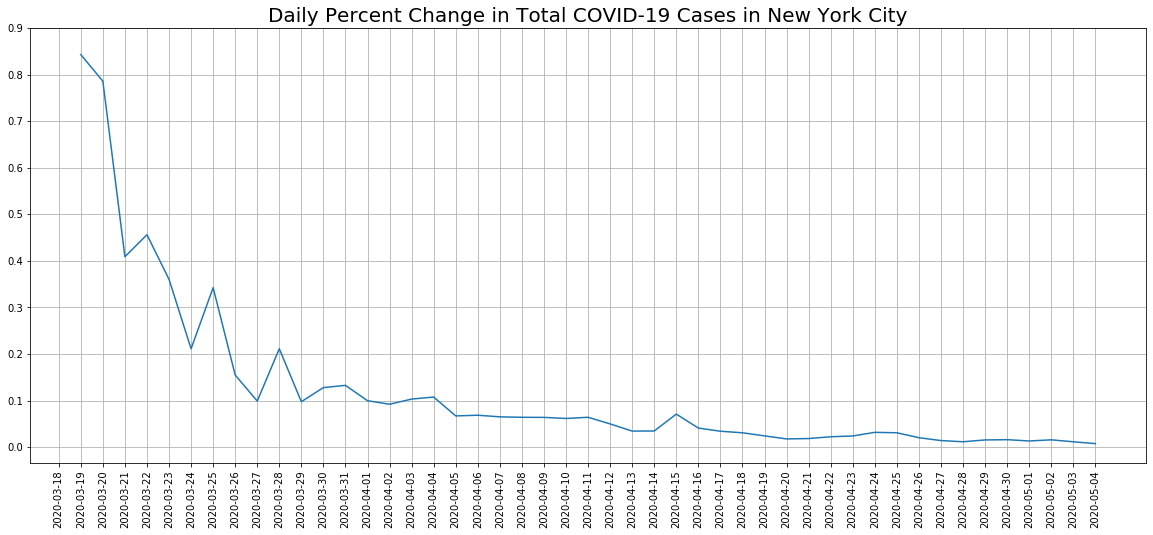

In [402]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily Percent Change in Total COVID-19 Cases in New York City', fontsize = '20')
plt.plot(covid_data_NYC_summ_pct.index, covid_data_NYC_summ_pct.cases_dailypctchange)

y_ticks = np.linspace(0,0.9,10)
plt.xticks(covid_data_NYC_summ_pct.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

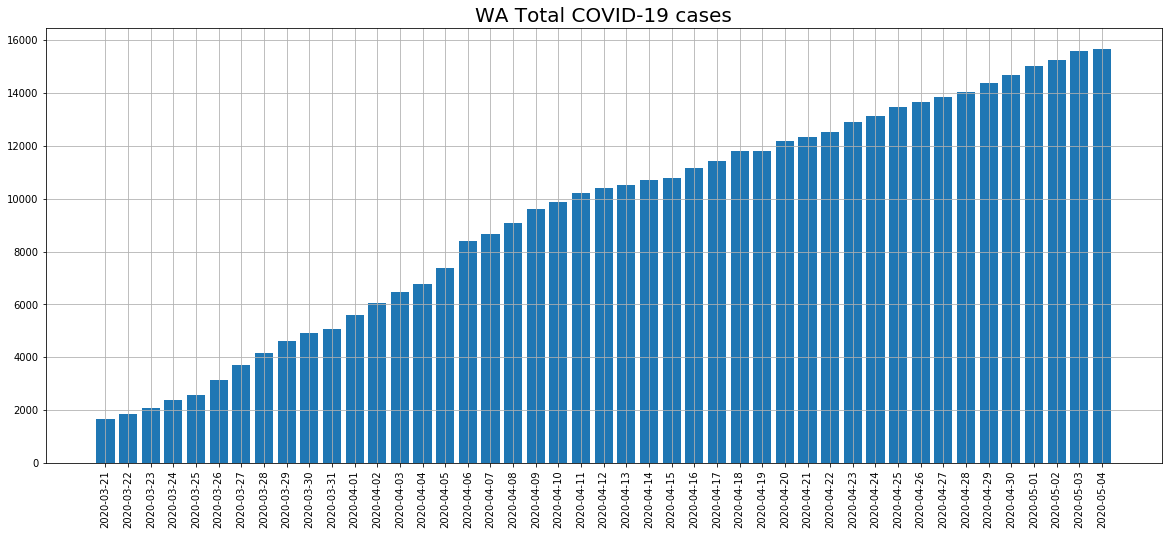

In [404]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('WA Total COVID-19 cases', fontsize = '20')
plt.bar(covid_st_WA_summ.index,covid_st_WA_summ.cases)

# y_ticks = np.linspace(0,14000,8)
plt.xticks(covid_st_WA_summ.index, fontsize = '10', rotation = 90);
# plt.yticks(y_ticks);

In [405]:
covid_data_latest[covid_data_latest['state'] == 'Washington'].sort_values(by='cases', ascending=False).head(10)

date            county       state  cases  deaths  death_rate  \
109010 2020-05-04       King County  Washington   6584     465    0.070626   
109735 2020-05-04  Snohomish County  Washington   2552     110    0.043103   
109489 2020-05-04     Pierce County  Washington   1531      52    0.033965   
110170 2020-05-04     Yakima County  Washington   1411      48    0.034018   
108319 2020-05-04     Benton County  Washington    532      44    0.082707   
109806 2020-05-04    Spokane County  Washington    378      22    0.058201   
108721 2020-05-04   Franklin County  Washington    377      11    0.029178   
108488 2020-05-04      Clark County  Washington    367      21    0.057221   
109591 2020-05-04     Skagit County  Washington    357      13    0.036415   
110072 2020-05-04    Whatcom County  Washington    317      28    0.088328   

        MedianHHInc_2018                 State_County  2019EstPop  \
109010           94822.0       Washington_King County   2252782.0   
109735           87096.0  Washington_Snohomish County    822083.0   
109489           75022.0     Washington_Pierce County    904980.0   
110170           51377.0     Washington_Yakima County    250873.0   
108319           69212.0     Washington_Benton County    204390.0   
109806           59408.0    Washington_Spokane County    522798.0   
108721           60483.0   Washington_Franklin County     95222.0   
108488           73971.0      Washington_Clark County    488241.0   
109591           70955.0     Washington_Skagit County    129205.0   
110072           62262.0    Washington_Whatcom County    229247.0   

        CasesPer100000  DeathsPer100000  Pctile_CasesPer100000  \
109010      292.260858        20.641145               0.853579   
109735      310.430942        13.380644               0.865510   
109489      169.175009         5.745983               0.734635   
110170      562.435974        19.133187               0.938539   
108319      260.286707        21.527472               0.831887   
109806       72.303261         4.208126               0.480116   
108721      395.916910        11.551952               0.900940   
108488       75.167796         4.301155               0.496746   
109591      276.305097        10.061530               0.843095   
110072      138.278800        12.213900               0.678236   

        Pctile_DeathsPer100000  Pctile_2019EstPop  Diff_Pct2019Pop_VS_PctCases  
109010                0.907448           0.996023                     0.142444  
109735                0.861533           0.974331                     0.108821  
109489                0.723427           0.979393                     0.244758  
110170                0.898409           0.902025                    -0.036515  
108319                0.912148           0.882502                     0.050615  
109806                0.666305           0.952639                     0.472523  
108721                0.838756           0.779465                    -0.121475  
108488                0.671367           0.949024                     0.452278  
109591                0.815618           0.824657                    -0.018438  
110072                0.847795           0.894794                     0.216558

In [406]:
covid_data_WA_King = covid_data[covid_data['county'] == 'King County'][covid_data['state'] == 'Washington']
covid_data_WA_King = covid_data_WA_King[['date', 'cases', 'deaths']]

C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [407]:
covid_data_WA_King.set_index('date',inplace=True)

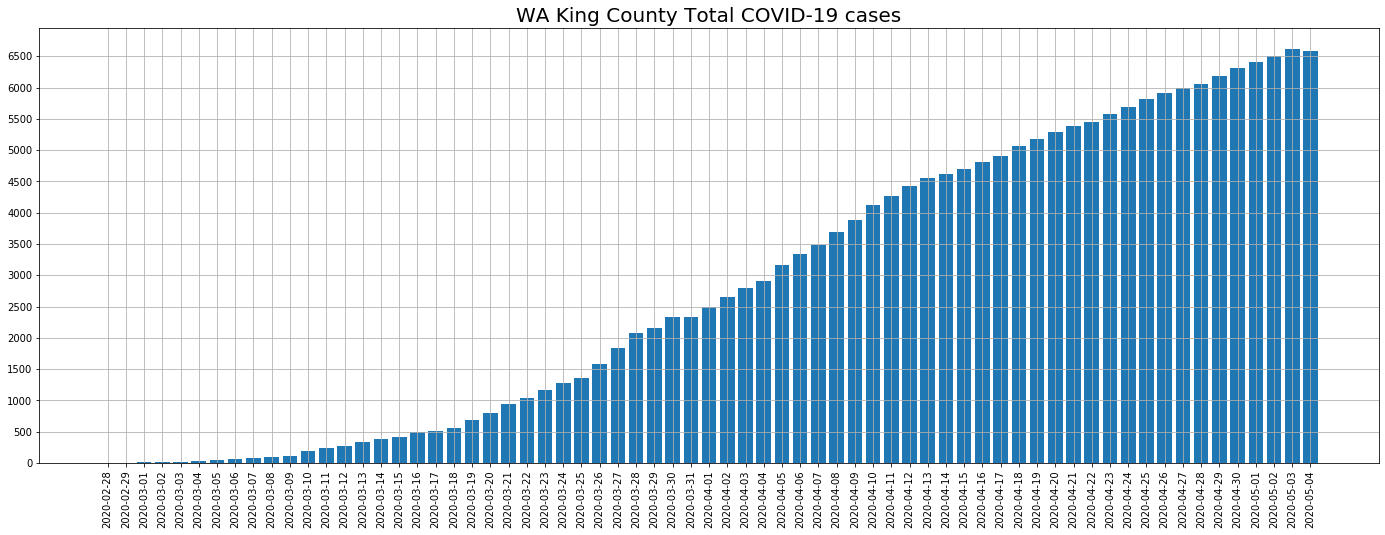

In [409]:
plt.figure(figsize=[24,8])
plt.grid()
plt.title('WA King County Total COVID-19 cases', fontsize = '20')
plt.bar(covid_data_WA_King.index,covid_data_WA_King.cases)

y_ticks = np.linspace(0,6500,14)
plt.xticks(covid_data_WA_King.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

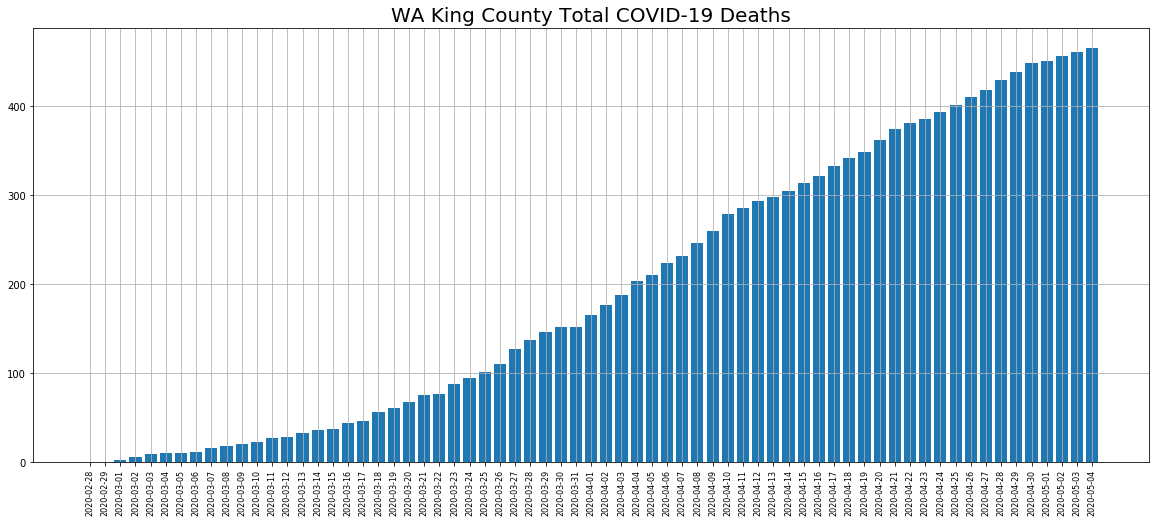

In [411]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('WA King County Total COVID-19 Deaths', fontsize = '20')
plt.bar(covid_data_WA_King.index,covid_data_WA_King.deaths)

plt.xticks(covid_data_WA_King.index, fontsize = '8', rotation = 90);

In [412]:
covid_data_WA_King_daily = covid_data_WA_King[covid_data_WA_King.index > '2020-03-02'].diff()
covid_data_WA_King_daily.columns = ['newcases_daily', 'newdeaths_daily']

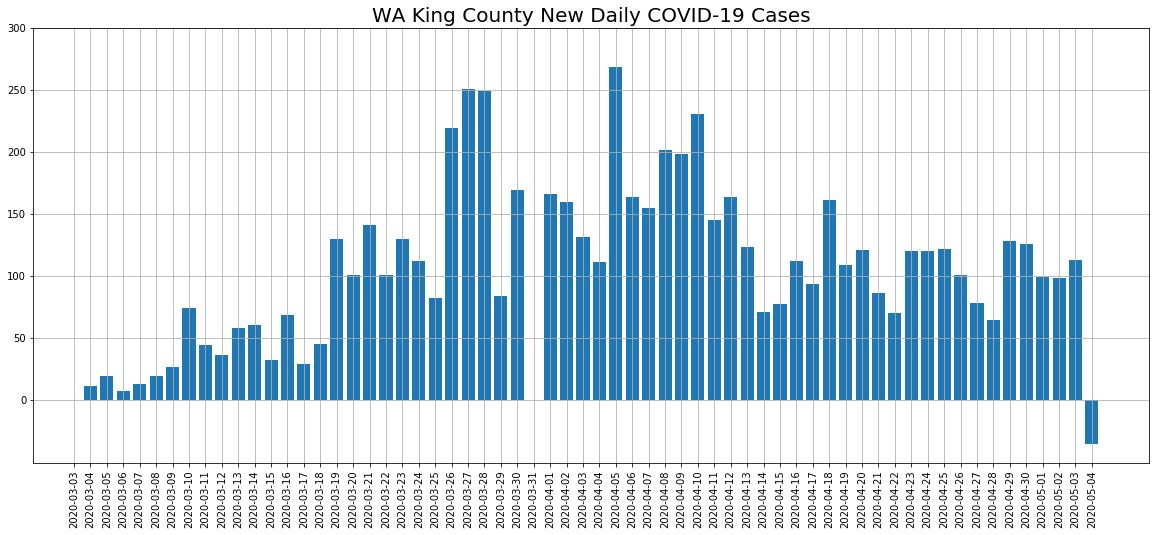

In [413]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('WA King County New Daily COVID-19 Cases', fontsize = '20')
plt.bar(covid_data_WA_King_daily.index,covid_data_WA_King_daily.newcases_daily)

y_ticks = np.linspace(0,300,7)
plt.xticks(covid_data_WA_King_daily.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [414]:
covid_data_WA_King_pctchange = covid_data_WA_King[covid_data_WA_King.index > '2020-03-02'].pct_change()
covid_data_WA_King_pctchange.columns = ['cases_dailypctchange', 'deaths_dailypctchange']

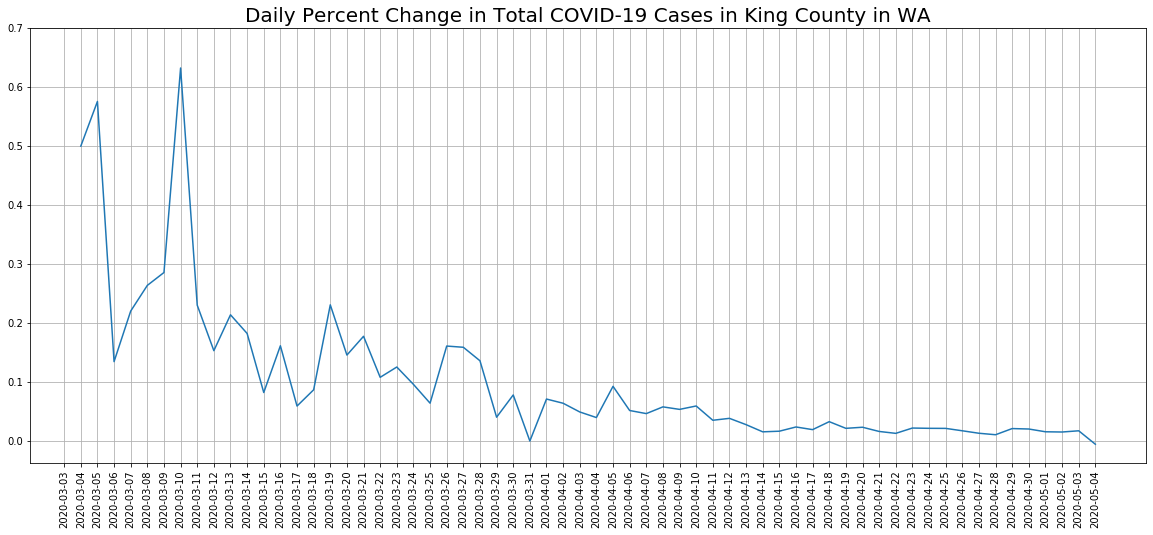

In [415]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily Percent Change in Total COVID-19 Cases in King County in WA', fontsize = '20')
plt.plot(covid_data_WA_King_pctchange.index, covid_data_WA_King_pctchange.cases_dailypctchange)

y_ticks = np.linspace(0,0.7,8)
plt.xticks(covid_data_WA_King_pctchange.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [416]:
covid_data_WA_King['death_rate'] = covid_data_WA_King['deaths'] / covid_data_WA_King['cases']

In [417]:
covid_data_WA_King

cases  deaths  death_rate
date                                 
2020-02-28      1       0    0.000000
2020-02-29      4       1    0.250000
2020-03-01     11       3    0.272727
2020-03-02     15       6    0.400000
2020-03-03     22      10    0.454545
2020-03-04     33      11    0.333333
2020-03-05     52      11    0.211538
2020-03-06     59      12    0.203390
2020-03-07     72      16    0.222222
2020-03-08     91      18    0.197802
2020-03-09    117      21    0.179487
2020-03-10    191      23    0.120419
2020-03-11    235      27    0.114894
2020-03-12    271      28    0.103321
2020-03-13    329      33    0.100304
2020-03-14    389      36    0.092545
2020-03-15    421      38    0.090261
2020-03-16    489      44    0.089980
2020-03-17    518      47    0.090734
2020-03-18    563      57    0.101243
2020-03-19    693      61    0.088023
2020-03-20    794      68    0.085642
2020-03-21    935      76    0.081283
2020-03-22   1036      77    0.074324
2020-03-23   1166      88    0.075472
2020-03-24   1278      95    0.074335
2020-03-25   1360     101    0.074265
2020-03-26   1579     111    0.070298
2020-03-27   1830     127    0.069399
2020-03-28   2079     138    0.066378
...           ...     ...         ...
2020-04-05   3169     210    0.066267
2020-04-06   3333     224    0.067207
2020-04-07   3488     232    0.066514
2020-04-08   3690     246    0.066667
2020-04-09   3888     260    0.066872
2020-04-10   4119     279    0.067735
2020-04-11   4264     286    0.067073
2020-04-12   4428     294    0.066396
2020-04-13   4551     298    0.065480
2020-04-14   4622     305    0.065989
2020-04-15   4699     314    0.066823
2020-04-16   4811     322    0.066930
2020-04-17   4904     333    0.067904
2020-04-18   5065     342    0.067522
2020-04-19   5174     348    0.067259
2020-04-20   5295     362    0.068366
2020-04-21   5381     374    0.069504
2020-04-22   5451     381    0.069895
2020-04-23   5571     386    0.069287
2020-04-24   5691     393    0.069056
2020-04-25   5813     401    0.068983
2020-04-26   5914     410    0.069327
2020-04-27   5992     418    0.069760
2020-04-28   6056     429    0.070839
2020-04-29   6184     438    0.070828
2020-04-30   6310     448    0.070998
2020-05-01   6409     451    0.070370
2020-05-02   6507     456    0.070078
2020-05-03   6620     461    0.069637
2020-05-04   6584     465    0.070626

[67 rows x 3 columns]

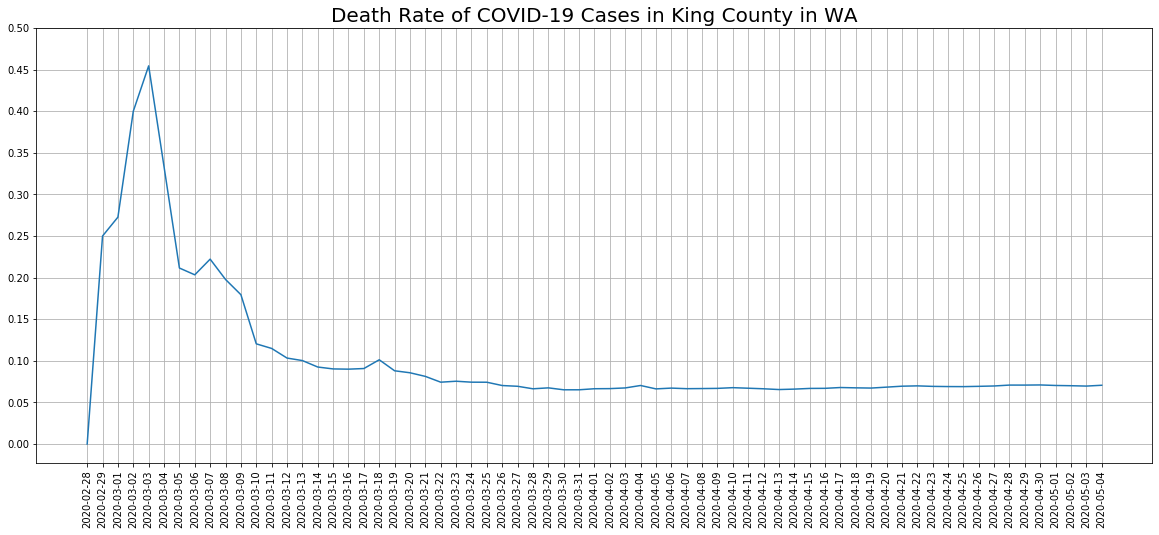

In [418]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Death Rate of COVID-19 Cases in King County in WA', fontsize = '20')
plt.plot(covid_data_WA_King.index, covid_data_WA_King.death_rate)

y_ticks = np.linspace(0,0.5,11)
plt.xticks(covid_data_WA_King.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [419]:
covid_data_NY_WC = covid_data[covid_data['state'] == 'New York'][covid_data['county'] == 'Westchester County']

C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [420]:
covid_data_NY_WC_summ = covid_data_NY_WC.groupby('date')['cases','deaths'].sum()

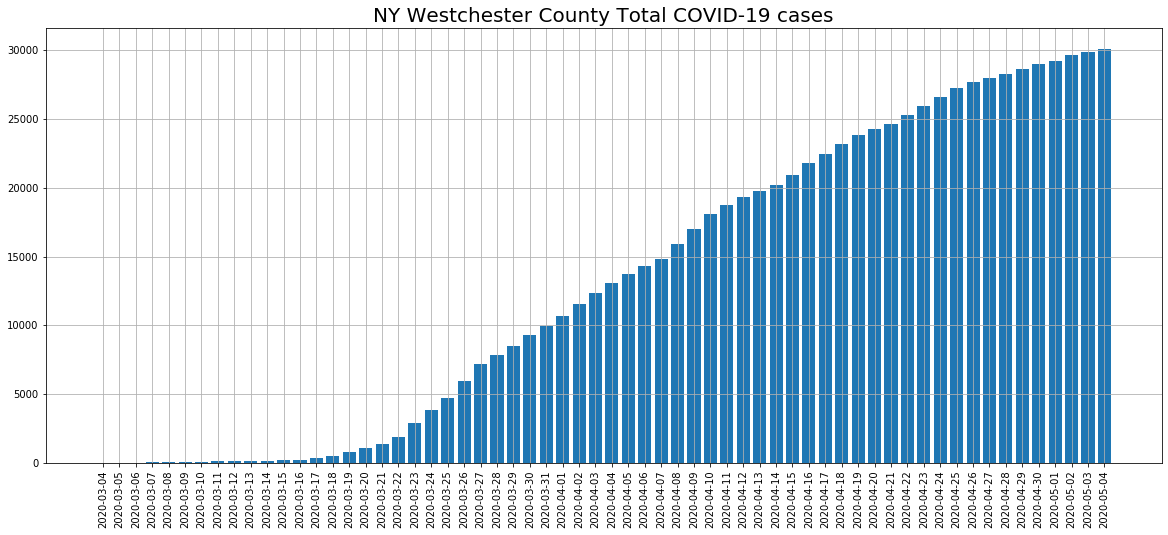

In [423]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('NY Westchester County Total COVID-19 cases', fontsize = '20')
plt.bar(covid_data_NY_WC_summ.index,covid_data_NY_WC_summ.cases)

# y_ticks = np.linspace(0,30000,16)
plt.xticks(covid_data_NY_WC_summ.index, fontsize = '10', rotation = 90);
# plt.yticks(y_ticks);

In [424]:
covid_data_NY_WC_daily = covid_data_NY_WC_summ.diff()
covid_data_NY_WC_daily.columns = ['cases_newdaily', 'deaths_newdaily']

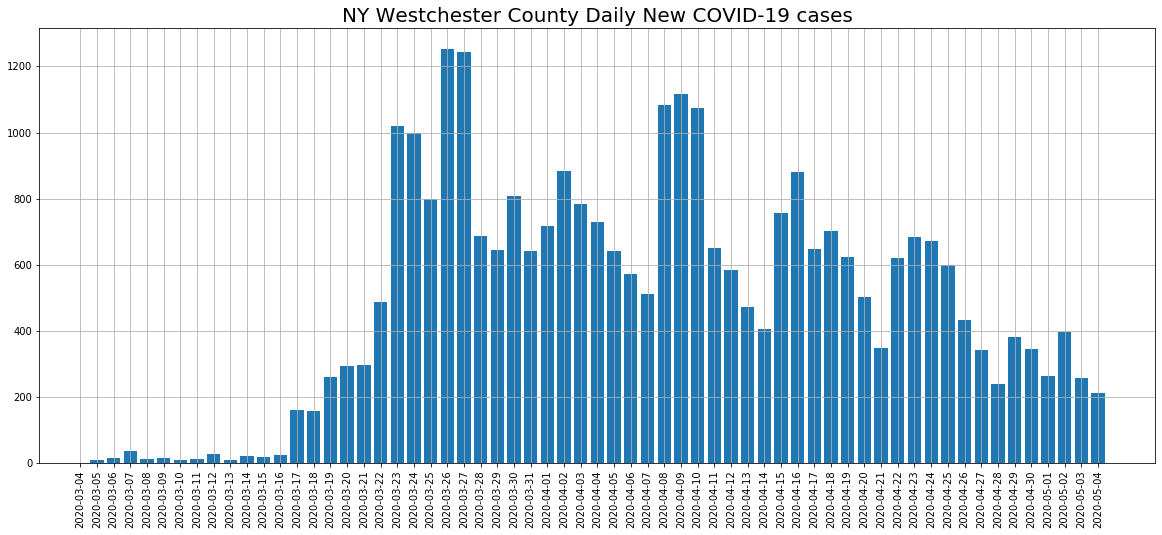

In [425]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('NY Westchester County Daily New COVID-19 cases', fontsize = '20')
plt.bar(covid_data_NY_WC_daily.index, covid_data_NY_WC_daily.cases_newdaily)

plt.xticks(covid_data_NY_WC_daily.index, fontsize = '10', rotation = 90);

In [426]:
# big spike on 2020-03-07 so look at data after that date
covid_data_NY_WC_pct = covid_data_NY_WC_summ[covid_data_NY_WC_summ.index > '2020-03-07'].pct_change()
covid_data_NY_WC_pct.columns = ['cases_dailypctchange', 'deaths_dailypctchange']

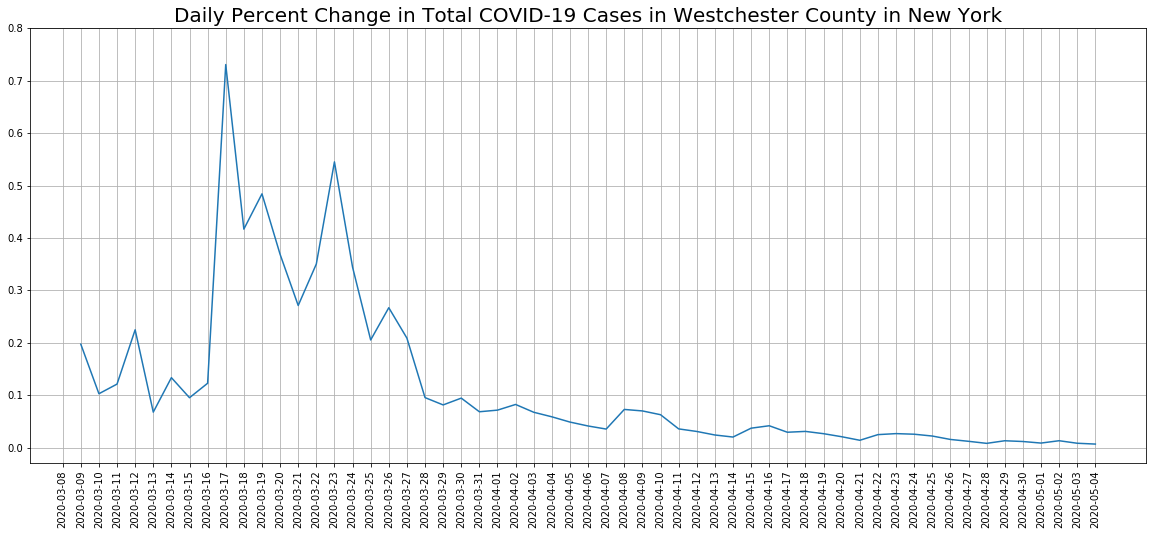

In [427]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily Percent Change in Total COVID-19 Cases in Westchester County in New York', fontsize = '20')
plt.plot(covid_data_NY_WC_pct.index, covid_data_NY_WC_pct.cases_dailypctchange)

y_ticks = np.linspace(0,0.8,9)
plt.xticks(covid_data_NY_WC_pct.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [428]:
covid_data_latest_density = covid_data_latest[['State_County', 'cases', 'deaths', '2019EstPop', 'Pctile_CasesPer100000', 'Pctile_2019EstPop', 'Diff_Pct2019Pop_VS_PctCases']]
covid_data_latest_density.head(20)

State_County  cases  deaths  2019EstPop  \
41     Alabama_Autauga County     53       3     55869.0   
93     Alabama_Baldwin County    188       4    223234.0   
125    Alabama_Barbour County     45       1     24686.0   
161       Alabama_Bibb County     42       0     22394.0   
202     Alabama_Blount County     40       0     57826.0   
242    Alabama_Bullock County     16       0     10101.0   
283     Alabama_Butler County    114       1     19448.0   
331    Alabama_Calhoun County    105       3    113605.0   
378   Alabama_Chambers County    302      21     33254.0   
419   Alabama_Cherokee County     16       0     26196.0   
460    Alabama_Chilton County     58       1     44428.0   
500    Alabama_Choctaw County     51       0     12589.0   
534     Alabama_Clarke County     43       1     23622.0   
575       Alabama_Clay County     22       1     13235.0   
616   Alabama_Cleburne County     12       1     14910.0   
649     Alabama_Coffee County    134       0     52342.0   
690    Alabama_Colbert County     41       2     55241.0   
724    Alabama_Conecuh County      9       0     12067.0   
764      Alabama_Coosa County     30       1     10663.0   
803  Alabama_Covington County     45       1     37049.0   

     Pctile_CasesPer100000  Pctile_2019EstPop  Diff_Pct2019Pop_VS_PctCases  
41                0.579537           0.676067                     0.096529  
93                0.537599           0.891540                     0.353941  
125               0.756327           0.434201                    -0.322126  
161               0.761027           0.403832                    -0.357195  
202               0.467101           0.684382                     0.217281  
242               0.717643           0.168113                    -0.549530  
283               0.941432           0.352856                    -0.588576  
331               0.571945           0.808388                     0.236443  
378               0.968908           0.524584                    -0.444324  
419               0.419740           0.453001                     0.033261  
460               0.663413           0.617860                    -0.045553  
500               0.906363           0.223427                    -0.682936  
534               0.755965           0.421186                    -0.334779  
575               0.730658           0.233912                    -0.496746  
616               0.522415           0.271150                    -0.251265  
649               0.827187           0.661967                    -0.165221  
690               0.490962           0.673897                     0.182936  
724               0.494215           0.208604                    -0.285611  
764               0.846710           0.181128                    -0.665582  
803               0.645698           0.560376                    -0.085322

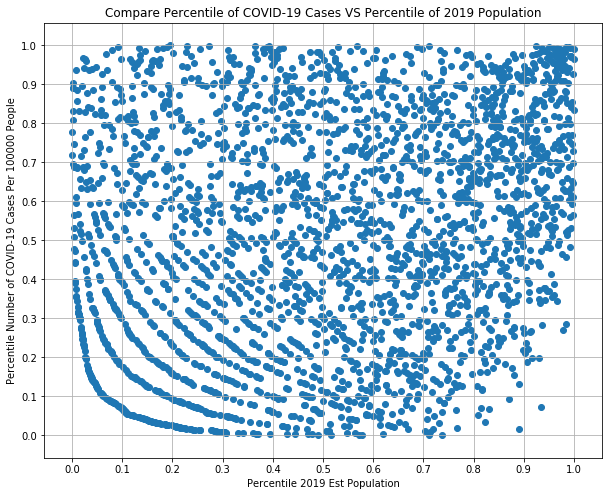

In [429]:
plt.figure(figsize=[10,8])
plt.grid()
plt.title('Compare Percentile of COVID-19 Cases VS Percentile of 2019 Population')
plt.scatter(covid_data_latest_density.Pctile_2019EstPop,covid_data_latest_density.Pctile_CasesPer100000)
x_ticks = np.linspace(0,1,11)
y_ticks = np.linspace(0,1,11)
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.xlabel('Percentile 2019 Est Population')
plt.ylabel('Percentile Number of COVID-19 Cases Per 100000 People');

In [430]:
covid_data_latest_density[covid_data_latest_density['Pctile_2019EstPop'] 
                          < 0.1][covid_data_latest_density['Pctile_CasesPer100000'] 
                                 > 0.9].sort_values(by='Diff_Pct2019Pop_VS_PctCases')

C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


State_County  cases  deaths  2019EstPop  \
17547         Georgia_Clay County     25       3      2834.0   
16435        Georgia_Baker County     26       2      3038.0   
95877         Texas_Donley County     25       0      3278.0   
63025      Nebraska_Gosper County     11       0      1990.0   
100109       Texas_Sherman County     18       0      3022.0   
80013       Oklahoma_Greer County     65       6      5712.0   
17049      Georgia_Calhoun County    107       4      6189.0   
21374     Georgia_Randolph County    164      19      6778.0   
75188   North Dakota_Slope County      3       0       750.0   
36523        Kansas_Kearny County     21       0      3838.0   
98627          Texas_Mason County     24       0      4274.0   
62179        Montana_Toole County     29       6      4736.0   
20530       Georgia_Miller County     32       0      5718.0   
24135        Idaho_Lincoln County     26       0      5366.0   
91960       Tennessee_Lake County     58       0      7016.0   
21788       Georgia_Talbot County     25       1      6195.0   

        Pctile_CasesPer100000  Pctile_2019EstPop  Diff_Pct2019Pop_VS_PctCases  
17547                0.967101           0.022415                    -0.944685  
16435                0.965654           0.025669                    -0.939986  
95877                0.959147           0.028923                    -0.930224  
63025                0.936732           0.008677                    -0.928055  
100109               0.942155           0.024946                    -0.917209  
80013                0.978670           0.068510                    -0.910159  
17049                0.987346           0.079899                    -0.907448  
21374                0.994577           0.092191                    -0.902386  
75188                0.903471           0.001446                    -0.902025  
36523                0.935647           0.034346                    -0.901302  
98627                0.938178           0.040130                    -0.898048  
62179                0.943962           0.048807                    -0.895155  
20530                0.937816           0.069053                    -0.868764  
24135                0.926609           0.060376                    -0.866233  
91960                0.964208           0.097975                    -0.866233  
21788                0.905278           0.080260                    -0.825018

In [431]:
covid_data_latest_density[covid_data_latest_density['Pctile_2019EstPop'] 
                          > 0.8][covid_data_latest_density['Pctile_CasesPer100000'] 
                                 < 0.2].sort_values(by='Diff_Pct2019Pop_VS_PctCases', ascending=False)

C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


State_County  cases  deaths  2019EstPop  \
7178           California_Butte County     17       0    219186.0   
82389               Oregon_Lane County     55       2    382067.0   
6531         Arkansas_Sebastian County     13       0    127827.0   
9360          California_Shasta County     31       4    180080.0   
113287       Wisconsin_Marathon County     19       1    135692.0   
82215            Oregon_Jackson County     49       0    220944.0   
89721   South Dakota_Pennington County     14       0    113775.0   
23540          Idaho_Bonneville County     17       0    119062.0   
99316              Texas_Nueces County    113       3    362294.0   
72894     North Carolina_Onslow County     50       2    197938.0   
70636   North Carolina_Buncombe County     77       4    261191.0   
58745           Missouri_Greene County     91       8    293086.0   
7400       California_El Dorado County     53       0    192843.0   
59032           Missouri_Jasper County     24       0    121328.0   
83406        Pennsylvania_Blair County     25       0    121829.0   
76741               Ohio_Greene County     49       4    168937.0   
82060            Oregon_Douglas County     24       0    110980.0   
99521              Texas_Parker County     39       0    142878.0   
83591      Pennsylvania_Cambria County     34       2    130192.0   
11517             Colorado_Mesa County     46       0    154210.0   
113178      Wisconsin_La Crosse County     31       0    118016.0   
67695       New York_Chautauqua County     37       2    126903.0   
3375            Arizona_Cochise County     39       0    125922.0   

        Pctile_CasesPer100000  Pctile_2019EstPop  Diff_Pct2019Pop_VS_PctCases  
7178                 0.017354           0.890094                     0.872740  
82389                0.073030           0.934201                     0.861171  
6531                 0.034707           0.823210                     0.788503  
9360                 0.093999           0.869848                     0.775850  
113287               0.068691           0.831526                     0.762834  
82215                0.130875           0.891179                     0.760304  
89721                0.051699           0.808749                     0.757050  
23540                0.071222           0.814172                     0.742950  
99316                0.199205           0.929501                     0.730296  
72894                0.155098           0.880333                     0.725235  
70636                0.187636           0.906001                     0.718366  
58745                0.198120           0.916124                     0.718004  
7400                 0.173174           0.877440                     0.704266  
59032                0.115329           0.817064                     0.701735  
83406                0.120390           0.817426                     0.697035  
76741                0.183297           0.862256                     0.678959  
82060                0.127983           0.806941                     0.678959  
99521                0.172090           0.837672                     0.665582  
83591                0.161605           0.826464                     0.664859  
11517                0.190528           0.847072                     0.656544  
113178               0.163413           0.813087                     0.649675  
67695                0.184743           0.822487                     0.637744  
3375                 0.196312           0.821041                     0.624729

In [432]:
covid_data_latest_density_NY = covid_data_latest_density[covid_data_latest_density.State_County.str.contains('New York')]

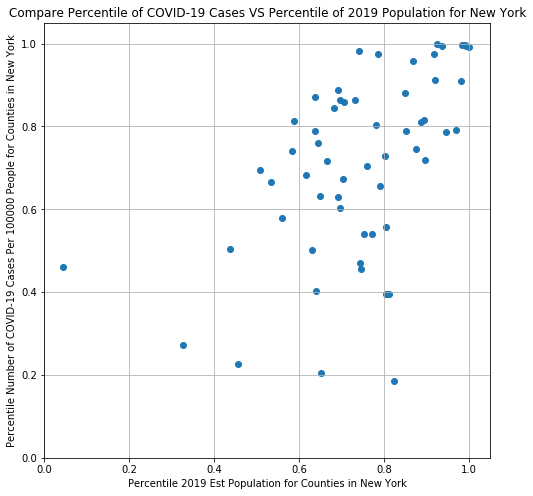

In [433]:
plt.figure(figsize=[8,8])
plt.grid()
plt.title('Compare Percentile of COVID-19 Cases VS Percentile of 2019 Population for New York')
plt.scatter(covid_data_latest_density_NY.Pctile_2019EstPop,covid_data_latest_density_NY.Pctile_CasesPer100000)
plt.xlim(0,1.05)
plt.ylim(0,1.05)
plt.xlabel('Percentile 2019 Est Population for Counties in New York')
plt.ylabel('Percentile Number of COVID-19 Cases Per 100000 People for Counties in New York');

In [434]:
covid_data_latest_density_NY[covid_data_latest_density_NY.Pctile_CasesPer100000 
                             < 0.4][covid_data_latest_density_NY.Pctile_2019EstPop > 0.6]

C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


State_County  cases  deaths  2019EstPop  \
67695  New York_Chautauqua County     37       2    126903.0   
68172    New York_Franklin County     16       0     50022.0   
68465   New York_Jefferson County     63       0    109834.0   
69157      New York_Oswego County     67       0    117124.0   

       Pctile_CasesPer100000  Pctile_2019EstPop  Diff_Pct2019Pop_VS_PctCases  
67695               0.184743           0.822487                     0.637744  
68172               0.203905           0.651844                     0.447939  
68465               0.396240           0.804049                     0.407809  
69157               0.395517           0.811641                     0.416124

In [435]:
covid_data_latest_density_MI = covid_data_latest_density[covid_data_latest_density.State_County.str.contains('Michigan')]

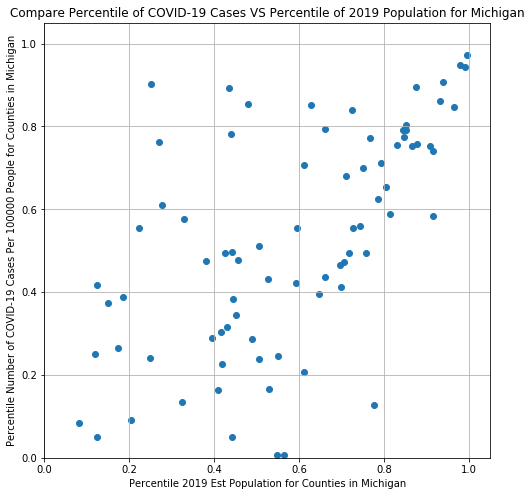

In [436]:
plt.figure(figsize=[8,8])
plt.grid()
plt.title('Compare Percentile of COVID-19 Cases VS Percentile of 2019 Population for Michigan')
plt.scatter(covid_data_latest_density_MI.Pctile_2019EstPop,covid_data_latest_density_MI.Pctile_CasesPer100000)
plt.xlim(0,1.05)
plt.ylim(0,1.05)
plt.xlabel('Percentile 2019 Est Population for Counties in Michigan')
plt.ylabel('Percentile Number of COVID-19 Cases Per 100000 People for Counties in Michigan');

In [437]:
covid_data_latest_density_CA = covid_data_latest_density[covid_data_latest_density.State_County.str.contains('California')]

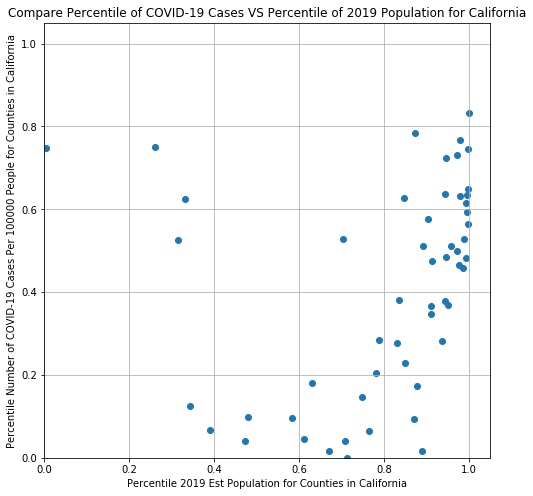

In [438]:
plt.figure(figsize=[8,8])
plt.grid()
plt.title('Compare Percentile of COVID-19 Cases VS Percentile of 2019 Population for California')
plt.scatter(covid_data_latest_density_CA.Pctile_2019EstPop,covid_data_latest_density_CA.Pctile_CasesPer100000)
plt.xlim(0,1.05)
plt.ylim(0,1.05)
plt.xlabel('Percentile 2019 Est Population for Counties in California')
plt.ylabel('Percentile Number of COVID-19 Cases Per 100000 People for Counties in California');

In [439]:
covid_data_latest_density_CA[covid_data_latest_density_CA['Pctile_2019EstPop']
                            > 0.8][covid_data_latest_density_CA['Pctile_CasesPer100000'] < 0.2]

C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


State_County  cases  deaths  2019EstPop  \
7178      California_Butte County     17       0    219186.0   
7400  California_El Dorado County     53       0    192843.0   
9360     California_Shasta County     31       4    180080.0   

      Pctile_CasesPer100000  Pctile_2019EstPop  Diff_Pct2019Pop_VS_PctCases  
7178               0.017354           0.890094                     0.872740  
7400               0.173174           0.877440                     0.704266  
9360               0.093999           0.869848                     0.775850

In [440]:
covid_data_latest_density_CA[covid_data_latest_density_CA['Pctile_2019EstPop']
                            < 0.4][covid_data_latest_density_CA['Pctile_CasesPer100000'] > 0.6]

C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


State_County  cases  deaths  2019EstPop  \
7087  California_Alpine County      2       0      1129.0   
7659    California_Inyo County     20       1     18039.0   
8143    California_Mono County     26       1     14444.0   

      Pctile_CasesPer100000  Pctile_2019EstPop  Diff_Pct2019Pop_VS_PctCases  
7087               0.748373           0.003615                    -0.744758  
7659               0.624367           0.330441                    -0.293926  
8143               0.750904           0.261388                    -0.489516

### <span style="color:red"> **IGNORE scatter plot below b/c many LA counties need to have 'County' name (in COVID-19 data file) fixed to match USA county population file (so left join will work properly)

In [441]:
covid_data_latest_density_LA = covid_data_latest_density[covid_data_latest_density.State_County.str.contains('Louisiana')]

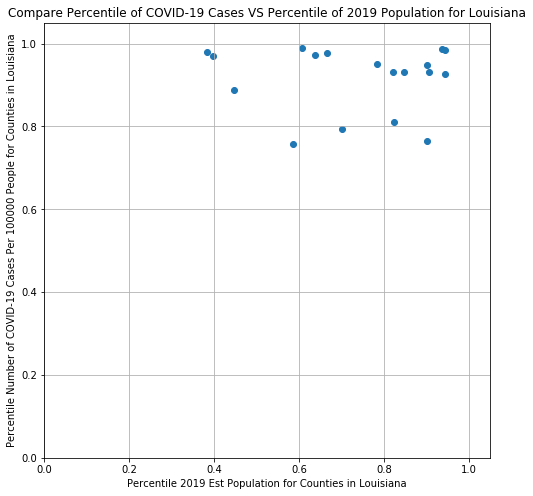

In [442]:
plt.figure(figsize=[8,8])
plt.grid()
plt.title('Compare Percentile of COVID-19 Cases VS Percentile of 2019 Population for Louisiana')
plt.scatter(covid_data_latest_density_LA.Pctile_2019EstPop,covid_data_latest_density_LA.Pctile_CasesPer100000)
plt.xlim(0,1.05)
plt.ylim(0,1.05)
plt.xlabel('Percentile 2019 Est Population for Counties in Louisiana')
plt.ylabel('Percentile Number of COVID-19 Cases Per 100000 People for Counties in Louisiana');

In [443]:
covid_data_latest_density_IL = covid_data_latest_density[covid_data_latest_density.State_County.str.contains('Illinois')]

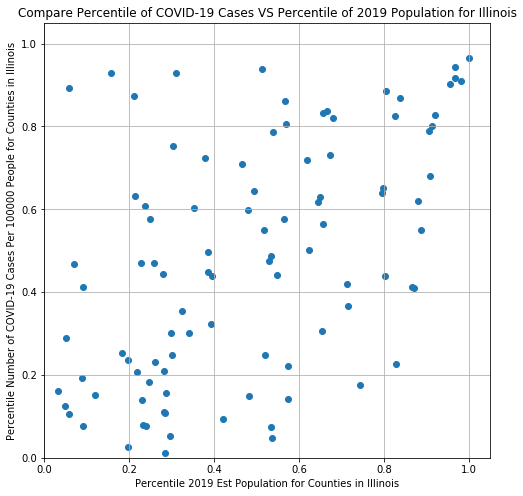

In [444]:
plt.figure(figsize=[8,8])
plt.grid()
plt.title('Compare Percentile of COVID-19 Cases VS Percentile of 2019 Population for Illinois')
plt.scatter(covid_data_latest_density_IL.Pctile_2019EstPop,covid_data_latest_density_IL.Pctile_CasesPer100000)
plt.xlim(0,1.05)
plt.ylim(0,1.05)
plt.xlabel('Percentile 2019 Est Population for Counties in Illinois')
plt.ylabel('Percentile Number of COVID-19 Cases Per 100000 People for Counties in Illinois');

In [445]:
whos

Variable                               Type         Data/Info
-------------------------------------------------------------
COVID_dbl_dailycol                     DataFrame                             <...>\n[1819 rows x 8 columns]
FuncFormatter                          type         <class 'matplotlib.ticker.FuncFormatter'>
HH_income                              DataFrame             FIPS State      <...>\n[3184 rows x 4 columns]
USA_pop_county                         DataFrame              State          <...>\n[3194 rows x 4 columns]
US_deathrate                           float        0.053546424605282215
US_totalcases                          int          1180527
US_totaldeaths                         int          63213
X                                      list         n=10
X_val                                  ndarray      10: 10 elems, type `int32`, 40 bytes
Y1                                     list         n=10
Y2                                     list         n=10
county_

covid_data_latest                      DataFrame                 date        <...>n[2885 rows x 15 columns]
covid_data_latest_98pct                DataFrame                date         <...>              -0.597252  
covid_data_latest_density              DataFrame                           St<...>\n[2885 rows x 7 columns]
covid_data_latest_density_CA           DataFrame                             <...>               0.601229  
covid_data_latest_density_IL           DataFrame                          Sta<...>\n\n[98 rows x 7 columns]
covid_data_latest_density_LA           DataFrame                             <...>\n\n[65 rows x 7 columns]
covid_data_latest_density_MI           DataFrame                             <...>\n\n[80 rows x 7 columns]
covid_data_latest_density_NY           DataFrame                           St<...>              -0.068330  
covid_data_latest_outperformers        DataFrame                 date        <...>               0.734996  
covid_data_latest_states    

# <span style="color:green"> CONGRATULATIONS!!! You reached the end of this Jupyter notebook =P